<a href="https://colab.research.google.com/github/radhikasethi2011/btechproj/blob/main/colab_files/fruitfly_08_02_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#tad and left boundry

In [5]:
import random
import random
import string
import numpy as np
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)
import copy
import math
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import pylab as pl
from sklearn import metrics
from sklearn.model_selection import KFold
import os 
import seaborn as sns
random.seed(10)



def get_num(a, b, x):
    """
    gets a unique number between a range (a,b), divisible by x
    input:  a - start inde
            b - end index
            x = random number should be divisible by x
    return:
        random number divisible by x
    """
    if not a % x:
        return random.choice(range(a, b, x))
    else:
        return random.choice(range(a + x - (a % x), b, x))

def motif_string():
    """
    generates a string of length (by get_num) of ACGT
    returns: string of equal ACGT
    """
    length = 288
    # print("random length: " , length)
    len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    letters_list = list(random.choice(letters))
    random.shuffle(letters_list)
    # print(" Random generated string with repetition:")
    str1 = ""
    return str1.join(letters_list)

def non_motif_string(length):
    """
    generates a string of length (by get_num) of ACGT
    returns: string 
    """
    # print("random length: " , length)
    #len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    nonmotiflist = []
    for i in range(length): 
      nonmotiflist.append(random.choice(letters))
    # print(" Random generated string with repetition:")
    str1 = ""
    return str1.join(nonmotiflist)

def add_motif():
    """
    adds a motif - string input, to output by non_motif_string
    returns: string consisting of a motif
    """
    motif = 'ATACGTTACCCG'
    result = list(motif_string())
    i = random.choice(range(len(result)))
    result.insert(i, motif)
    result = "".join(result)
    return result,i


def write_to_df(length,var): #to generate non motif background files
  l=[]
  for i1 in range(int(length)):
    l1=[]
    i=-5
    result= non_motif_string(var)
    seq = "seq_" + str(i1 + 1) + "_peak"
    a='0'      
    l1 = ["A",seq,str(i), result,a]
    l.append(list(l1))
  df = pd.DataFrame(l,columns=['FoldID',	'EventID',	'start_index',	'seq',	'Bound']) 
  return df


def read_pfm_jaspar(filepath_):
  with open(Path(filepath_)) as f:
    lines = f.readlines()

  a = []
  for i in range(1,5,1):
    b = list(lines[i].split()[2:-1])
    a.append(b)
  a = np.array(a,dtype=float)
  return a

def convert_pfm_to_ppm(pfm):
  for i in range(pfm.shape[1]):
    sum = 0
    for j in range(pfm.shape[0]):
      sum+= pfm[j][i] 
    for j in range(pfm.shape[0]):
      prob = float(pfm[j][i]/sum)
      ppm[j][i] = float(prob)
  return(ppm)
  
p1=['A','C','G','T']
str1=''
def ppm_to_motif(ppm):
  motif = []
  mot=[]
  for i in range(ppm.shape[1]):
    arr = []
    for j in range(ppm.shape[0]):
      arr.append(float(ppm[j][i]))
    choice = np.random.choice(p1,p=arr) #motif is generated here
    mot.append(choice)
  
  return (''.join(mot))

def non_motif_create(df1,df2): #to implant a  motif in a non motif file -> 1. motif file, 2. mixed file 
  mot=[]
  l1=[]
  l2=[]
  for i in range(0,len(df1)):
    motif = ppm_to_motif(ppm)
    mot.append(motif)
    index=random.randint(0,len(df1[i])-1) #0 to 300 
    l1.append(index)
    df1[i]=df1[i][:index] + str(motif) + df1[i][index:]
    
    index2=np.random.choice(len(df2[i]))
    l2.append(index2)
    df2[i]=df2[i][:index2] + str(motif) + df2[i][index2:]
    #print(index)
    #print(df1[i])
    #print(mot)
  return l1,l2,df1,df2,mot #l1, l2 to store the index

def markov_model_motif(df1):
    """
    for a second degree motif markov model 
    returns dict2, dict3: count of the appearance of eg: A->C and eg: AC->T occuring
    """
    dict2, dict3 = {}, {}
    for j in range(len(df1)):
      seq = df1[j]
      for i in range(len(seq)-var): #dict2
        if seq[i:i+var] not in dict2: 
          dict2[seq[i:i+var]] = 1
        else: 
          dict2[seq[i:i+var]] += 1

      for i in range(len(seq)-var): #dict3
        if seq[i:i+var+1] not in dict3: 
          dict3[seq[i:i+var+1]] = 1
        else: 
          dict3[seq[i:i+var+1]] += 1

    #print('dict2: ', dict2)
    #print('dict3: ', dict3)
      
    return dict2, dict3

def motif_score1(dict2, dict3, seq):
    """
    returns the score of th markov model motif 
    """
    s = seq
    import math

    a=0
    sum = 0
    score = 1
    for i in range(0, len(s)):
      if s[i : i + var+1] not in dict3:
        #print("HELLOOOOOOOOOOOO", s[i : i + var+1])
        dict3[s[i : i + var+1]] = 1
      score = score * dict3[s[i : i + var+1]]
    #print('dict2-',dict2)
    #print('dict3-',dict3)
    return math.log(score),dict2,dict3

def motif_score(dict2, dict3, seq):
    """
    returns the score of th markov model motif 
    """
    s = seq
    import math
    score = 0
    ep=0.01
    for i in range(0, len(s)):
      if s[i : i + var+1] not in dict3:
        #print("HELLOOOOOOOOOOOO", s[i : i + var+1])
        dict3[s[i : i + var+1]] = ep
      else:
        dict3[s[i : i + var+1]] = dict3[s[i : i + var+1]] + ep
      score = score + math.log(dict3[s[i : i + var+1]])

    #print('dict2-',dict2)
    #print('dict3-',dict3)
    return score,dict2,dict3

def train(df,df2,df4):
  """
  df = for the motif markov model - seq 
  df2 = for the non motif markov model  - seq 
  df4 = the test file - pass the entire thing = seq + bound 
  Returns: the final dictionaries
  """
    # df1 = df['seq']
  #dict2, dict3 = {}, {}
  #dict2non, dict3non = {}, {}
   
  dict2, dict3 = markov_model_motif(df)  # markov model for the motif.txt file
  # print("####################################################")
  
  dict2_non, dict3_non = markov_model_motif(df2)  # markov model for the non motif file
  # now, testing each sequence and predicting their class using the 2 dictionaries

  for i in range(len(df4)):
      list1 = []
      list2 = []
  for i in range(len(df4)):
      seq = df4["seq"][i]
      """
      1. score it using ddict3
      2. score it using dict3_non 
      3. whichever score higher, give value of that class 
      4. add seq, class to a list, append that list to the df 
      5. write this file 
      """

      score_motif,dict5,dict6 = motif_score(dict2, dict3, seq)
      score_nonmotif,dict7,dict8 = motif_score(dict2_non, dict3_non, seq)
      #print('for sequence: ', seq, 'score motif: ', score_motif, 'score_nonmotif: ', score_nonmotif)
      list1.append(score_motif-score_nonmotif)
      if score_motif > score_nonmotif:
          list2.append(1)
      else:
          list2.append(0)
  df4["predicted"] = list2
  df4["log odd score"] = list1
  print(df4)
  if score_motif > score_nonmotif:
    return dict6
  else:
    return dict8

  #print('dict2 - motif: ', dict5)
  #print('dict3 - motif : ', dict6)
 
def accuracy(df4):
    y_true = df4["Bound"]
    y_pred = df4["predicted"]
    return accuracy_score(y_true, y_pred)

def acc_score(df4):
  y_true=df4['Bound']
  y_pred=df4['predicted']
  accuracy_score(y_true, y_pred)
  return y_true, y_pred



def confusion_mat(y_true,y_pred):
  array3=confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(5,5))   
  sns.heatmap(array3, annot=True,fmt='.2f',cmap="PuBu")
  plt.title('Confusion Matrix',fontsize=15,color='red')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()


def auc_calculate(df4):
  y_log_score = df4['log odd score']
  precision, recall, thresholds = precision_recall_curve(y_true, y_log_score)
  area = auc(recall, precision)
  print("Area Under Curve")
  print(area)

  pl.clf()
  pl.plot(recall, precision, label='Precision-Recall curve')
  pl.xlabel('Recall')
  pl.ylabel('Precision')
  pl.ylim([0.0, 1.0])
  pl.xlim([0.0, 1.0])
  pl.title('Precision-Recall example: AUC=%0.2f' % area)
  pl.legend(loc="lower left")
  pl.show()

def roc_calculate(df4):
  y_log_score = df4['log odd score']
  fpr,tpr, thresh = metrics.roc_curve(y_true, y_log_score)
  auc = metrics.auc(fpr, tpr)
  print("AUC:", auc)

  plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid()
  plt.legend()
  plt.show()


df_nonmotif_train = write_to_df(1000,314)
df_mixed_motif = write_to_df(1000,300)
df_mixed_nonmotif = write_to_df(1000,314)
df_motif_train = write_to_df(1000,300)
print('###### PRINTING NON MOTIF TRAIN DATAFRAME ########')
print(df_nonmotif_train.head())

pfm = read_pfm_jaspar('/content/MA0003.4.jaspar')
print("##### PRINTING PFM #####")
print(pfm)
ppm = copy.deepcopy(pfm)
print("##### PRINTING PPM DEEPCOPY #####")
print(ppm)
ppm = convert_pfm_to_ppm(pfm)
print("##### PRINTING PPM  #####")
print(ppm)
motif= ppm_to_motif(ppm)
print("##### PRINTING ONE MOTIF  #####")
print(motif)

l1,l2,df_motif_train['seq'],df_mixed_motif['seq'],mot=non_motif_create(list(df_motif_train['seq']),list(df_mixed_motif['seq']))
print('##### l1 length #####')
print(l1)
print('##### len(df_motif_train[seq][0]) #####')
print(len(df_motif_train['seq'][0]))

df_motif_train['start_index'] = l1
df_mixed_motif['start_index'] = l2
df_motif_train['Bound']=df_motif_train['Bound'].astype('int32').replace(0,1)
df_mixed_motif['Bound']=df_mixed_motif['Bound'].astype('int32').replace(0,1)

#df_mixed_motif['Bound'].dtype
print('##### df_mixed_motif head #####')
print(df_mixed_motif.head())
df_mixed_motif=df_mixed_motif.append(df_mixed_nonmotif,ignore_index=True)
df_mixed=df_mixed_motif.sample(frac=1).reset_index(drop=True)
print('##### df mixed #####')
print(df_mixed.head())

path = Path('/content/test1')
if path.exists() == False:
    print('hello')
    os.mkdir(path)

df_mixed.to_csv(str(path) +'/mixed.txt',index=None, sep='\t')
df_motif_train.to_csv(str(path) +'/motif.txt',index=None, sep='\t')
df_nonmotif_train.to_csv(str(path) +'/nonmotif.txt',index=None, sep='\t')


###### PRINTING NON MOTIF TRAIN DATAFRAME ########
  FoldID     EventID start_index  \
0      A  seq_1_peak          -5   
1      A  seq_2_peak          -5   
2      A  seq_3_peak          -5   
3      A  seq_4_peak          -5   
4      A  seq_5_peak          -5   

                                                 seq Bound  
0  ATTACTTGCATGACGATCGTTGGTCGGCTCTTAACCCGGCGTTTAG...     0  
1  ACTCATATCGGACAATAATGCAGGTCACCGCCCTTACAAAACATAA...     0  
2  CTTCCGTCCACCATACGGTCTCTTTATACAAAGCGGGGCGCAATAT...     0  
3  CTCCAAGGACAAATCATTGAAACATGAGAGCCTCTGGCTATCTGCG...     0  
4  AAACGTTATTAAGTACTTCACGTTTCAAAACAATGGTGACGTTTTT...     0  
##### PRINTING PFM #####
[[ 4335.  2763.  2842.  1088.   280.   116.   278.   530. 13567.   186.
    154.  1221.  4220.  5204.]
 [ 4092.  4620.  2634.  3615. 15321. 15351.  1173. 13536.   739.   217.
    234.  9445.  4783.  3915.]
 [ 4072.  3374.  3791.  9961.   187.   212.   750.  1406.  1229. 15432.
  15422.  4098.  3051.  3841.]
 [ 3469.  5211.  6701.  1304.   

##### df head #####
Len of motif list:  4123
Len of non motif list:  4123
8
##### len(all_train_index_motif[0]) #####
3607
##### len(all_train_index_motif) #####
8
##### len(all_train_index_nonmotif) #####
8
##### all_train_index_nonmotif[0] #####
3607
##### all_test_index_nonmotif #####
8
##### all_test_index_motif[0]) #####
516
Step:  2
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          1   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          1   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACAT

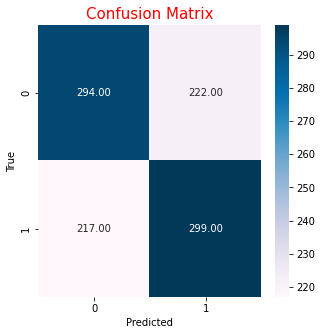

AUC: 0.6107543116399254


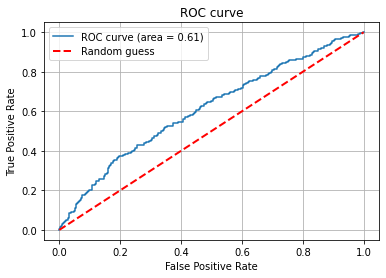

Step:  3
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          1   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          1   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          1   

      log odd score  
0         -2.296740  
1          7.461852  


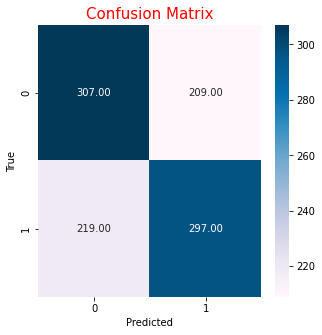

AUC: 0.6208648819181539


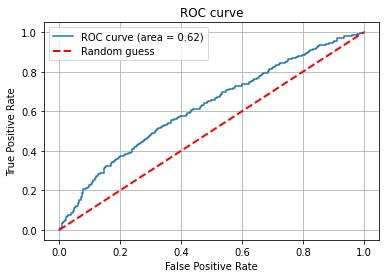

Step:  4
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          1   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          1   

      log odd score  
0         -3.559746  
1          9.085083  


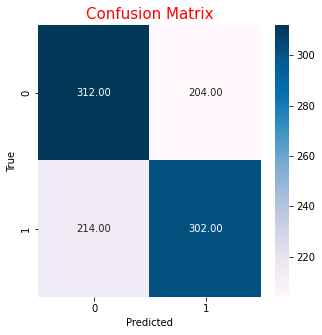

AUC: 0.6318655729823929


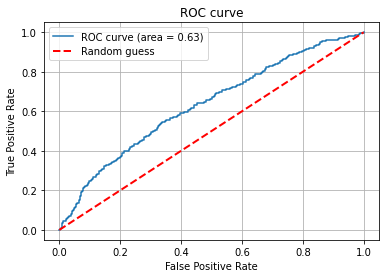

Step:  5
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          1   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          1   

      log odd score  
0         -6.088853  
1         11.065276  


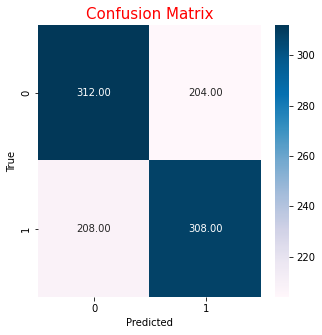

AUC: 0.6411799170722914


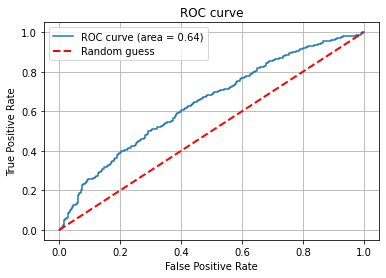

Step:  6
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          1   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          0   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          1   

      log odd score  
0         -7.136589  
1         10.108747  


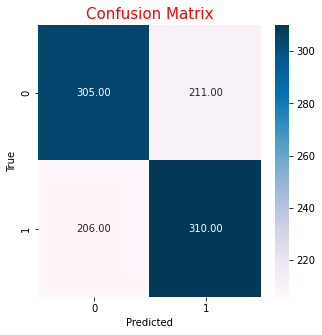

AUC: 0.6407555134907758


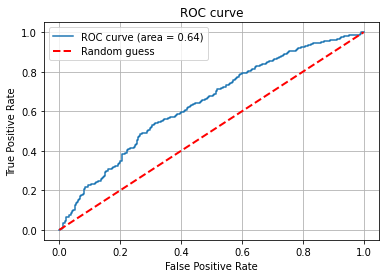

Step:  7
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          1   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          0   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0         -9.614723  
1          5.310550  


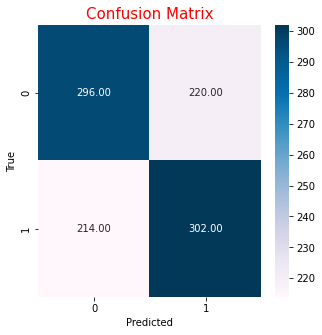

AUC: 0.6202113755182982


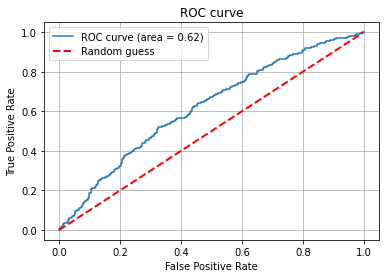

Step:  8
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          1   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          1   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0        -66.181185  
1         14.699631  


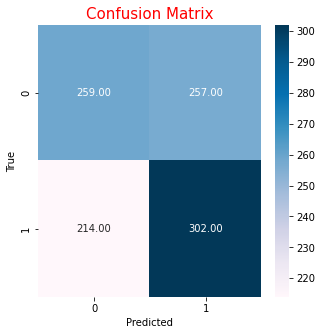

AUC: 0.5847755543537047


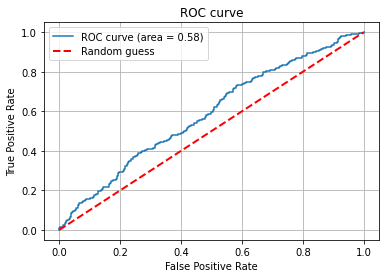

Step:  9
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          1   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          0   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          1   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          1   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0        -88.315668  
1         22.380904  


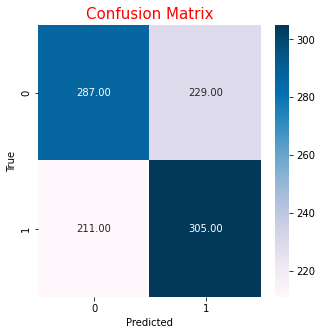

AUC: 0.5913857340304068


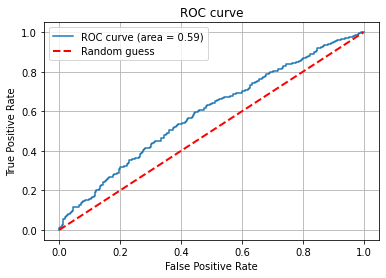

Step:  10
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          0   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          1   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          1   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          0   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0        -45.716714  
1          7.731974  

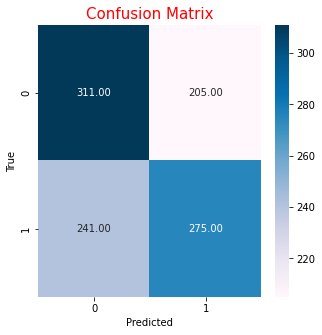

AUC: 0.5851905684754523


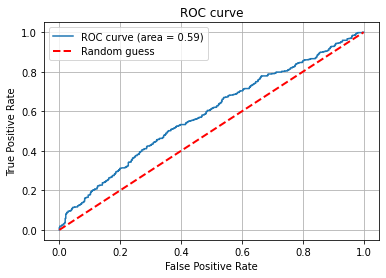

Step:  11
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          0   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          0   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          0   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0        -33.682212  
1         40.444095  

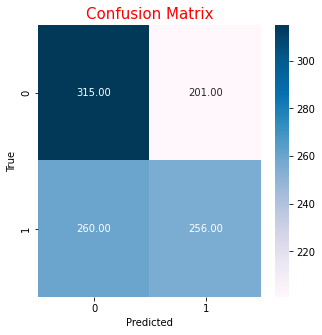

AUC: 0.5802329337179256


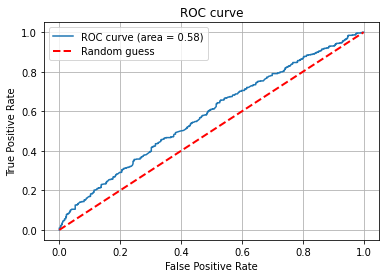

Step:  12
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          1   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          0   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          0   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          1   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          0   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          1   

      log odd score  
0        -13.845362  
1         22.387418  

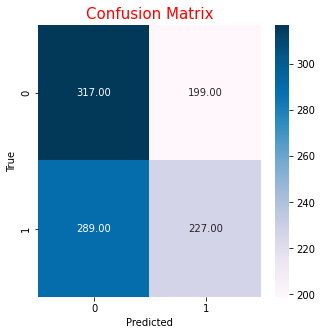

AUC: 0.5581620695871642


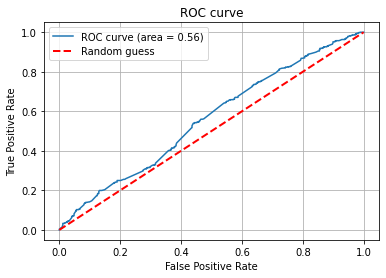

Step:  13
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          0   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          0   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          1   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          1   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          0   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0         -4.615121  
1         18.460482  

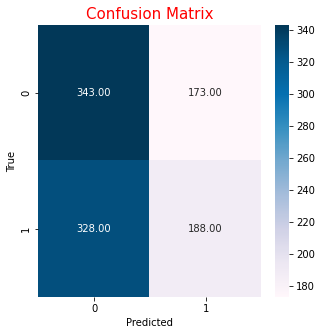

AUC: 0.5394131963223364


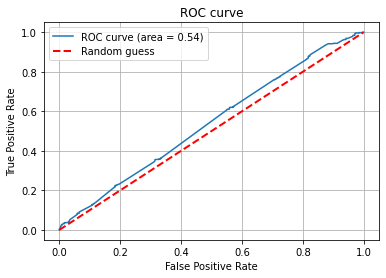

Step:  14
                                                    seq  Bound  predicted  \
0     GGGCGCTCAAATTTAACAAGCTGCTCCATTATTTATTGCGGTTAAA...      0          0   
1     GAAGCGATACCGCTAGTGCGGATAGCATGAAAAACTTCATTCCAGA...      1          1   
2     TGGAATCTAAAAATCAGGTGGAGATTATGTACGTACCTGTGACGGC...      0          0   
3     GAAATACATTTCGAGTGAGTGGGAGTGACAGGTGGGGAGCCACCAC...      1          0   
4     AAAGGAAACTCTATTCACTTGTTCAGTGCGGCTCGTGGGAAGAGAA...      0          0   
...                                                 ...    ...        ...   
1027  ATTTAATCAAGAGCGTTGAATGTCAGCCCTGGCAATGGCAGCAAGG...      1          0   
1028  TCGCAAATGTGGACTCCAGTGCATCGCCGCCGCACATTTTAACCTG...      0          1   
1029  AGTTTCTTGGTCTTTTCCGGTTTACCCTTTTTCTTAACCACGCCCT...      0          1   
1030  CTTCTCCATGTTGCGAAGCACCACCACATCCATGTCCAGATAAAGA...      0          0   
1031  GAGTCGCACGACTGCCGTTGACACGTTGGGGGAAAAAACTAGGGTT...      0          0   

      log odd score  
0          0.000000  
1          4.615121  

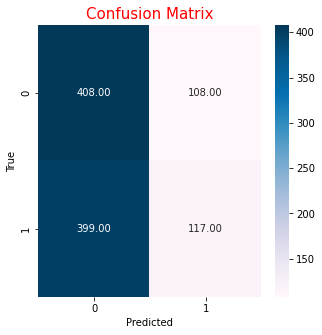

AUC: 0.5329213238387116


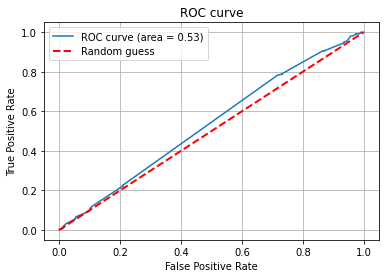

Step:  2
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          2.823247  
1         -4.470463  


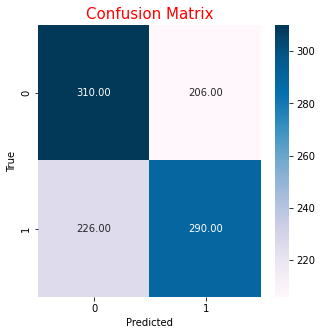

AUC: 0.5897219217595095


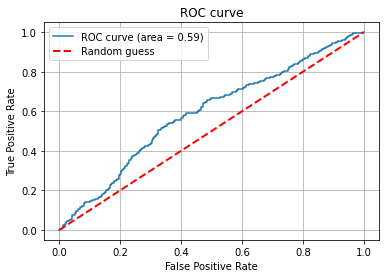

Step:  3
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          3.733701  
1         -5.308030  


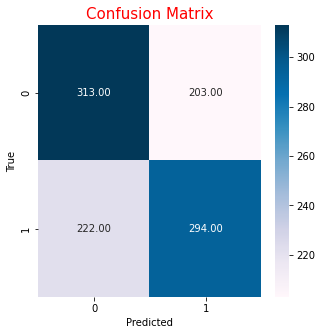

AUC: 0.5990775794723875


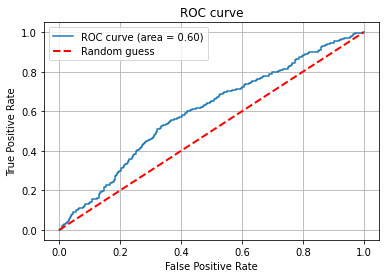

Step:  4
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          5.449389  
1         -4.651423  


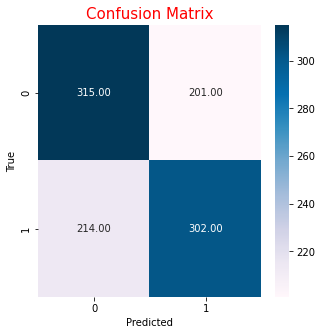

AUC: 0.6058304789375638


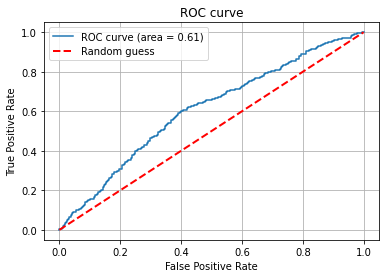

Step:  5
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          7.113710  
1         -5.462681  


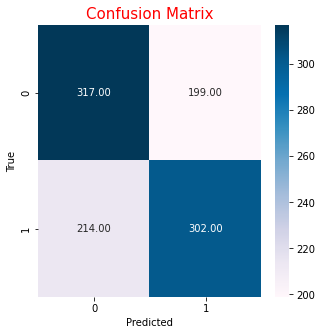

AUC: 0.6113777717685235


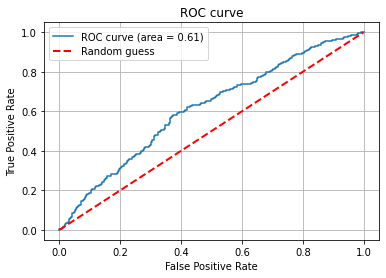

Step:  6
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          6.942526  
1         -9.113421  


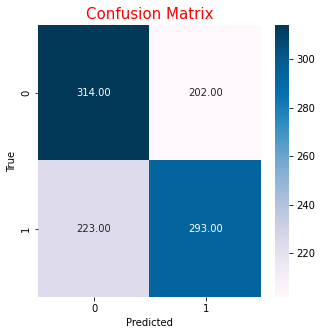

AUC: 0.6141270055886064


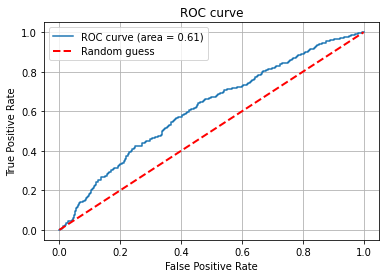

Step:  7
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          6.098365  
1        -12.921909  


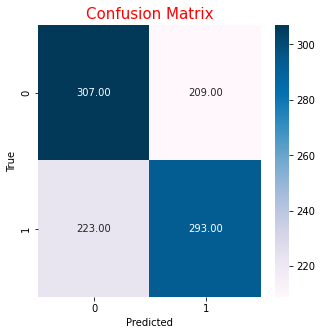

AUC: 0.5944016285079021


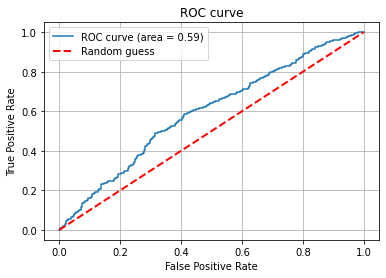

Step:  8
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          0   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          0   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0         57.539066  
1        -54.465274  


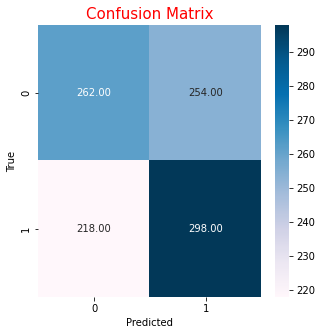

AUC: 0.5709242233038879


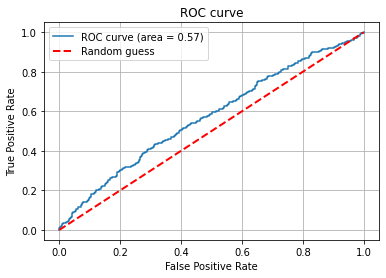

Step:  9
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          1   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          1   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          0   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          1   

      log odd score  
0         14.068006  
1       -113.047494  


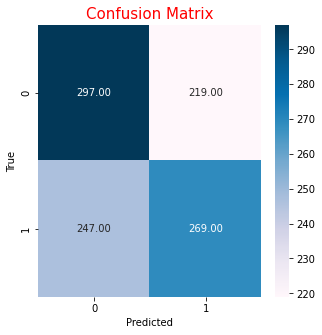

AUC: 0.5617112853794844


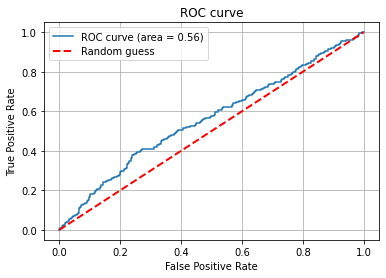

Step:  10
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          0   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          1   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          1   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          1   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          1   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          1   

      log odd score  
0        -19.552472  
1       -153.244515  

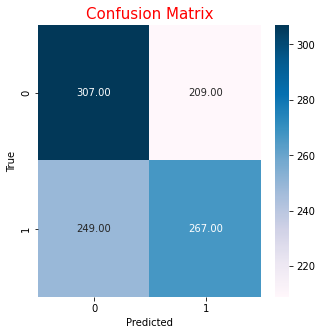

AUC: 0.5730199507241152


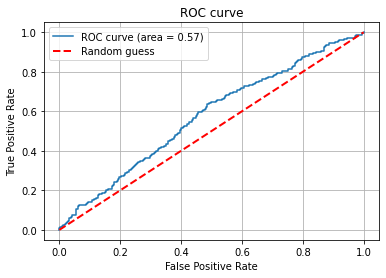

Step:  11
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          0   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          1   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          0   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          1   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          0   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          1   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          1   

      log odd score  
0        -24.451971  
1       -133.174758  

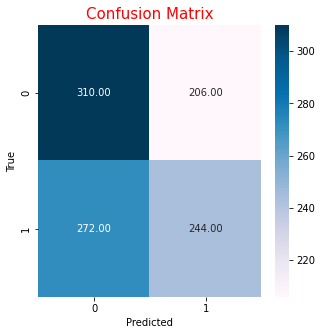

AUC: 0.5701524097109548


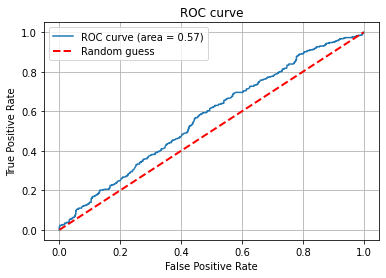

Step:  12
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          0   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          1   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          0   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          1   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          0   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          1   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          1   

      log odd score  
0         -9.230241  
1        -84.270815  

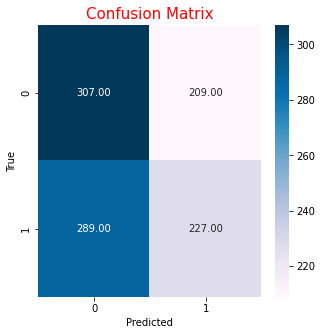

AUC: 0.553236358992849


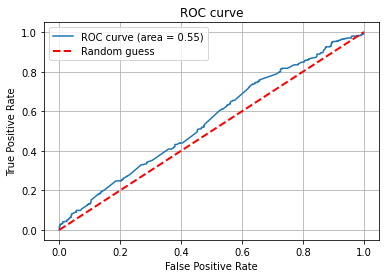

Step:  13
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          0   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          1   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          1   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          0   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          1   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          1   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          1   

      log odd score  
0          0.000000  
1        -35.554374  

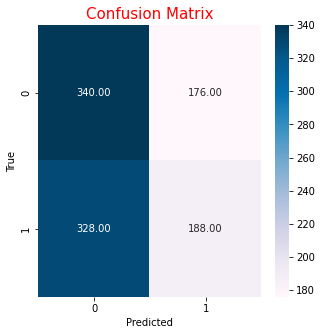

AUC: 0.522989153296076


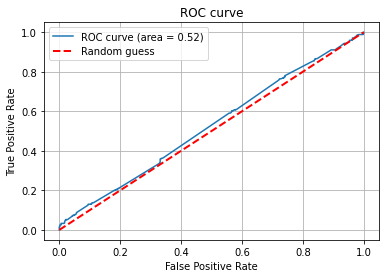

Step:  14
                                                    seq  Bound  predicted  \
0     GATATTGGCAATGCTCGGGTTCGGTATAAGGTAAAACCTTGCTCTT...      1          0   
1     ACGAGTAGTAACCAGATTAATTATTCACAAGATTTCGACTAACTGA...      1          0   
2     CAGTTGGGGAAGCAGAAGAAGGAAATGGGCAATTGTTTGACTTGAC...      1          0   
3     AACACTCACCTTATCCAGCGTGAAAGAGATGTAGGCATAAATGCCA...      1          1   
4     GCTAGTTAAAAACTGGAACAAAATTTAAGGAGTTTAAATACATAAA...      1          1   
...                                                 ...    ...        ...   
1027  CAAGCTTTTTTCCGACGCAGAATTGGGAGTCATTAGAATATTGTTG...      0          1   
1028  TCACTATTCTGCTGCACGAAGTGCCCCATGAGATTGGTGACTTTGC...      1          0   
1029  TGACATAGGGCACCCAGGTTTCGTTTGATTCCAACTAATTTCCACA...      1          0   
1030  TTGTTTTTGAGCTACACACACGCGTATTAAGTATACGGTTTCAGCA...      1          1   
1031  TTACTCTCTAATGTGACAACACCCATAACCATATTAATCACGTGTG...      0          0   

      log odd score  
0          0.000000  
1        -18.460482  

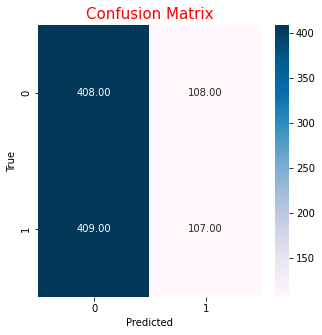

AUC: 0.509810107565651


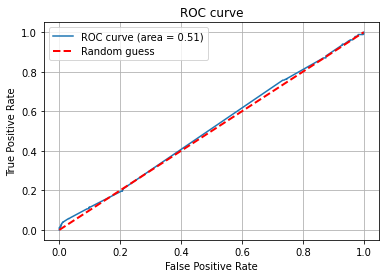

Step:  2
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          0   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0          4.537181  
1         -0.746765  


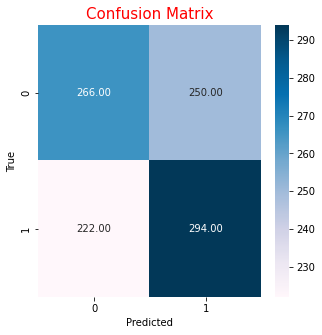

AUC: 0.5684003365182382


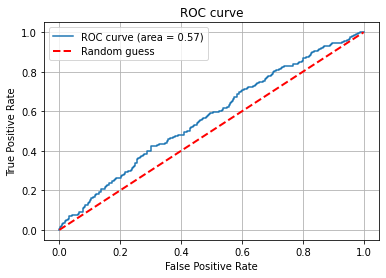

Step:  3
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0          6.025453  
1         -0.663770  


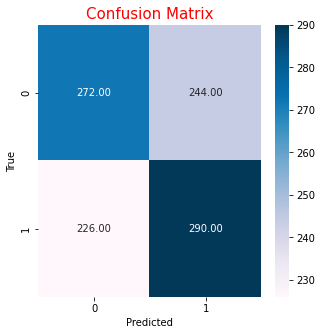

AUC: 0.5788451715642089


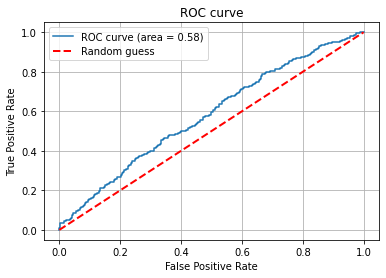

Step:  4
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0          5.862276  
1         -1.222509  


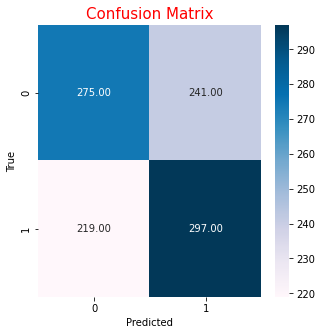

AUC: 0.5902777777777778


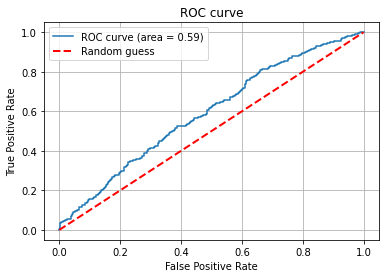

Step:  5
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0          7.287976  
1         -0.771962  


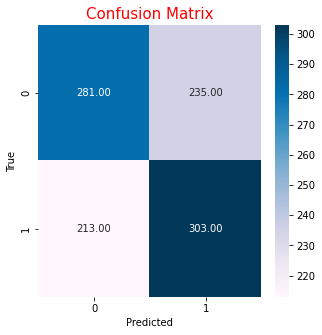

AUC: 0.598931103900006


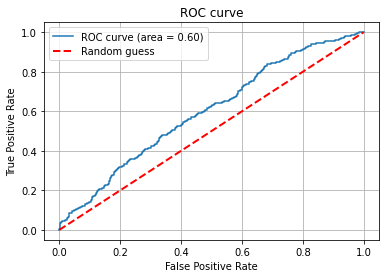

Step:  6
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          1   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0          8.315615  
1          1.068838  


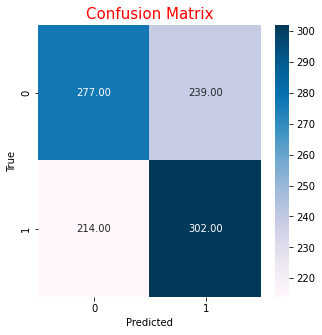

AUC: 0.6034793582116459


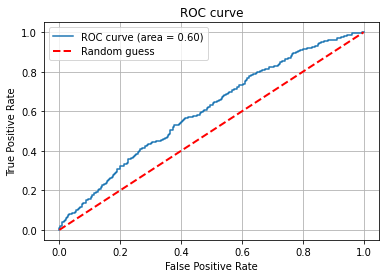

Step:  7
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          1   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          1   

      log odd score  
0          8.349594  
1          6.400509  


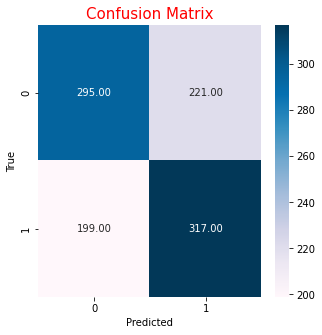

AUC: 0.5990362658494082


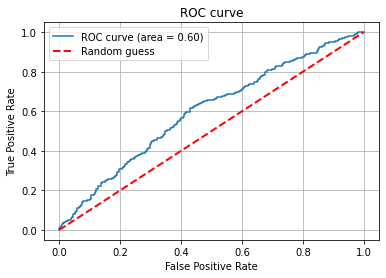

Step:  8
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          1   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          1   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          0   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          1   

      log odd score  
0          4.253180  
1         -7.686916  


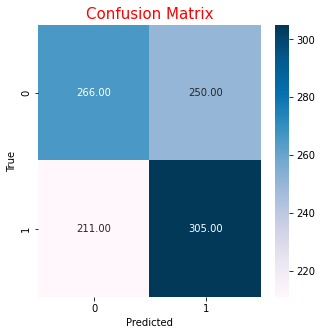

AUC: 0.5747964365122289


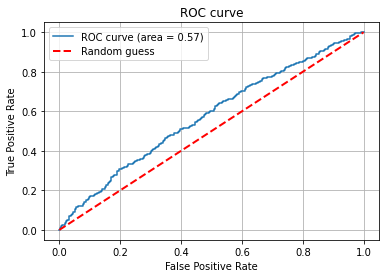

Step:  9
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          0   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          0   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          1   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          1   

      log odd score  
0         22.471064  
1         -3.995930  


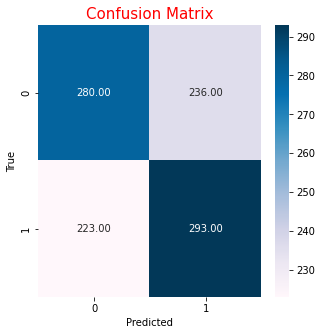

AUC: 0.5714312541313623


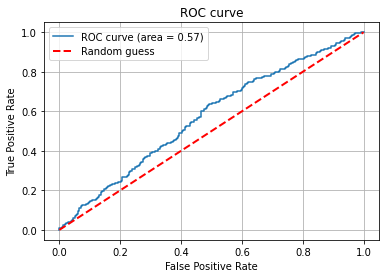

Step:  10
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          1   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          0   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          0   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0         34.489823  
1         34.564559  

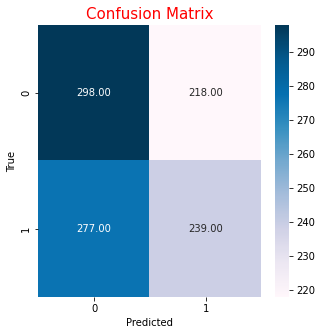

AUC: 0.544370831079863


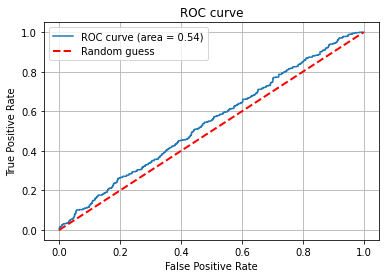

Step:  11
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          1   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          0   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0         36.920964  
1         12.044088  

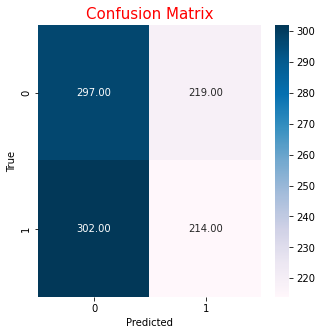

AUC: 0.5186549786671474


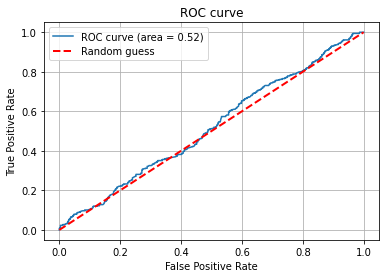

Step:  12
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          1   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          1   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          0   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          0   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          1   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0         18.460482  
1        -14.215858  

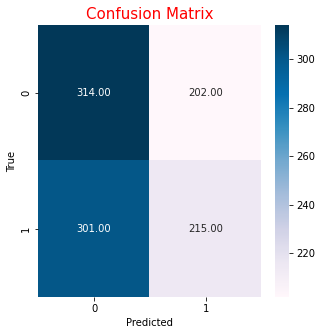

AUC: 0.5288068625683552


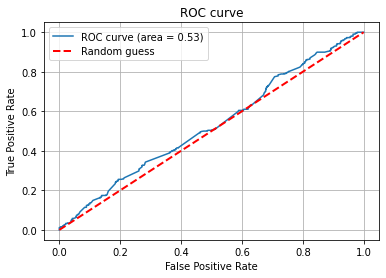

Step:  13
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          0   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          0   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          1   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          0   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          0   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0      0.000000e+00  
1     -1.603181e+01  

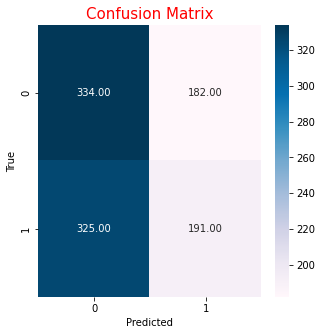

AUC: 0.5171733219157503


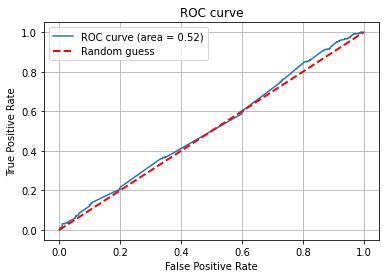

Step:  14
                                                    seq  Bound  predicted  \
0     AACGGGGTGAAGGCTGGGTCTTGGGCCTGGGAATCATCTTTGGGTA...      0          0   
1     ATTAAATAAAAACCACTTAATAACGTTAATTAAGAACTCAATCGAT...      1          0   
2     TCGACATGGTGGCCCACTTTGCCGCCCTGAAGGCCGTGGGTGAGTC...      1          0   
3     CAAATTTTAATGAGTAACCCCTTATAAAAAATGTGAAAATTGGTAA...      0          1   
4     TGAATATTCCCGGTCTCGGTTCCATTTCATCCCGCTTCGGGTTGGG...      0          1   
...                                                 ...    ...        ...   
1027  TTTGTCGGGAAATGTCCAAAGCTCCGCCTCCGCGAGAGACAGTTAC...      0          0   
1028  ATTAGCAAATTGAAGGAAACAAACAATTTAGCATAGAAGAAGCACG...      1          1   
1029  TTACATAATTAACAGAGATCGACTAACCCCATGTTGACACGAAAGG...      0          0   
1030  CCCCGCCCCCAACCTCCACCGTGGGCGACGGAAACTCGAAGGACGT...      0          0   
1031  GACGTGGAGTTCGGGCATGTGTCGATTAAATATATATTAAGTCGCA...      1          0   

      log odd score  
0          0.000000  
1         -5.707110  

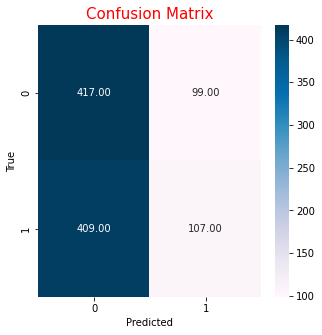

AUC: 0.5200784207679827


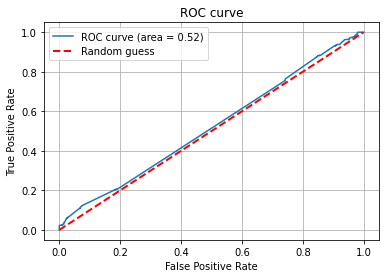

Step:  2
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          0   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0          5.860219  
1         -1.500781  


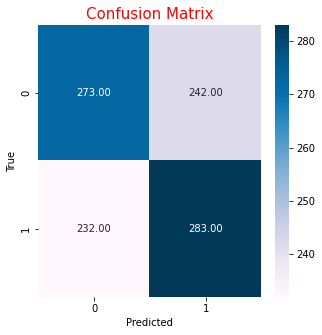

AUC: 0.5511245169195965


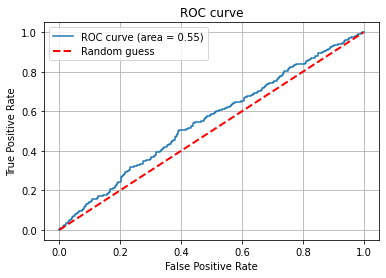

Step:  3
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          0   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0          7.757484  
1         -2.046612  


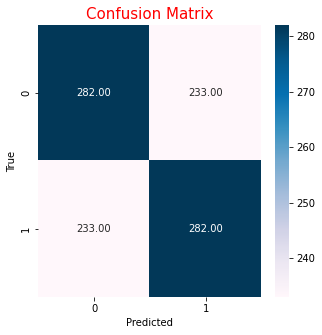

AUC: 0.5621264963710058


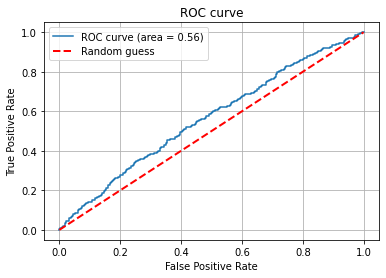

Step:  4
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          0   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0          9.700620  
1         -2.006949  


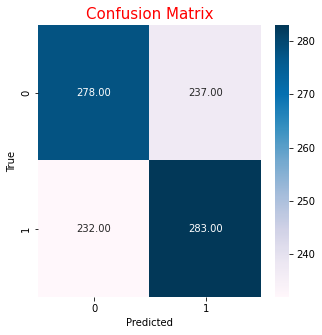

AUC: 0.5727589782260345


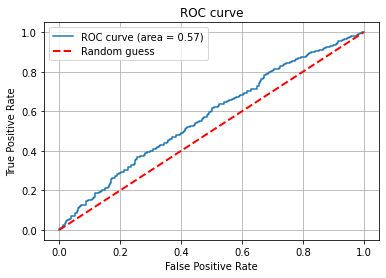

Step:  5
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          0   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0          9.767660  
1         -0.550987  


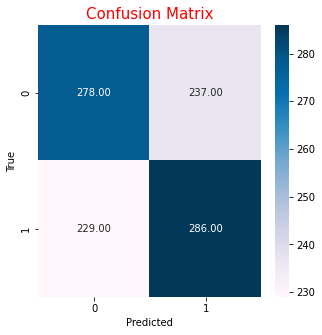

AUC: 0.579225186162692


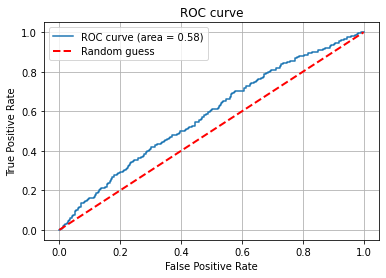

Step:  6
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          0   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0         11.625668  
1          1.595026  


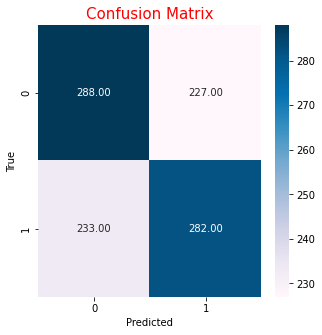

AUC: 0.5852917334338769


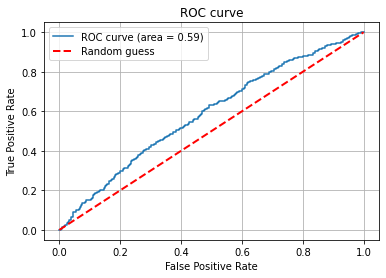

Step:  7
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          0   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0         17.696657  
1          4.701111  


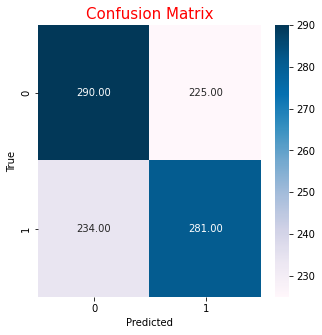

AUC: 0.5781166933735508


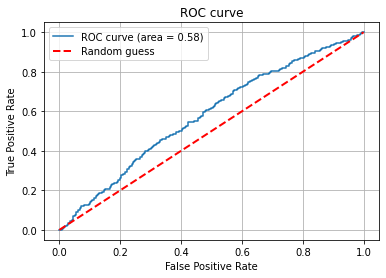

Step:  8
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          0   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          0   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          1   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0         79.554699  
1         24.955521  


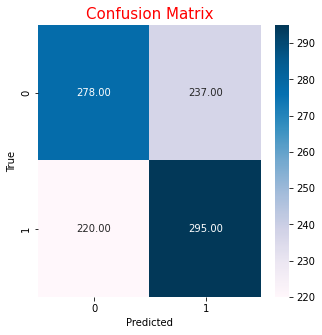

AUC: 0.5795682910736167


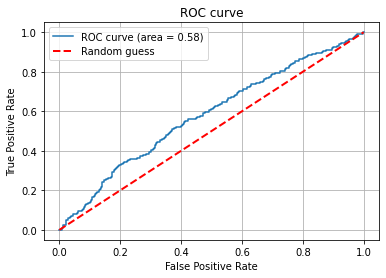

Step:  9
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          0   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          0   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          1   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0        169.324363  
1          5.026757  


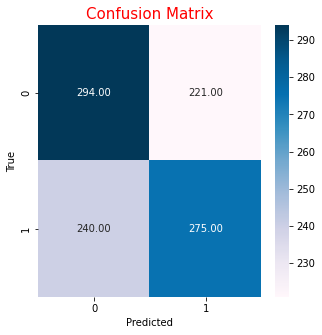

AUC: 0.5684343481949288


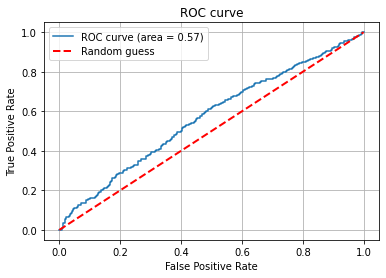

Step:  10
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          0   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          1   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          0   

      log odd score  
0        107.524141  
1        -10.344276  

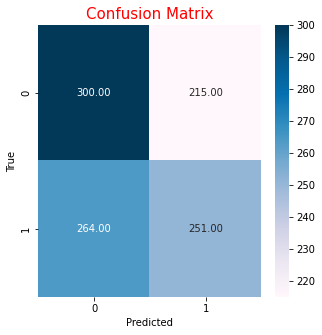

AUC: 0.5631539259119616


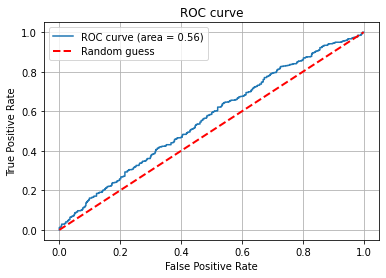

Step:  11
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          1   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          1   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          1   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0         38.297333  
1         17.001904  

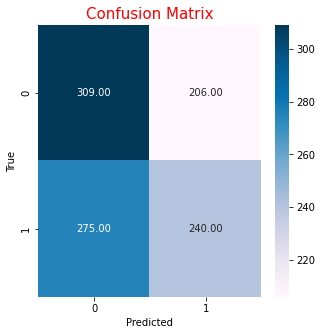

AUC: 0.5561353567725515


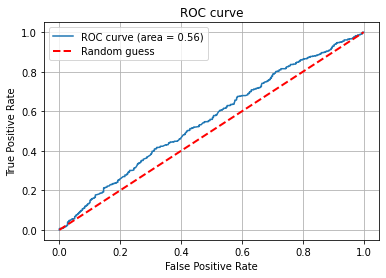

Step:  12
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          0   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          1   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          0   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          1   

      log odd score  
0         23.763787  
1         14.533546  

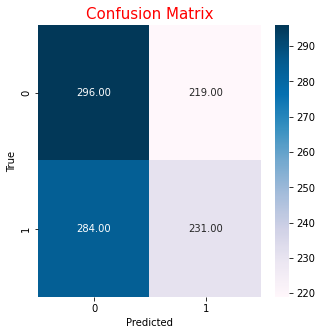

AUC: 0.5218078989537185


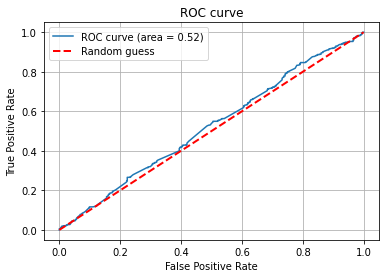

Step:  13
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          0   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          1   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          0   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          0   

      log odd score  
0         18.460482  
1          4.615121  

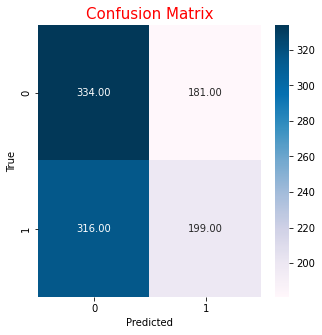

AUC: 0.5075294561221604


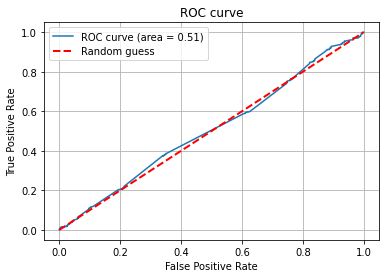

Step:  14
                                                    seq  Bound  predicted  \
0     TGCAGTTGCGCAGGAAGCGTCCATCCTCGCCCGTTTCGGAGCCCTC...      0          1   
1     CATGGAGATTTATGTGTTTTGACTGCTTTTTTAGTCGGTCGTGCGC...      0          1   
2     GTAGATCGCAAACGGTCCACTTGAATTGCAGCTCAGCTCAATTAAA...      0          0   
3     CACAGAATGCAAAACTAGGCAAGAAATGCTACTGACTATGGTAATT...      1          0   
4     ACAGTGTTAGGAAACGTATCACGGACTACTTGGATTATTTTTCTTT...      1          0   
...                                                 ...    ...        ...   
1025  AGAATTACATACAACAATGAACATCAATTTTAAATTAATTTCTTTA...      1          0   
1026  TGGGTGGCCATGGGTGCGGAACATGGCATGTTGCGAATCCTCAACT...      1          0   
1027  CTTTTTATTTAGTACTAGCCTCTCACGCTTTTTTTTTATTGACTAA...      1          0   
1028  CAGTCCTTTCAGGTACCAGGAGGTCCTGCGCTCCTTGGGCGCCTCA...      0          0   
1029  TGGCTTGATCTTGCAGTTGGCCAGCAAGCGAGTCAACTGTTCCGAG...      0          0   

      log odd score  
0          9.230241  
1          4.615121  

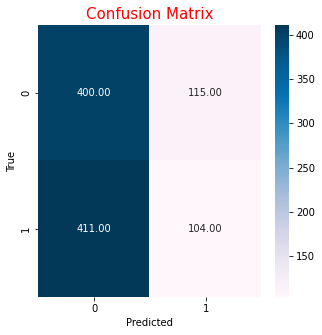

AUC: 0.48962955980771045


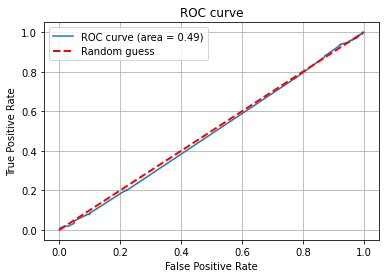

Step:  2
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0         -9.411375  
1         -3.601077  


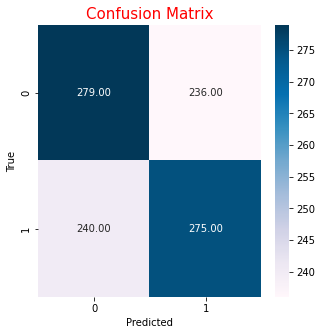

AUC: 0.57221981336601


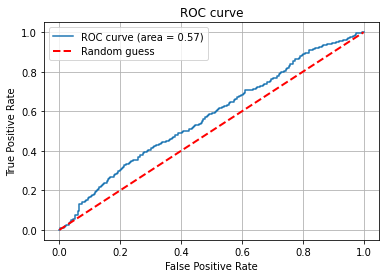

Step:  3
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -12.284872  
1         -5.060829  


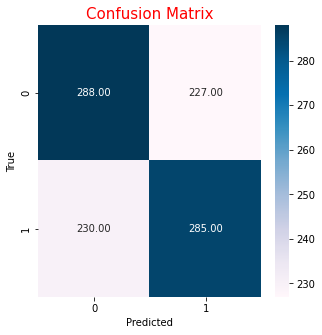

AUC: 0.5805862946554812


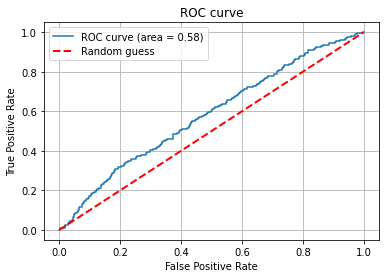

Step:  4
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          1   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -15.643490  
1         -5.229659  


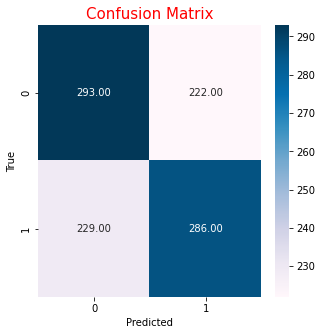

AUC: 0.5907512489395796


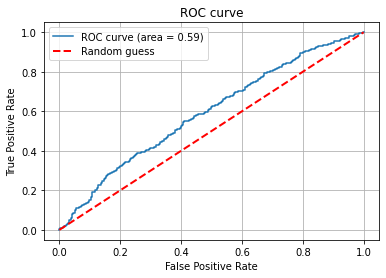

Step:  5
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          1   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -18.294273  
1         -4.181703  


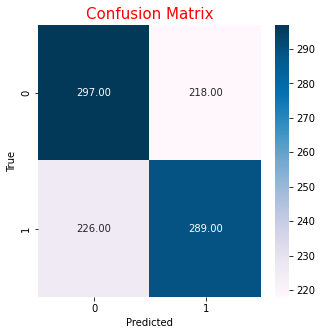

AUC: 0.5983598831181073


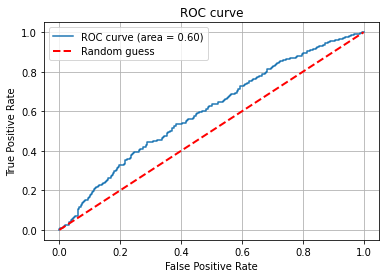

Step:  6
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          1   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          1   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -22.260829  
1         -0.550794  


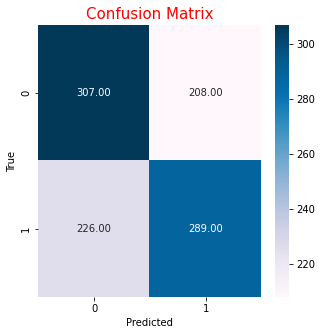

AUC: 0.6016363464982561


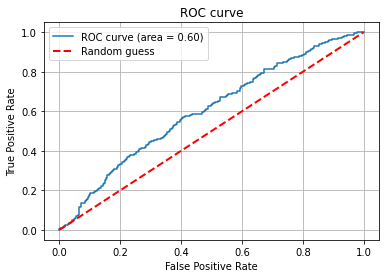

Step:  7
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          1   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          1   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -32.788126  
1         -5.500981  


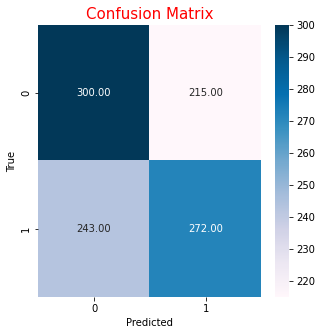

AUC: 0.5863097370157413


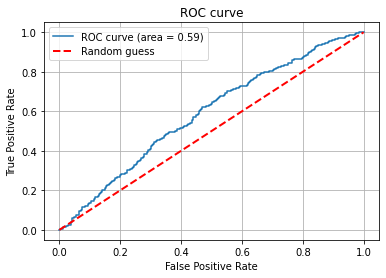

Step:  8
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          1   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          1   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          1   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -74.868353  
1        -11.092167  


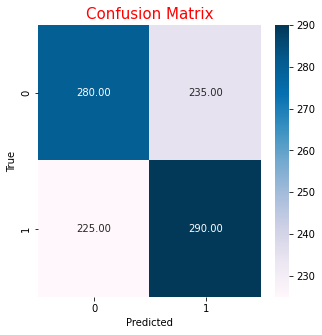

AUC: 0.5721444056932793


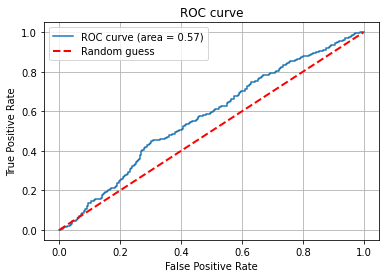

Step:  9
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          1   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          0   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          1   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          1   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          1   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          0   

      log odd score  
0       -134.265973  
1          0.774430  


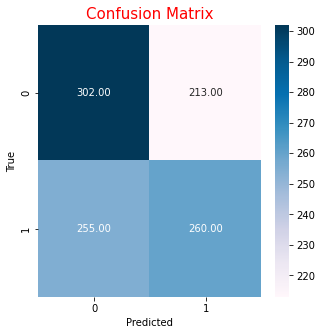

AUC: 0.5517579413705345


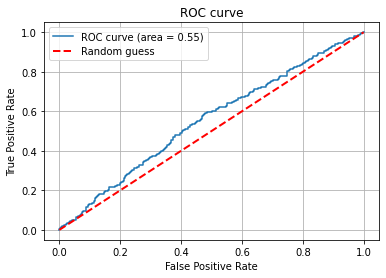

Step:  10
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          1   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          1   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          1   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          1   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0       -104.008291  
1          5.842809  

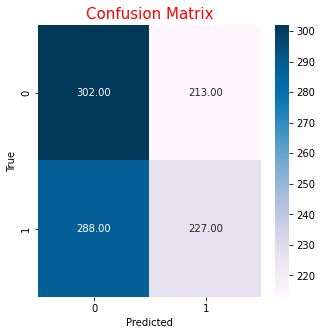

AUC: 0.5453727966820623


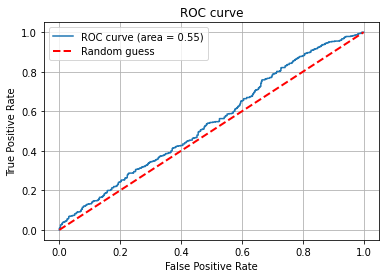

Step:  11
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          1   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          1   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          1   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          1   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -47.506000  
1         11.780808  

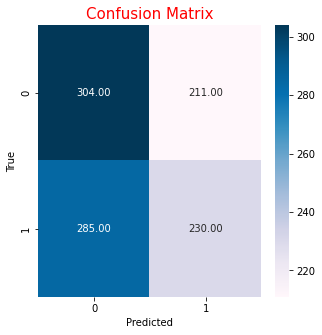

AUC: 0.5357262701479876


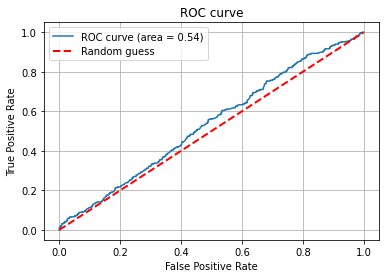

Step:  12
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          0   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          1   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          1   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          1   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          1   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          1   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0        -38.504447  
1          9.230241  

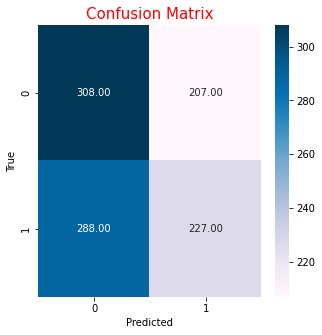

AUC: 0.5294806296540674


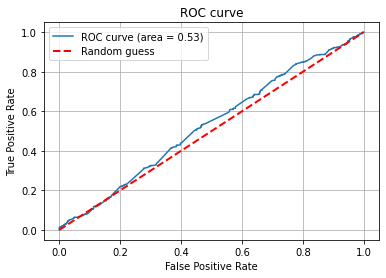

Step:  13
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          1   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          1   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          1   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          1   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          1   

      log odd score  
0          2.548095  
1          9.230241  

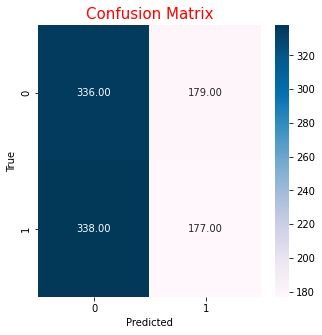

AUC: 0.5181242341408238


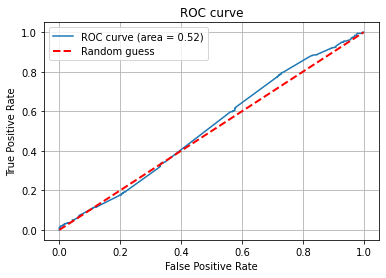

Step:  14
                                                    seq  Bound  predicted  \
0     CCAAGCCGGCACCGACGAATCGCACGCGCGTGTTATTGTATTGCGT...      1          1   
1     CATCTAAAGACCCACAAAGAATGAGAGTTCTGAATCGCTTAATAAT...      1          0   
2     CCAGTTATTTGACTTTTTTAAGAAAAGTAATAATCTTCAATTTTAT...      0          0   
3     TGCGTAACGGCCATACATTGGTTTGGCACTATGCAGCCACTTTTTT...      1          0   
4     TTTAATGCTTTTCCTATGGATATAAACACTAATATCAAAAAGGGGC...      0          1   
...                                                 ...    ...        ...   
1025  GATGCATTTCCTACTTACATTCTCGCTCCCCACGTTTCGAACATTC...      0          0   
1026  ATTTGATCGCAAATTATAATATTTTACTCTGGCATATACTCACGAC...      1          0   
1027  AAATCCCAAAGATACTTTGCACACTATAATGTCAACCCCAAGTAAT...      0          0   
1028  GACCATATTTTGTTGCACTTAACTTGTATTTTGCGTATCACTGATC...      1          0   
1029  ACGGCCAGAAAGTTTTGGCGCTCGTGAGGGTTAAGGGCGTACCATT...      0          0   

      log odd score  
0          3.926936  
1          0.000000  

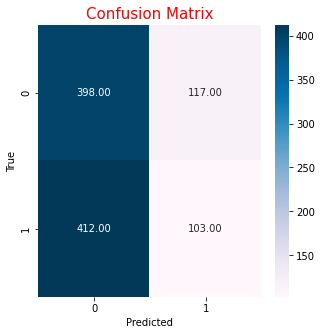

AUC: 0.5074672447921577


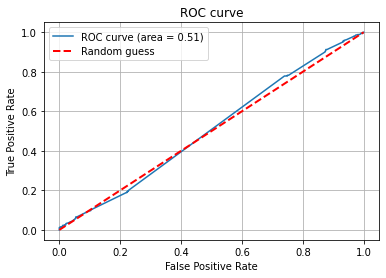

Step:  2
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          1   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          0   

      log odd score  
0         -8.037466  
1         -1.636840  


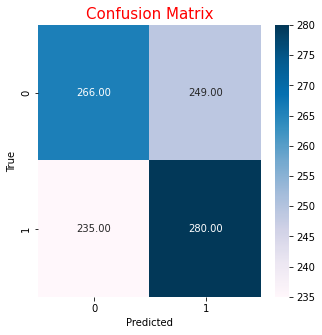

AUC: 0.5490017909322273


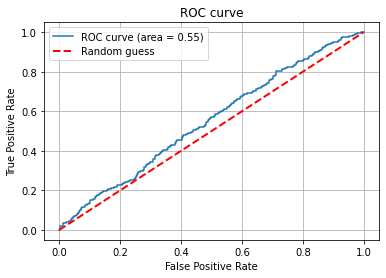

Step:  3
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          1   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          0   

      log odd score  
0        -10.387865  
1         -2.257747  


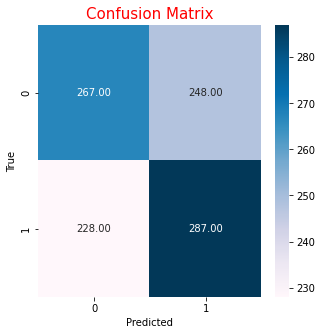

AUC: 0.5585031576962955


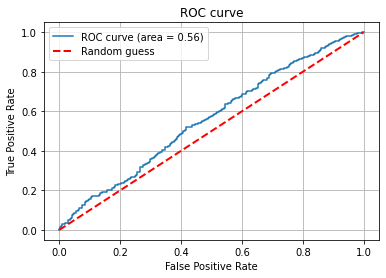

Step:  4
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          1   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          0   

      log odd score  
0        -12.960843  
1         -2.904155  


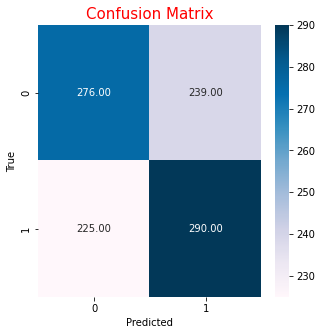

AUC: 0.5676538787821661


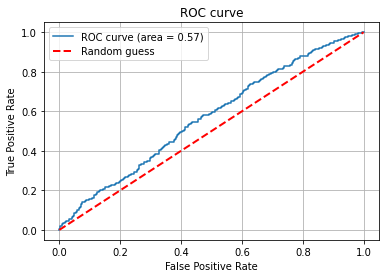

Step:  5
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          0   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          1   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          0   

      log odd score  
0        -14.152878  
1         -4.228891  


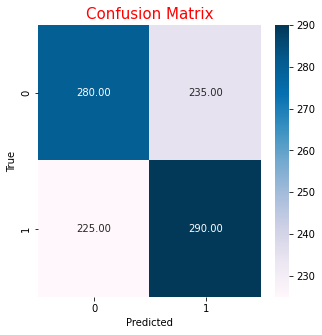

AUC: 0.574206805542464


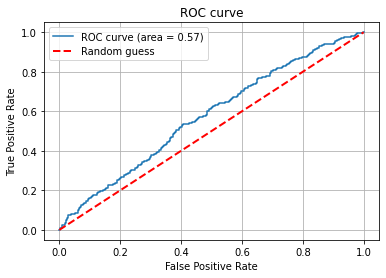

Step:  6
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          0   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          1   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0        -17.711316  
1         -4.445145  


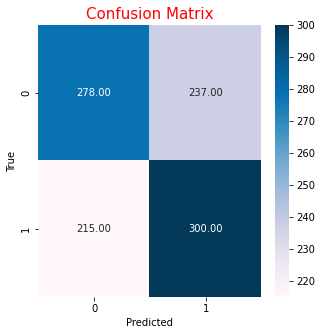

AUC: 0.5783843906117447


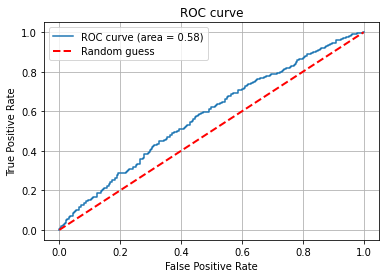

Step:  7
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          0   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0        -18.894869  
1         -9.048477  


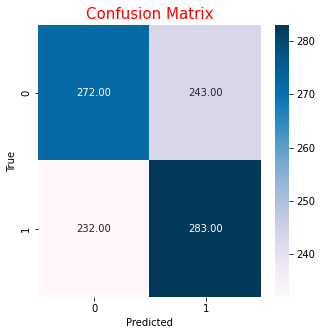

AUC: 0.5647242906965784


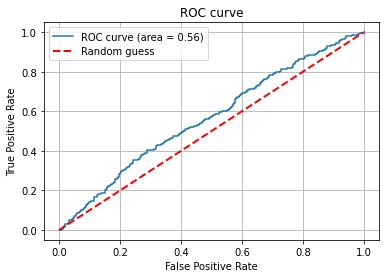

Step:  8
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          1   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          1   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          1   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0        -56.543254  
1         19.231685  


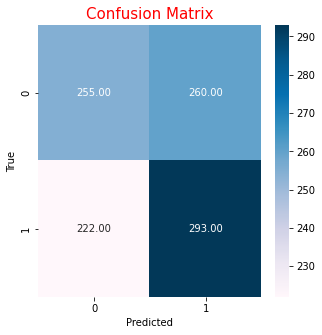

AUC: 0.5475728155339806


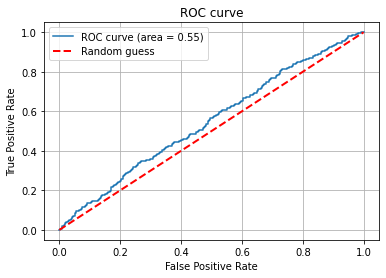

Step:  9
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          1   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          0   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0        -28.605533  
1         96.559475  


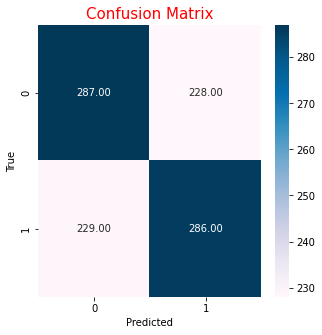

AUC: 0.5641323404656423


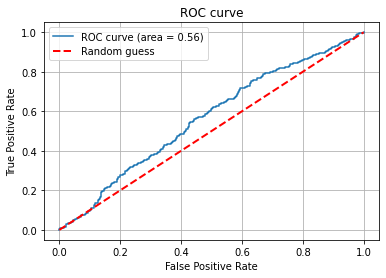

Step:  10
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          1   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          1   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0       -111.601507  
1         74.753309  

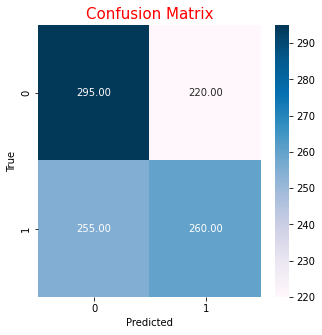

AUC: 0.5526025073051184


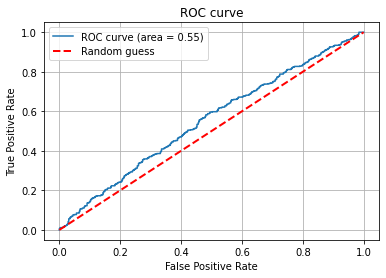

Step:  11
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          1   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          0   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          1   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          1   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0        -94.002848  
1         11.826018  

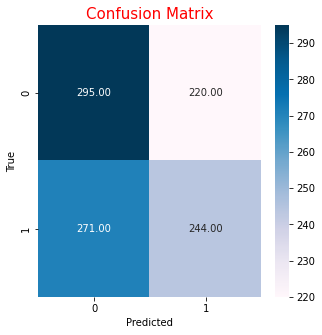

AUC: 0.5313790178150627


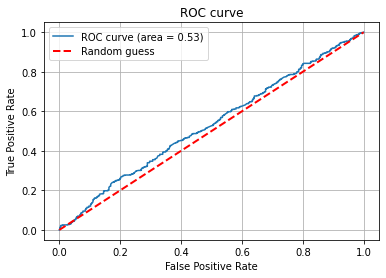

Step:  12
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          1   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          0   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          0   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          0   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          0   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          1   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          0   

      log odd score  
0        -23.075603  
1         19.613378  

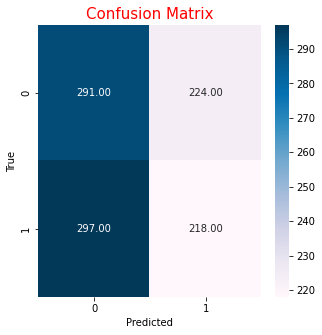

AUC: 0.49552266943161466


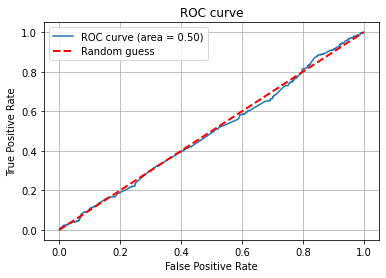

Step:  13
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          1   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          0   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          0   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          0   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          1   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          1   

      log odd score  
0          0.000000  
1          3.236280  

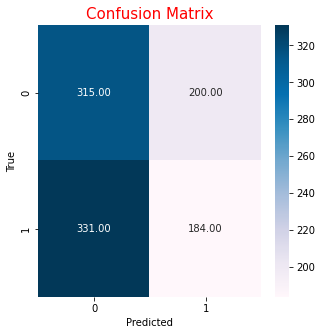

AUC: 0.49618625695164476


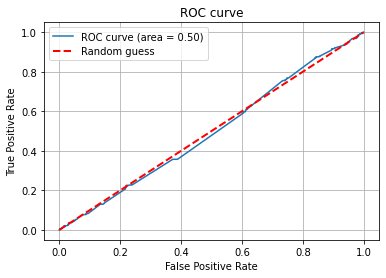

Step:  14
                                                    seq  Bound  predicted  \
0     TTTTTAATAACTAACTTATTGTAAAGAAATTCGTTTGTATAAAAAA...      1          0   
1     CACTGGCCTACATCTAGCCGAATATATATGTACATATGTACATATA...      0          0   
2     CGAGTATTCCTATTTTAATTGTATTCATTGGTTAATTTATCGCTAA...      0          0   
3     CCAACGCCTCGACCTCGTTGGTCTGATCTTCCTTGTAGTTGCGGCT...      0          0   
4     GTGCCACCCGTTGGCTCGTCGAAGAGGCTGCCGTTGTTATTGTTGC...      1          1   
...                                                 ...    ...        ...   
1025  TTCTTGTTCTAAATTACTAATACGACTCATAAGTCAGTCTATAAAA...      1          1   
1026  CCAAAGTGGTGATCAGCCAGCTTTCTGCTCCAACAGTTGAGGTGAA...      0          0   
1027  ACGAATTTCGAACAGTTCGGACCAGCAATCAGAGACTGATAAGCCC...      0          0   
1028  AATTAACTTAACAATATAATCACTTTTCTGCCGAAAAAGGAAATGA...      1          0   
1029  TGTCAGGCTGTGTGCTCTAAATGTTGTCGTCTATCGTTTATCGCTC...      0          0   

      log odd score  
0          0.000000  
1         -9.230241  

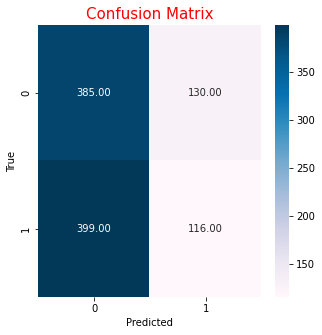

AUC: 0.5007389951927608


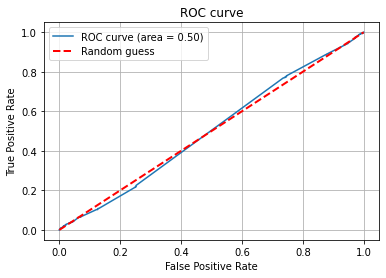

Step:  2
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          1   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0         -4.190117  
1         -0.645030  


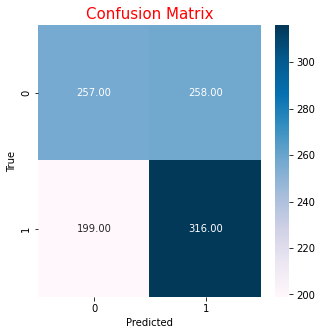

AUC: 0.5794966537845225


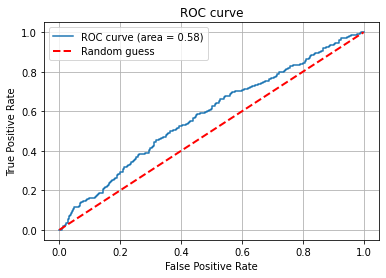

Step:  3
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          1   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0         -5.387562  
1         -3.430346  


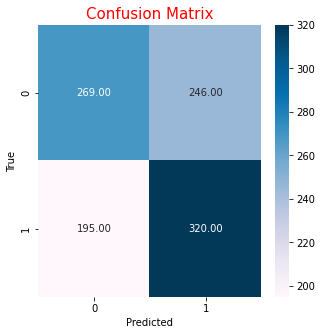

AUC: 0.5880403431049109


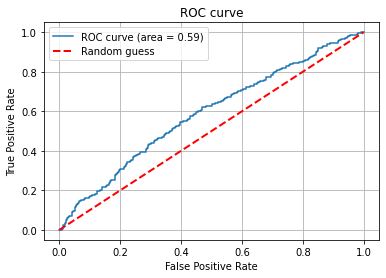

Step:  4
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          1   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0         -6.397924  
1         -8.032899  


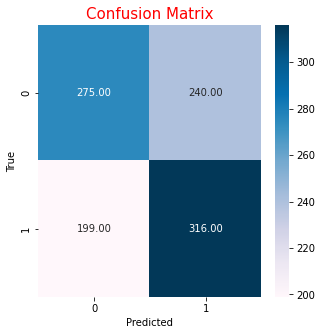

AUC: 0.5958827410689038


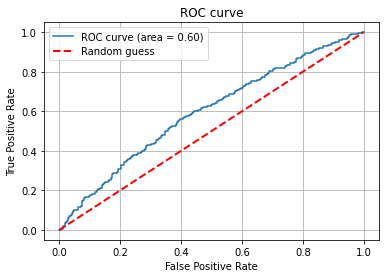

Step:  5
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          1   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0         -7.073538  
1        -10.894038  


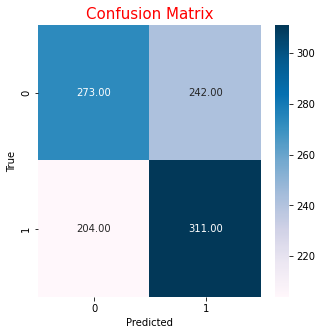

AUC: 0.5972023753416911


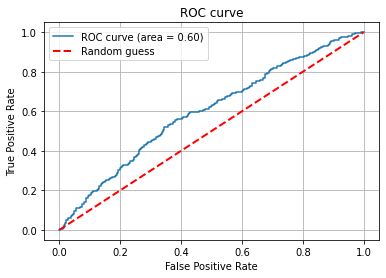

Step:  6
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          1   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0         -9.756043  
1        -15.561064  


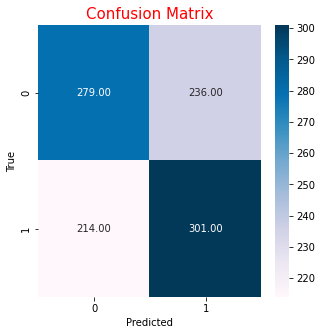

AUC: 0.6016815911018947


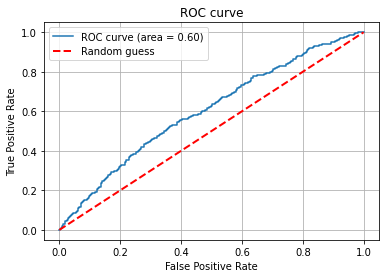

Step:  7
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          1   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          1   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0          2.671403  
1        -25.066686  


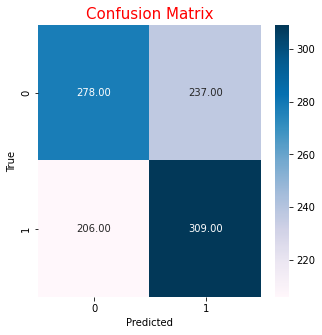

AUC: 0.5951852200961448


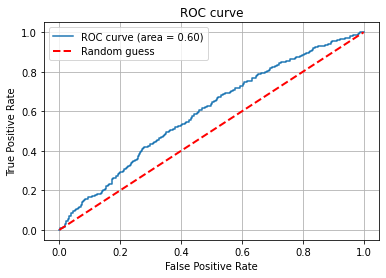

Step:  8
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          1   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          1   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          1   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0         35.357288  
1        -80.285923  


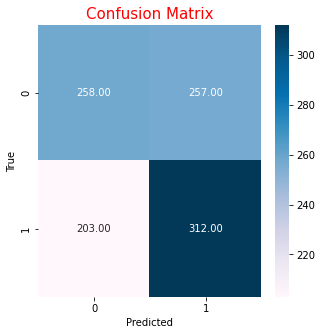

AUC: 0.5810123480064097


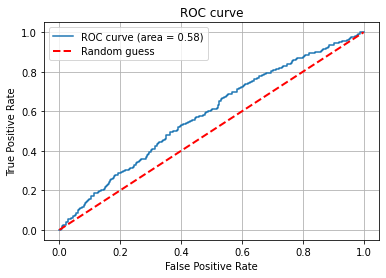

Step:  9
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          0   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0        -13.270727  
1        -48.963220  


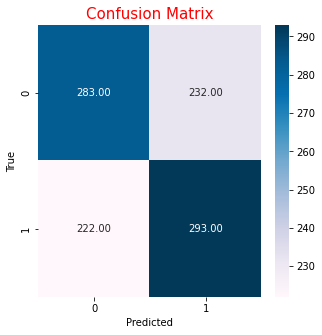

AUC: 0.571854086153266


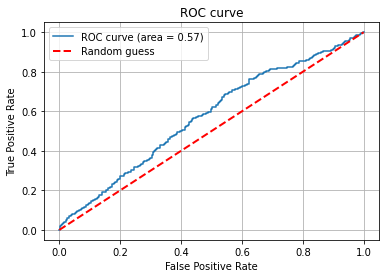

Step:  10
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          1   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0        -30.382640  
1        -57.559160  

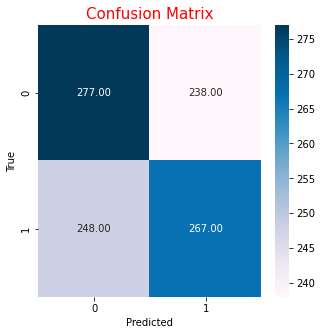

AUC: 0.5606805542463946


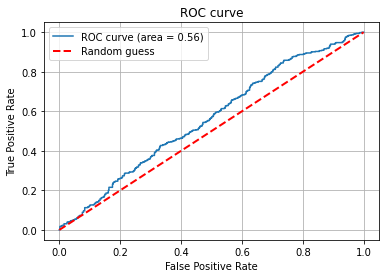

Step:  11
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          1   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0        -45.358327  
1        -55.668889  

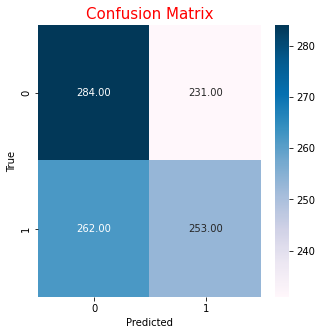

AUC: 0.5425845979828448


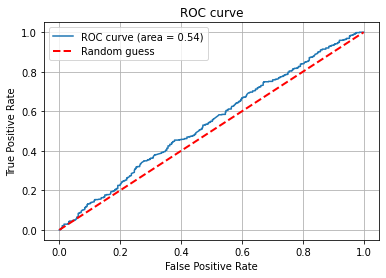

Step:  12
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          0   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          1   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0     -3.764245e+01  
1     -5.315127e+01  

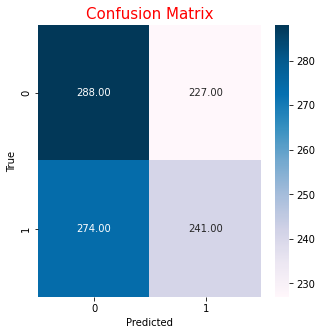

AUC: 0.5177151475162598


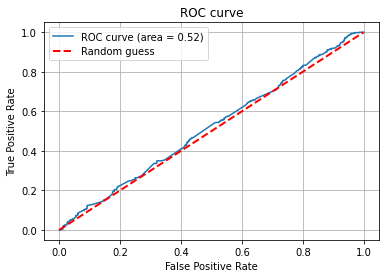

Step:  13
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          0   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          0   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          1   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          1   

      log odd score  
0        -26.882351  
1        -21.710947  

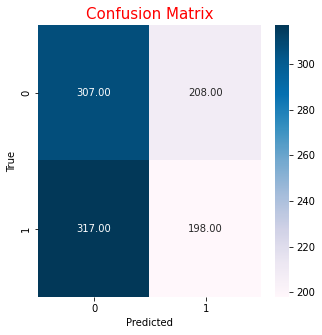

AUC: 0.5076406824394383


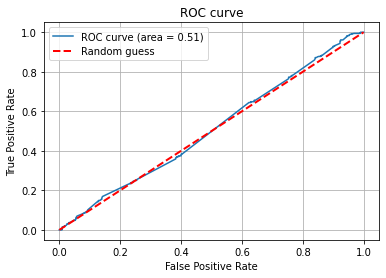

Step:  14
                                                    seq  Bound  predicted  \
0     TATTAGTGGGCATTTATCTGATAGCAAGCTAGACTTAAATGAACGA...      1          0   
1     AAAGGGTTCGTGGGAAGGGGAAGGTGGGCAGCCTGCAAGCTGCGAA...      0          0   
2     GCCCAAGGCGGGTTTTGGAAAGAATTCCCATACAGGTGATTCGCAG...      0          0   
3     TCATCTGGCGCTGCACATCGGCCGCGCTAATGGTGTGTCCTCCTCC...      0          1   
4     AATTTATGTGAAAAGTGGCAAACAACAACAGAGCGCACAGAGCACG...      1          0   
...                                                 ...    ...        ...   
1025  TTTTTCTTACCGTTTATCTTTCTTTAGTCTAACCAACATCTTGGCC...      0          0   
1026  ATCCGAAAATGGCTGTTGTGAAATTGCTTTCCTAAACGAATGGCCG...      1          0   
1027  AGCGAAAAGCCCGATTTGGGGCGTTGTGAGTATCTCCCGGCTGGAA...      1          0   
1028  TGATATAATTTTTTTACAGACATCTATCTCATCAGAAAGTAGTCAA...      0          0   
1029  AACATTGTGACCGTAAACTGCACGGTTATATATCTGGATCAGTGCG...      1          0   

      log odd score  
0        -24.575803  
1        -22.671556  

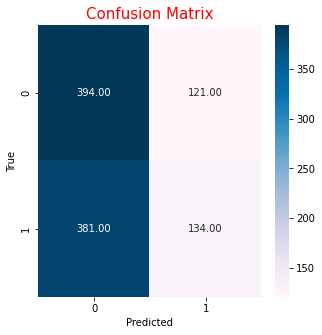

AUC: 0.5206221133000283


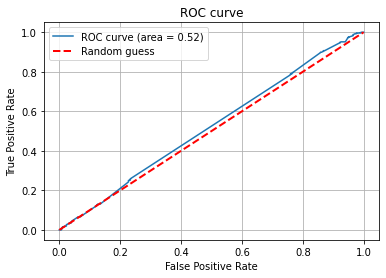

Step:  2
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          0   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0         -3.706162  
1         -2.803598  


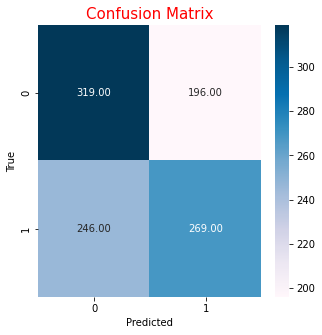

AUC: 0.5837760392119897


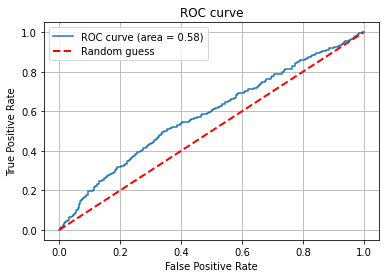

Step:  3
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          0   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0         -4.586396  
1         -3.807314  


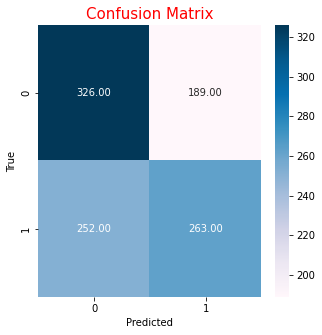

AUC: 0.5952643981525121


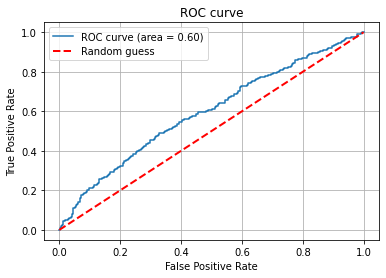

Step:  4
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0         -5.318573  
1         -4.498426  


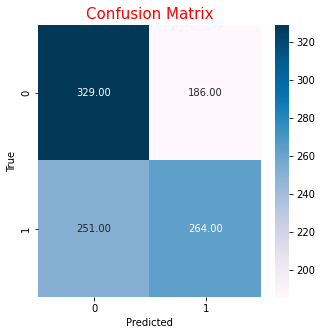

AUC: 0.6024168159110189


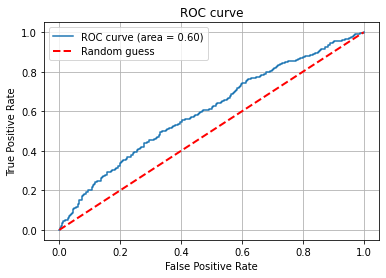

Step:  5
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0         -6.732809  
1         -5.684256  


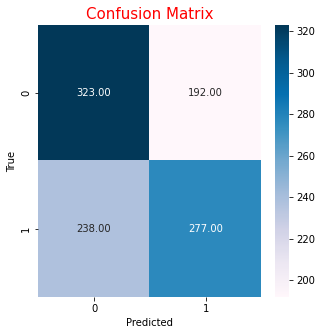

AUC: 0.6111339428786879


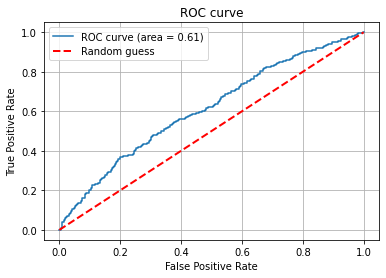

Step:  6
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0         -4.568438  
1         -7.267700  


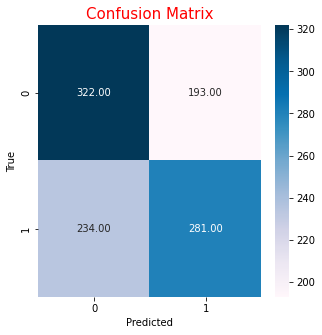

AUC: 0.6209633330191346


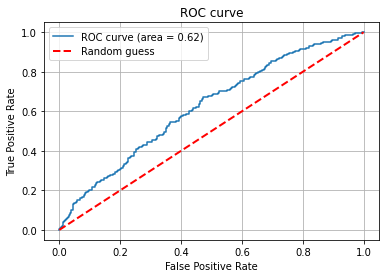

Step:  7
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          1   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0          5.882157  
1        -19.102482  


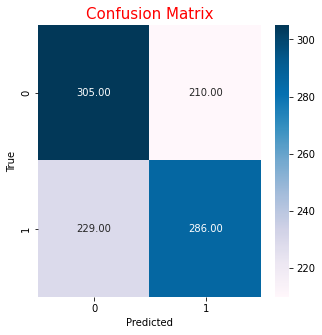

AUC: 0.6125893109623904


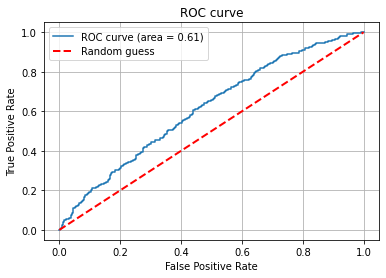

Step:  8
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          1   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          0   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          0   

      log odd score  
0         -3.045223  
1        -27.186653  


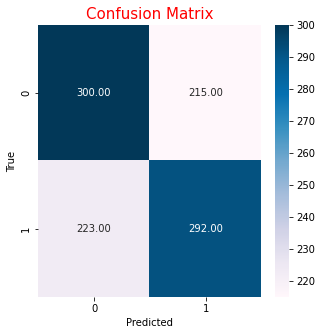

AUC: 0.5984654538599303


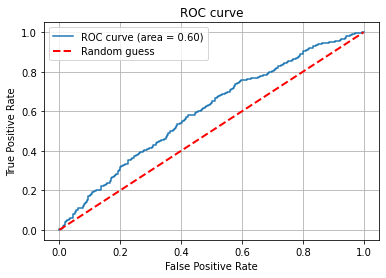

Step:  9
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          0   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          1   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0        -28.483899  
1        -35.626516  


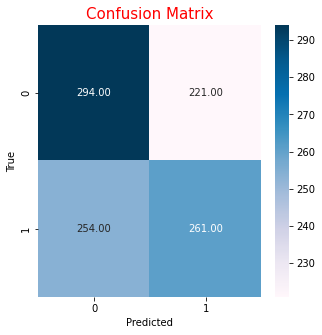

AUC: 0.5632726929965124


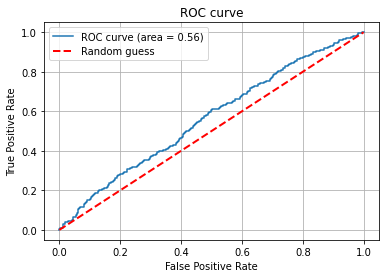

Step:  10
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          0   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          0   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0        -60.468488  
1        -29.681683  

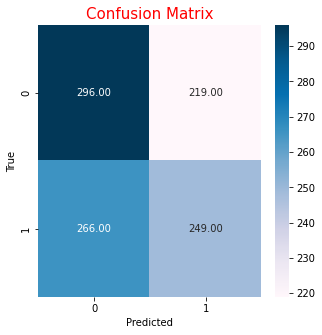

AUC: 0.5512583655386937


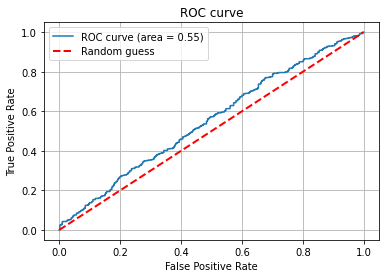

Step:  11
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          1   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          0   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          1   

      log odd score  
0         -1.376369  
1        -44.081920  

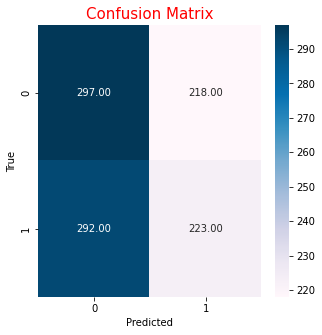

AUC: 0.5364011688189273


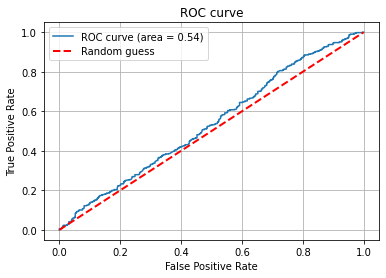

Step:  12
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          1   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          1   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          1   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          0   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          0   

      log odd score  
0         13.845362  
1        -34.086018  

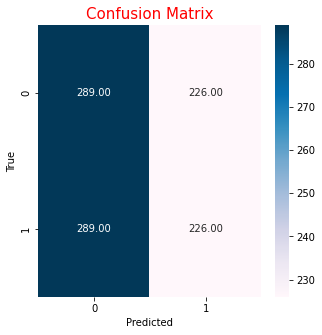

AUC: 0.5178112922989915


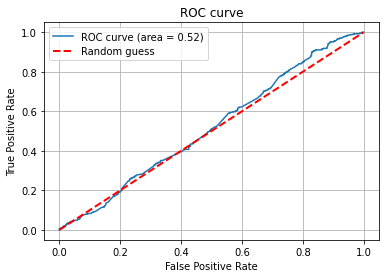

Step:  13
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          0   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          1   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          0   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          0   

      log odd score  
0          0.000000  
1         -4.615121  

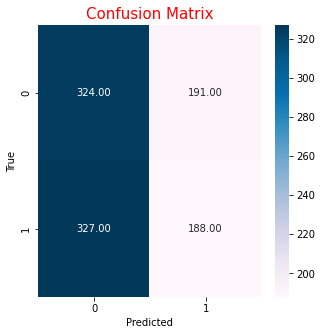

AUC: 0.5230917145819587


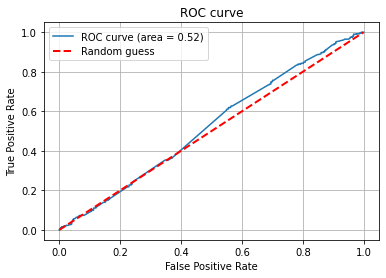

Step:  14
                                                    seq  Bound  predicted  \
0     ACAAAAAATGCGAAAATTGACCCAAAAATTAATTTTCCAAAATCCT...      0          0   
1     GCAGGAAATCGCAGATCAAGCCATGCTGTGTATGAAGAAGAGCGAA...      0          0   
2     TCCTTAATTATCAATTGGAAATCATATATTTTAAATGATCTATTAT...      1          0   
3     TGTTTTTTCGCTATTCGCAATTCGTGTTAAACTTTTTACTTAATTT...      0          0   
4     ACAAAAACCCAAAAGCAAAACCAAAACCAAATCAAATATCAAATGA...      1          1   
...                                                 ...    ...        ...   
1025  CGTCACATAATCAATTGTCCAACACGAAGCAATAAAAACAAGAGCA...      1          0   
1026  TTCATCGACAAGAAAGCGCAGTTGTCGCTGCTGGGTAAGTTCATAC...      0          0   
1027  TTGTCGCTCGTCTCCTTGCGGAGATCCGTGTAGAATGTGTGTACGT...      0          0   
1028  ACCATCCGCCCAACCACGCCCACCGCCTCATTCCCCTCAGCCGCCC...      1          0   
1029  CAAGGCGGGCATCGCAAATACCAGTGGCAGCAATAGTCCGGCAACT...      0          0   

      log odd score  
0          0.000000  
1         -4.615121  

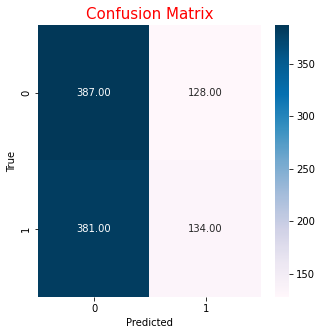

AUC: 0.5182486568008295


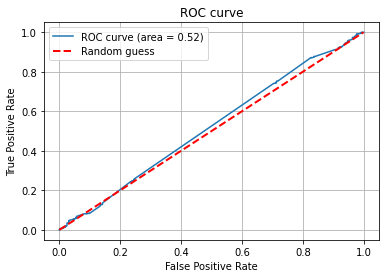

In [6]:
colnames2 = ["FoldID", "EventID", "start_index", "seq", "Bound"]
colnames = ["FoldID", "EventID", "seq", "Bound"]

#df =  motif 
#df2 = non motif
#df4 = mixed test file
df = pd.read_csv('/content/tad.txt', delimiter="\t")

df2 = pd.read_csv('/content/leftboundry.txt', delimiter="\t")
df1 = list(df["seq"])
df3 = list(df2["seq"])
#df1.reset_index(drop=True, inplace=True)
#df3.reset_index(drop=True, inplace=True)
#df4 = pd.read_csv('/content/test1/mixed.txt', delimiter="\t")

#df4=df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df4 = df4.sample(frac=1).reset_index(drop=True)
print('##### df head #####')
#print(df4.head())

motif_seq = df['seq'].to_list()
nonmotif_seq = df2['seq'].to_list()
print("Len of motif list: ", len(motif_seq))
print("Len of non motif list: ", len(nonmotif_seq))
X_motifs = motif_seq
y_motifs = [1 for i in range(len(motif_seq))]

X_nonmotifs = nonmotif_seq
y_nonmotifs = [0 for i in range(len(nonmotif_seq))]

kf = KFold(n_splits=8)
print(kf.get_n_splits(X_motifs))

all_train_index_motif, all_test_index_motif  = [], []
all_train_index_nonmotif, all_test_index_nonmotif  = [], []

#motif
for train_index, test_index in kf.split(X_motifs): 
  #print("TRAIN: ", train_index, "TEST: ", test_index)
  all_train_index_motif.append(train_index)
  all_test_index_motif.append(test_index)

#nonmotif
for train_index, test_index in kf.split(X_nonmotifs): 
  #print("TRAIN: ", train_index, "TEST: ", test_index)
  all_train_index_nonmotif.append(train_index)
  all_test_index_nonmotif.append(test_index)

print('##### len(all_train_index_motif[0]) #####')
print(len(all_train_index_motif[0]))
print('##### len(all_train_index_motif) #####')
print(len(all_train_index_motif))
print('##### len(all_train_index_nonmotif) #####')
print(len(all_train_index_nonmotif))
print('##### all_train_index_nonmotif[0] #####')
print(len(all_train_index_nonmotif[0]))
print('##### all_test_index_nonmotif #####')
print(len(all_test_index_nonmotif))
print('##### all_test_index_motif[0]) #####')
print(len(all_test_index_motif[0]))

#K FOLD loop - for the number of folds 
for i in range(kf.n_splits):
  l_motif=[]
  l_nonmotif=[]

  motif_seq=[]
  for a in all_train_index_motif[i]:
    motif_seq.append(X_motifs[a])

  nonmotif_seq=[]
  for a1 in all_train_index_nonmotif[i]:
    nonmotif_seq.append(X_nonmotifs[a1])
  

  for j in range(len(all_test_index_motif[i])):
    test_set_motif=X_motifs
    l_motif.append(X_motifs[all_test_index_motif[i][j]])

    test_set_nonmotif=X_nonmotifs
    l_nonmotif.append(X_nonmotifs[all_test_index_nonmotif[i][j]])

  l_1 =[1 for i in range(len(l_motif))]
  l_0 =[0 for i in range(len(l_nonmotif))]

  df_test= pd.DataFrame(list(zip(l_motif,l_1)),columns=['seq','Bound'])
  extra={'seq':l_nonmotif,'Bound':l_0}
  df_test= df_test.append(pd.DataFrame(extra))
  df_test=df_test.sample(frac=1).reset_index(drop=True)
  #print(df_test)

#training loop: 
  for i1 in range(2,15,1): #order of the markov models
    print("Step: ", i1)
    var = i1
    dict6 = train(motif_seq,nonmotif_seq,df_test)
    #print("dict6",dict6)
    acc = accuracy(df_test)
    print(acc)  
    y_true,y_pred = acc_score(df_test)
    confusion_mat(y_true,y_pred)
    #auc_calculate(df_test)
    roc_calculate(df_test)

In [8]:
#tad and right boundry

In [9]:
import random
import random
import string
import numpy as np
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)
import copy
import math
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import pylab as pl
from sklearn import metrics
from sklearn.model_selection import KFold
import os 
import seaborn as sns
random.seed(10)



def get_num(a, b, x):
    """
    gets a unique number between a range (a,b), divisible by x
    input:  a - start inde
            b - end index
            x = random number should be divisible by x
    return:
        random number divisible by x
    """
    if not a % x:
        return random.choice(range(a, b, x))
    else:
        return random.choice(range(a + x - (a % x), b, x))

def motif_string():
    """
    generates a string of length (by get_num) of ACGT
    returns: string of equal ACGT
    """
    length = 288
    # print("random length: " , length)
    len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    letters_list = list(random.choice(letters))
    random.shuffle(letters_list)
    # print(" Random generated string with repetition:")
    str1 = ""
    return str1.join(letters_list)

def non_motif_string(length):
    """
    generates a string of length (by get_num) of ACGT
    returns: string 
    """
    # print("random length: " , length)
    #len4 = length / 4
    # print("len / 4 :" , len4)
    letters = ["A", "C", "G", "T"]
    nonmotiflist = []
    for i in range(length): 
      nonmotiflist.append(random.choice(letters))
    # print(" Random generated string with repetition:")
    str1 = ""
    return str1.join(nonmotiflist)

def add_motif():
    """
    adds a motif - string input, to output by non_motif_string
    returns: string consisting of a motif
    """
    motif = 'ATACGTTACCCG'
    result = list(motif_string())
    i = random.choice(range(len(result)))
    result.insert(i, motif)
    result = "".join(result)
    return result,i


def write_to_df(length,var): #to generate non motif background files
  l=[]
  for i1 in range(int(length)):
    l1=[]
    i=-5
    result= non_motif_string(var)
    seq = "seq_" + str(i1 + 1) + "_peak"
    a='0'      
    l1 = ["A",seq,str(i), result,a]
    l.append(list(l1))
  df = pd.DataFrame(l,columns=['FoldID',	'EventID',	'start_index',	'seq',	'Bound']) 
  return df


def read_pfm_jaspar(filepath_):
  with open(Path(filepath_)) as f:
    lines = f.readlines()

  a = []
  for i in range(1,5,1):
    b = list(lines[i].split()[2:-1])
    a.append(b)
  a = np.array(a,dtype=float)
  return a

def convert_pfm_to_ppm(pfm):
  for i in range(pfm.shape[1]):
    sum = 0
    for j in range(pfm.shape[0]):
      sum+= pfm[j][i] 
    for j in range(pfm.shape[0]):
      prob = float(pfm[j][i]/sum)
      ppm[j][i] = float(prob)
  return(ppm)
  
p1=['A','C','G','T']
str1=''
def ppm_to_motif(ppm):
  motif = []
  mot=[]
  for i in range(ppm.shape[1]):
    arr = []
    for j in range(ppm.shape[0]):
      arr.append(float(ppm[j][i]))
    choice = np.random.choice(p1,p=arr) #motif is generated here
    mot.append(choice)
  
  return (''.join(mot))

def non_motif_create(df1,df2): #to implant a  motif in a non motif file -> 1. motif file, 2. mixed file 
  mot=[]
  l1=[]
  l2=[]
  for i in range(0,len(df1)):
    motif = ppm_to_motif(ppm)
    mot.append(motif)
    index=random.randint(0,len(df1[i])-1) #0 to 300 
    l1.append(index)
    df1[i]=df1[i][:index] + str(motif) + df1[i][index:]
    
    index2=np.random.choice(len(df2[i]))
    l2.append(index2)
    df2[i]=df2[i][:index2] + str(motif) + df2[i][index2:]
    #print(index)
    #print(df1[i])
    #print(mot)
  return l1,l2,df1,df2,mot #l1, l2 to store the index

def markov_model_motif(df1):
    """
    for a second degree motif markov model 
    returns dict2, dict3: count of the appearance of eg: A->C and eg: AC->T occuring
    """
    dict2, dict3 = {}, {}
    for j in range(len(df1)):
      seq = df1[j]
      for i in range(len(seq)-var): #dict2
        if seq[i:i+var] not in dict2: 
          dict2[seq[i:i+var]] = 1
        else: 
          dict2[seq[i:i+var]] += 1

      for i in range(len(seq)-var): #dict3
        if seq[i:i+var+1] not in dict3: 
          dict3[seq[i:i+var+1]] = 1
        else: 
          dict3[seq[i:i+var+1]] += 1

    #print('dict2: ', dict2)
    #print('dict3: ', dict3)
      
    return dict2, dict3

def motif_score1(dict2, dict3, seq):
    """
    returns the score of th markov model motif 
    """
    s = seq
    import math

    a=0
    sum = 0
    score = 1
    for i in range(0, len(s)):
      if s[i : i + var+1] not in dict3:
        #print("HELLOOOOOOOOOOOO", s[i : i + var+1])
        dict3[s[i : i + var+1]] = 1
      score = score * dict3[s[i : i + var+1]]
    #print('dict2-',dict2)
    #print('dict3-',dict3)
    return math.log(score),dict2,dict3

def motif_score(dict2, dict3, seq):
    """
    returns the score of th markov model motif 
    """
    s = seq
    import math
    score = 0
    ep=0.01
    for i in range(0, len(s)):
      if s[i : i + var+1] not in dict3:
        #print("HELLOOOOOOOOOOOO", s[i : i + var+1])
        dict3[s[i : i + var+1]] = ep
      else:
        dict3[s[i : i + var+1]] = dict3[s[i : i + var+1]] + ep
      score = score + math.log(dict3[s[i : i + var+1]])

    #print('dict2-',dict2)
    #print('dict3-',dict3)
    return score,dict2,dict3

def train(df,df2,df4):
  """
  df = for the motif markov model - seq 
  df2 = for the non motif markov model  - seq 
  df4 = the test file - pass the entire thing = seq + bound 
  Returns: the final dictionaries
  """
    # df1 = df['seq']
  #dict2, dict3 = {}, {}
  #dict2non, dict3non = {}, {}
   
  dict2, dict3 = markov_model_motif(df)  # markov model for the motif.txt file
  # print("####################################################")
  
  dict2_non, dict3_non = markov_model_motif(df2)  # markov model for the non motif file
  # now, testing each sequence and predicting their class using the 2 dictionaries

  for i in range(len(df4)):
      list1 = []
      list2 = []
  for i in range(len(df4)):
      seq = df4["seq"][i]
      """
      1. score it using ddict3
      2. score it using dict3_non 
      3. whichever score higher, give value of that class 
      4. add seq, class to a list, append that list to the df 
      5. write this file 
      """

      score_motif,dict5,dict6 = motif_score(dict2, dict3, seq)
      score_nonmotif,dict7,dict8 = motif_score(dict2_non, dict3_non, seq)
      #print('for sequence: ', seq, 'score motif: ', score_motif, 'score_nonmotif: ', score_nonmotif)
      list1.append(score_motif-score_nonmotif)
      if score_motif > score_nonmotif:
          list2.append(1)
      else:
          list2.append(0)
  df4["predicted"] = list2
  df4["log odd score"] = list1
  print(df4)
  if score_motif > score_nonmotif:
    return dict6
  else:
    return dict8

  #print('dict2 - motif: ', dict5)
  #print('dict3 - motif : ', dict6)
 
def accuracy(df4):
    y_true = df4["Bound"]
    y_pred = df4["predicted"]
    return accuracy_score(y_true, y_pred)

def acc_score(df4):
  y_true=df4['Bound']
  y_pred=df4['predicted']
  accuracy_score(y_true, y_pred)
  return y_true, y_pred



def confusion_mat(y_true,y_pred):
  array3=confusion_matrix(y_true, y_pred)

  plt.figure(figsize=(5,5))   
  sns.heatmap(array3, annot=True,fmt='.2f',cmap="PuBu")
  plt.title('Confusion Matrix',fontsize=15,color='red')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()


def auc_calculate(df4):
  y_log_score = df4['log odd score']
  precision, recall, thresholds = precision_recall_curve(y_true, y_log_score)
  area = auc(recall, precision)
  print("Area Under Curve")
  print(area)

  pl.clf()
  pl.plot(recall, precision, label='Precision-Recall curve')
  pl.xlabel('Recall')
  pl.ylabel('Precision')
  pl.ylim([0.0, 1.0])
  pl.xlim([0.0, 1.0])
  pl.title('Precision-Recall example: AUC=%0.2f' % area)
  pl.legend(loc="lower left")
  pl.show()

def roc_calculate(df4):
  y_log_score = df4['log odd score']
  fpr,tpr, thresh = metrics.roc_curve(y_true, y_log_score)
  auc = metrics.auc(fpr, tpr)
  print("AUC:", auc)

  plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid()
  plt.legend()
  plt.show()


df_nonmotif_train = write_to_df(1000,314)
df_mixed_motif = write_to_df(1000,300)
df_mixed_nonmotif = write_to_df(1000,314)
df_motif_train = write_to_df(1000,300)
print('###### PRINTING NON MOTIF TRAIN DATAFRAME ########')
print(df_nonmotif_train.head())

pfm = read_pfm_jaspar('/content/MA0003.4.jaspar')
print("##### PRINTING PFM #####")
print(pfm)
ppm = copy.deepcopy(pfm)
print("##### PRINTING PPM DEEPCOPY #####")
print(ppm)
ppm = convert_pfm_to_ppm(pfm)
print("##### PRINTING PPM  #####")
print(ppm)
motif= ppm_to_motif(ppm)
print("##### PRINTING ONE MOTIF  #####")
print(motif)

l1,l2,df_motif_train['seq'],df_mixed_motif['seq'],mot=non_motif_create(list(df_motif_train['seq']),list(df_mixed_motif['seq']))
print('##### l1 length #####')
print(l1)
print('##### len(df_motif_train[seq][0]) #####')
print(len(df_motif_train['seq'][0]))

df_motif_train['start_index'] = l1
df_mixed_motif['start_index'] = l2
df_motif_train['Bound']=df_motif_train['Bound'].astype('int32').replace(0,1)
df_mixed_motif['Bound']=df_mixed_motif['Bound'].astype('int32').replace(0,1)

#df_mixed_motif['Bound'].dtype
print('##### df_mixed_motif head #####')
print(df_mixed_motif.head())
df_mixed_motif=df_mixed_motif.append(df_mixed_nonmotif,ignore_index=True)
df_mixed=df_mixed_motif.sample(frac=1).reset_index(drop=True)
print('##### df mixed #####')
print(df_mixed.head())

path = Path('/content/test1')
if path.exists() == False:
    print('hello')
    os.mkdir(path)

df_mixed.to_csv(str(path) +'/mixed.txt',index=None, sep='\t')
df_motif_train.to_csv(str(path) +'/motif.txt',index=None, sep='\t')
df_nonmotif_train.to_csv(str(path) +'/nonmotif.txt',index=None, sep='\t')


###### PRINTING NON MOTIF TRAIN DATAFRAME ########
  FoldID     EventID start_index  \
0      A  seq_1_peak          -5   
1      A  seq_2_peak          -5   
2      A  seq_3_peak          -5   
3      A  seq_4_peak          -5   
4      A  seq_5_peak          -5   

                                                 seq Bound  
0  ATTACTTGCATGACGATCGTTGGTCGGCTCTTAACCCGGCGTTTAG...     0  
1  ACTCATATCGGACAATAATGCAGGTCACCGCCCTTACAAAACATAA...     0  
2  CTTCCGTCCACCATACGGTCTCTTTATACAAAGCGGGGCGCAATAT...     0  
3  CTCCAAGGACAAATCATTGAAACATGAGAGCCTCTGGCTATCTGCG...     0  
4  AAACGTTATTAAGTACTTCACGTTTCAAAACAATGGTGACGTTTTT...     0  
##### PRINTING PFM #####
[[ 4335.  2763.  2842.  1088.   280.   116.   278.   530. 13567.   186.
    154.  1221.  4220.  5204.]
 [ 4092.  4620.  2634.  3615. 15321. 15351.  1173. 13536.   739.   217.
    234.  9445.  4783.  3915.]
 [ 4072.  3374.  3791.  9961.   187.   212.   750.  1406.  1229. 15432.
  15422.  4098.  3051.  3841.]
 [ 3469.  5211.  6701.  1304.   

##### df head #####
Len of motif list:  4123
Len of non motif list:  4123
8
##### len(all_train_index_motif[0]) #####
3607
##### len(all_train_index_motif) #####
8
##### len(all_train_index_nonmotif) #####
8
##### all_train_index_nonmotif[0] #####
3607
##### all_test_index_nonmotif #####
8
##### all_test_index_motif[0]) #####
516
Step:  2
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCG

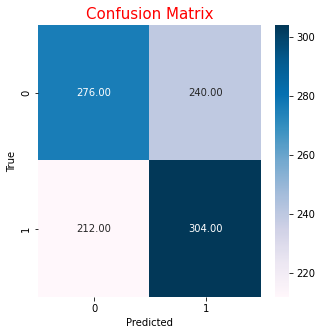

AUC: 0.5821878192416321


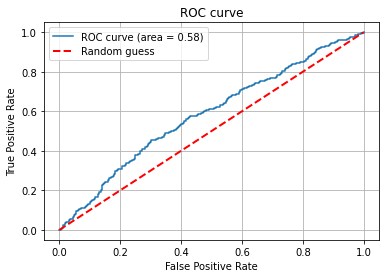

Step:  3
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          0   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          0   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          0   

      log odd score  
0         -9.524916  
1         11.056305  


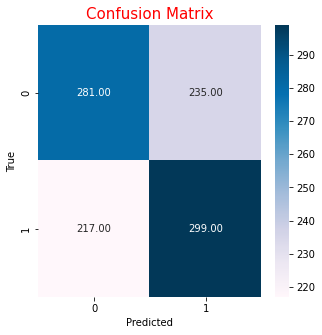

AUC: 0.5895266209963343


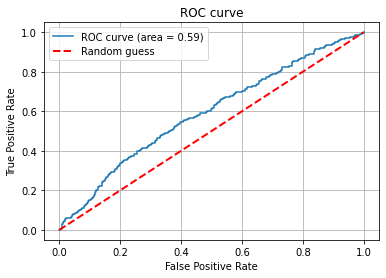

Step:  4
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          0   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          0   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          0   

      log odd score  
0        -11.994963  
1         13.875656  


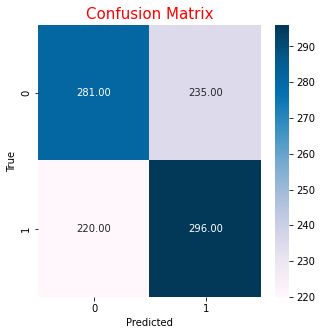

AUC: 0.5981048314404183


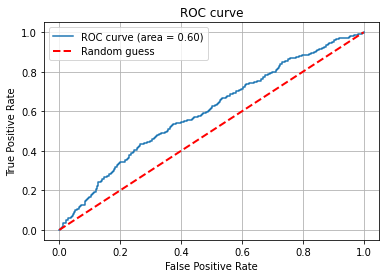

Step:  5
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          0   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          0   

      log odd score  
0        -13.904047  
1         17.183658  


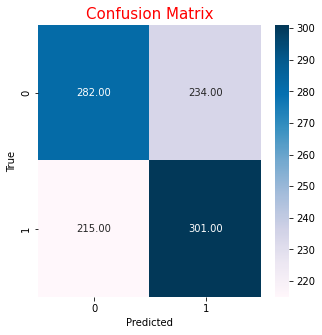

AUC: 0.6022812631452437


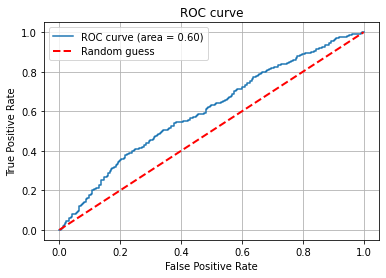

Step:  6
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          0   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          0   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          0   

      log odd score  
0        -15.894886  
1         18.329635  


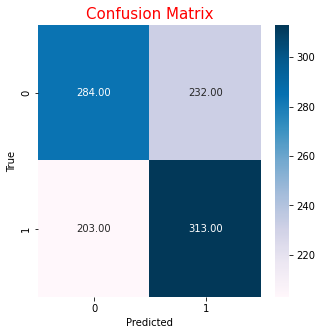

AUC: 0.6027582477014602


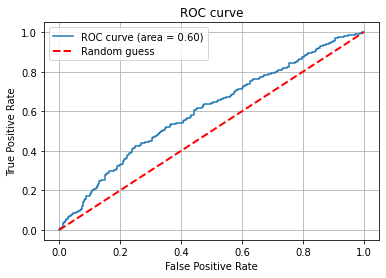

Step:  7
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          1   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          1   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0        -22.634845  
1         18.242755  


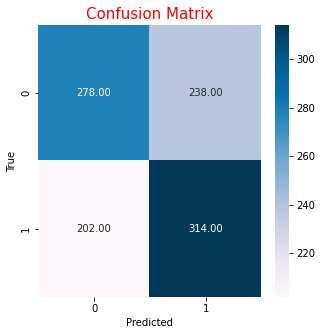

AUC: 0.5986794663782224


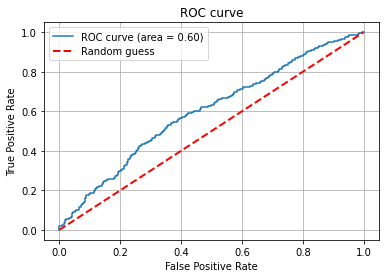

Step:  8
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          1   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          1   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          1   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0        -26.204222  
1         51.508680  


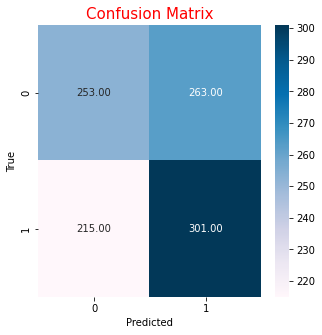

AUC: 0.5586465657111952


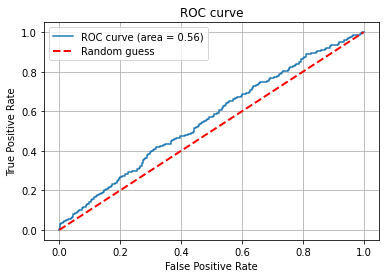

Step:  9
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          1   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          1   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          0   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          0   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          1   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0         31.981330  
1         54.620040  


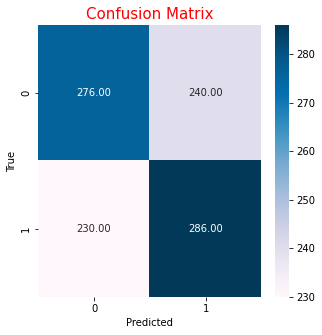

AUC: 0.5754987681028785


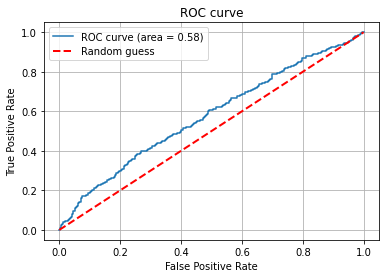

Step:  10
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          1   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          1   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          0   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          0   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          1   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0          0.870173  
1         28.864922  

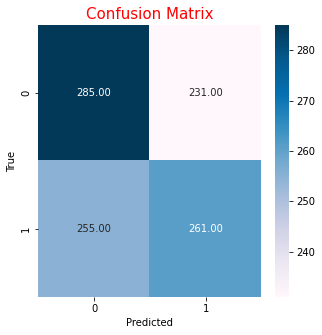

AUC: 0.5536720299260862


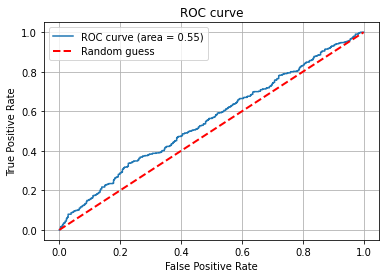

Step:  11
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          0   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          0   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          0   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          1   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0         -6.878837  
1         19.148666  

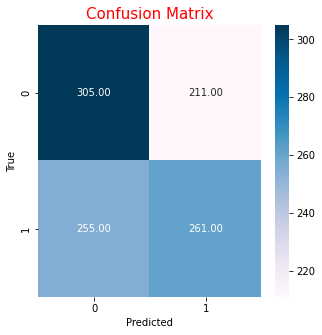

AUC: 0.5541546481581636


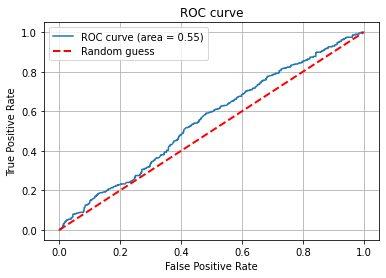

Step:  12
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          1   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          0   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          1   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0         24.451971  
1         13.845362  

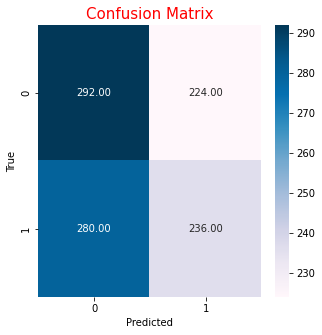

AUC: 0.5285214229914068


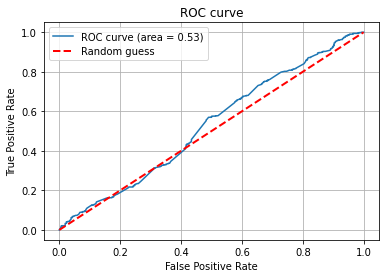

Step:  13
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          1   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          1   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          0   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          0   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          0   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          0   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          1   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0         28.378907  
1          4.615121  

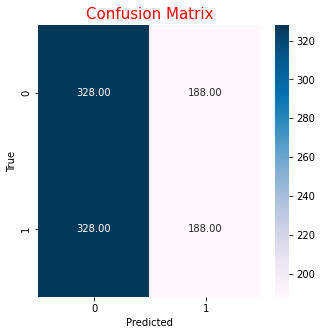

AUC: 0.5192202241451837


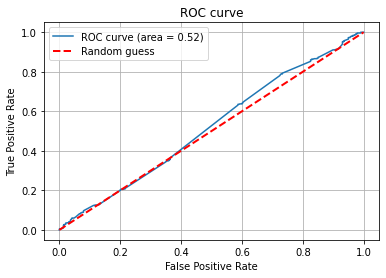

Step:  14
                                                    seq  Bound  predicted  \
0     TAGGTTTATATATTAAAAAATTTTTGTGTTTTAGTTAAAACTAAAA...      0          1   
1     GTTCACCATCCAGAGCTGCAACATTCCCATCCTGCTGGTGGGCAAG...      0          0   
2     CAATTGCTGCGGGCAATTAACAATATCTATATATATATATACGATA...      1          1   
3     TCAAAGCTGATCATAACTAAATGCACGTTGAAAATTAGTCAACTCA...      0          0   
4     CCACAGTTGGTGGCGCAGGAGATTTAGTAGTAGATTTCTTTACCGT...      1          0   
...                                                 ...    ...        ...   
1027  GCGGCCATCGCCGTCAAGCTGCGCGTTATCCTTTGTGTAATTTCTG...      1          0   
1028  CGGATATATGTGGCTCGCTCCGCTATCACTCCGATCGAAATACATA...      0          1   
1029  GCATTAACAGACTGTTGGCCACTGTTGCCAATTGGTGTTAATAAAA...      0          0   
1030  ATTAAGCTAACCATTCCCAAGCCTTCCACCACCAACGCTGCAATCA...      1          0   
1031  TAGCTCTCGTTTTCTGTTTTCCTTTCATGGTTTTTCGTATTATTCA...      0          1   

      log odd score  
0         18.460482  
1          0.000000  

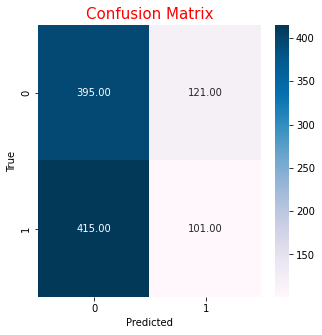

AUC: 0.49673810167658194


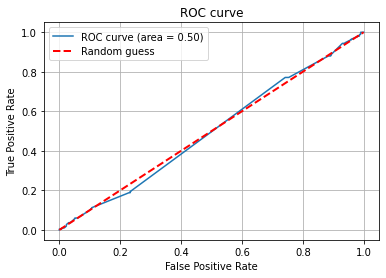

Step:  2
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          0   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          1   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          0   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         -1.661788  
1          0.455751  


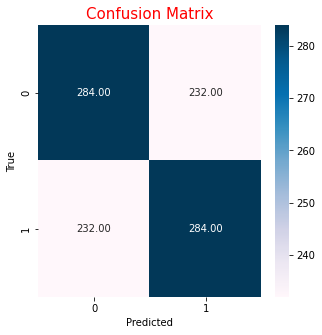

AUC: 0.5649750615948561


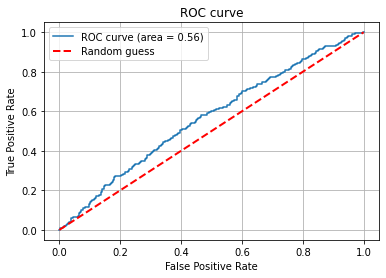

Step:  3
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          0   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         -2.003471  
1         -0.070575  


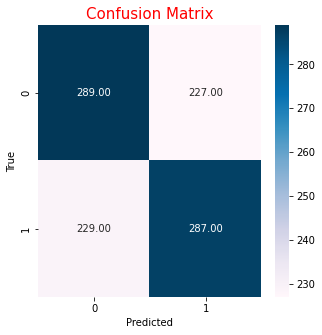

AUC: 0.5746537167237546


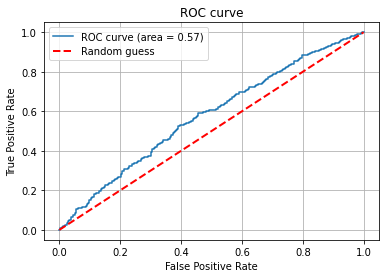

Step:  4
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          0   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          0   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         -2.176429  
1         -1.161800  


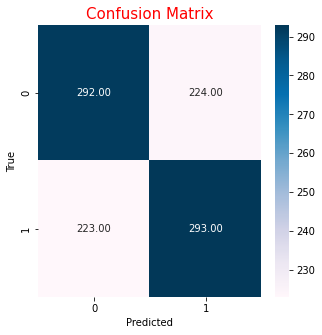

AUC: 0.5842685235262304


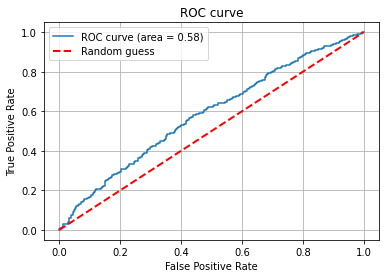

Step:  5
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          0   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         -1.262509  
1         -3.300283  


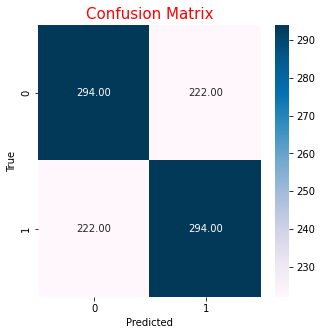

AUC: 0.5869839552911484


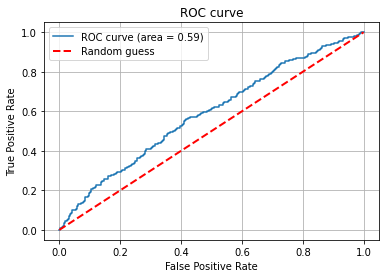

Step:  6
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0          3.573188  
1         -3.210093  


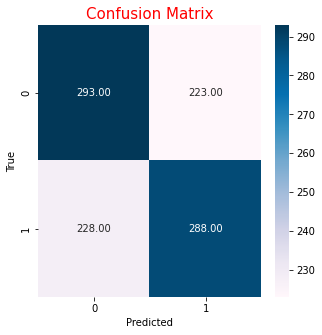

AUC: 0.5889407187068085


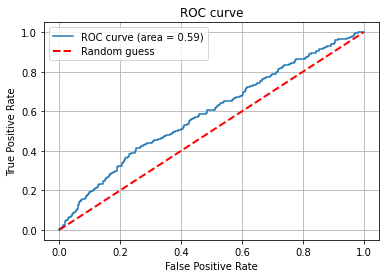

Step:  7
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         10.599890  
1         -6.203534  


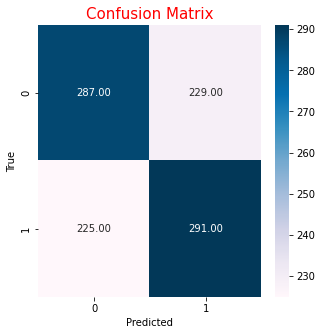

AUC: 0.584798089057148


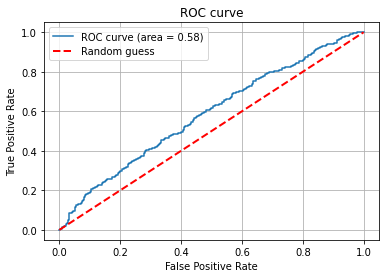

Step:  8
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          1   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          0   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          1   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          1   

      log odd score  
0         60.871764  
1         18.833302  


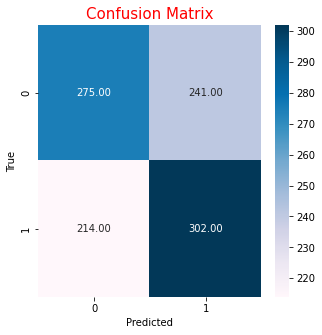

AUC: 0.5712397091520942


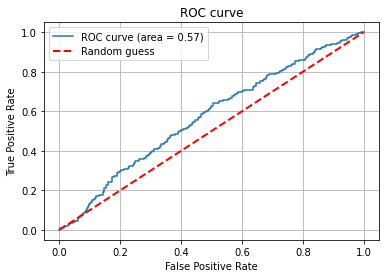

Step:  9
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          0   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          1   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         69.241854  
1         -2.870406  


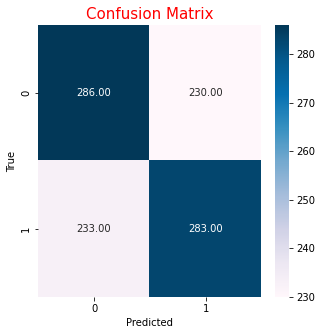

AUC: 0.5595103960098552


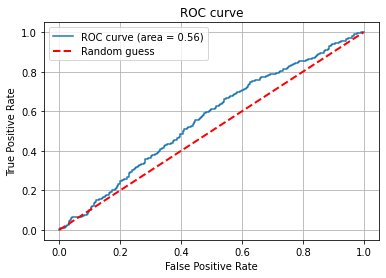

Step:  10
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          0   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          0   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          0   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          1   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         66.405597  
1         -7.339920  

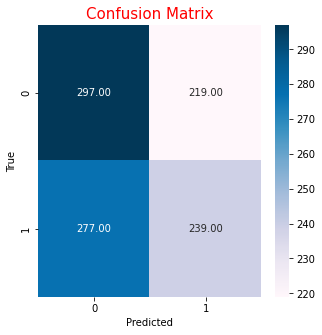

AUC: 0.5366771077459287


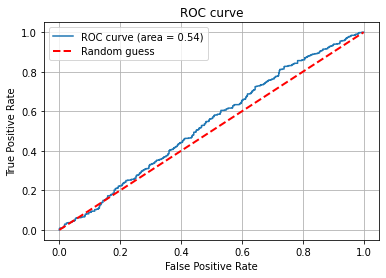

Step:  11
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          1   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          1   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          0   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          1   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         90.923569  
1        -15.356147  

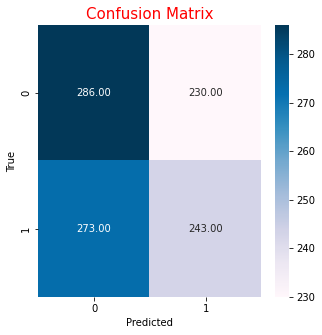

AUC: 0.5294171774532781


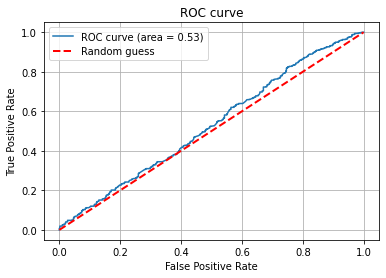

Step:  12
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          0   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          0   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          1   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          0   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0      6.785044e+01  
1     -8.542057e+00  

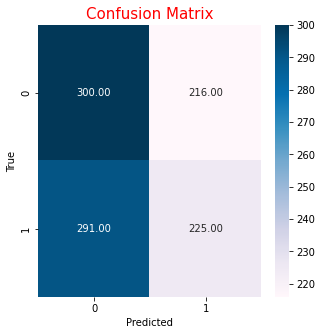

AUC: 0.5266792109849168


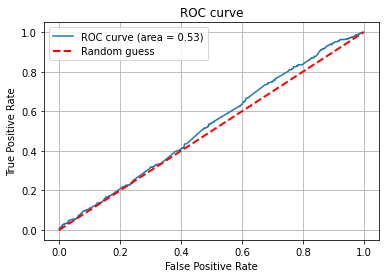

Step:  13
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          1   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          1   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          0   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          1   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          0   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          1   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         59.308382  
1          1.091990  

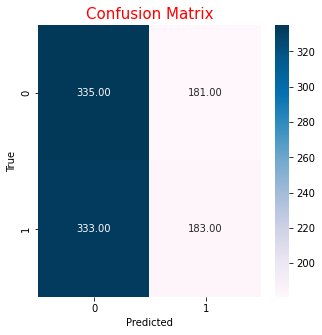

AUC: 0.5200709092001683


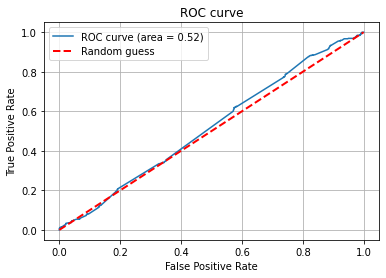

Step:  14
                                                    seq  Bound  predicted  \
0     TTTAATTAATATGGAACAGAGACAAGGCTATGGTCTTCGCATATTA...      0          1   
1     ATATCTTCTTAACCAGTGTTACGTATTCAATTTTTTTTTTCTTTTT...      1          1   
2     CCAATTGTGTACCATCAGCTTTTGCACAGCCAGCAGGGCTTCGTAT...      1          0   
3     ATAATCCTCTGCCGGTTCCGGACAACGATGTGATCAAGATGTCGCA...      0          0   
4     AGATCATTTGGAAAATTACACAAAACCGCGCTCTGGACTGGACTGA...      1          0   
...                                                 ...    ...        ...   
1027  GTTTGGCATTTGTTCGAATCACTTGCCATTCAATGGTGATTTTCAC...      1          1   
1028  AAACGTGGGCACGCAATGCATTGGGACACTGGTATGGGCGAGTCTT...      0          0   
1029  TCACAATTGATTAATAGAGATAACAAAAAAATCGACTTAAGTAAAG...      1          0   
1030  CCTTTTGGAACCCTCAAGACGAGATTAAACACATGCGAATTATCAA...      1          0   
1031  CTTTCTTCAGAGTATACCTTTGCATAAAAATATATTATGTATAAAT...      0          0   

      log odd score  
0         50.766326  
1          9.918425  

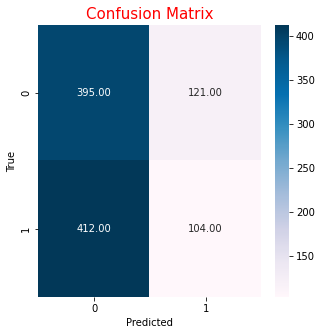

AUC: 0.5038365332612222


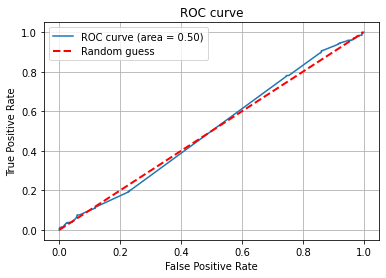

Step:  2
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          1   

      log odd score  
0          0.664800  
1          0.314511  


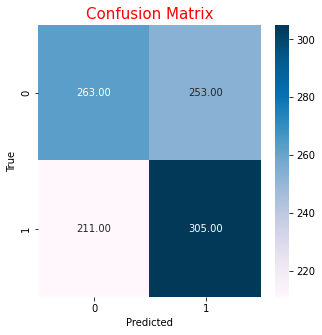

AUC: 0.5532682831560604


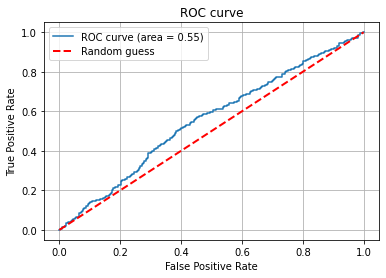

Step:  3
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          1   

      log odd score  
0          1.272622  
1          1.169404  


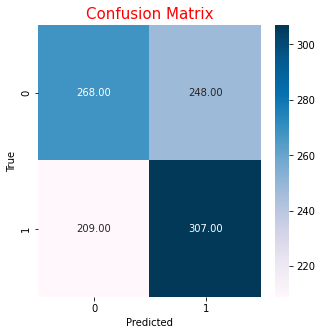

AUC: 0.561981701820804


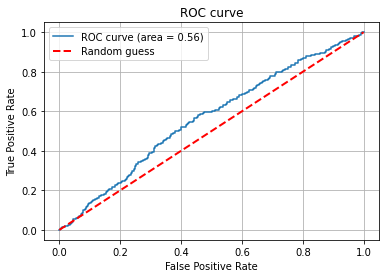

Step:  4
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          1   

      log odd score  
0          1.837878  
1          2.310296  


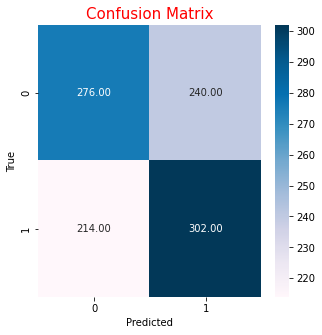

AUC: 0.572137341505919


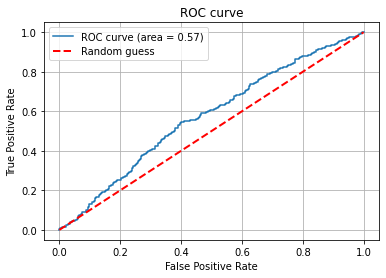

Step:  5
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          0   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          1   

      log odd score  
0          1.146334  
1          2.675886  


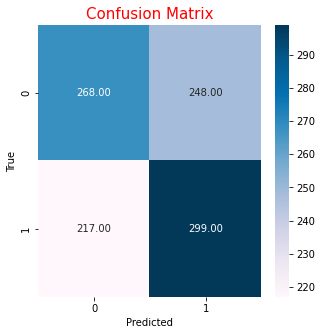

AUC: 0.5805878552971576


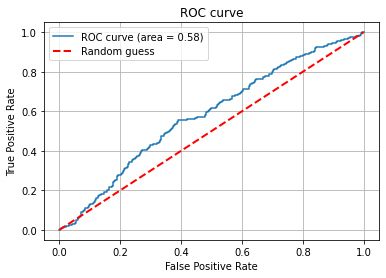

Step:  6
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          1   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          0   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          1   

      log odd score  
0          2.787522  
1          1.493461  


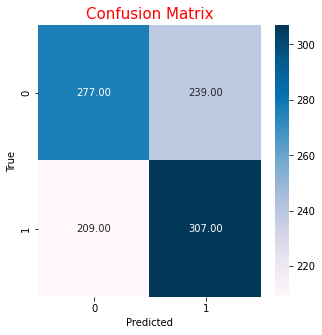

AUC: 0.5876975542335197


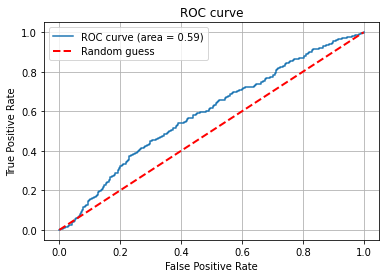

Step:  7
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          0   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          1   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          1   

      log odd score  
0         15.434912  
1         -1.770945  


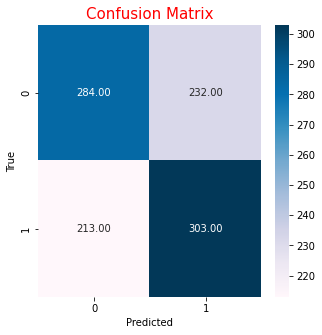

AUC: 0.5805089838351061


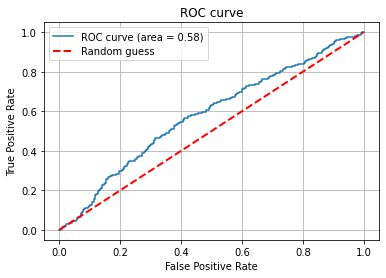

Step:  8
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          0   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          1   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          1   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0         77.029037  
1        -19.442934  


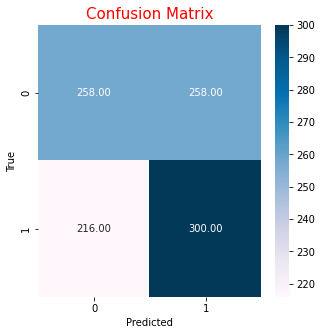

AUC: 0.5576174809206178


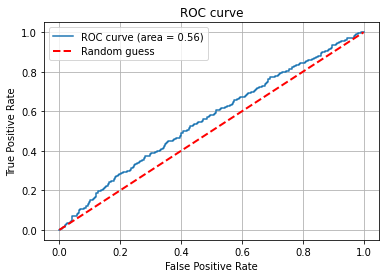

Step:  9
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          1   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          0   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          1   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0         28.702854  
1          4.772732  


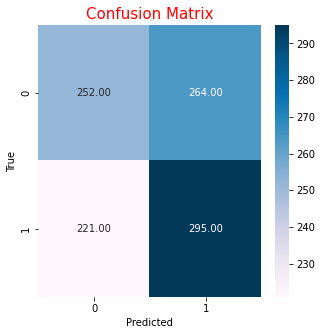

AUC: 0.551844841055225


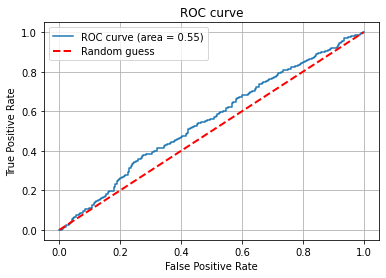

Step:  10
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          1   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          0   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0          6.682146  
1          9.152976  

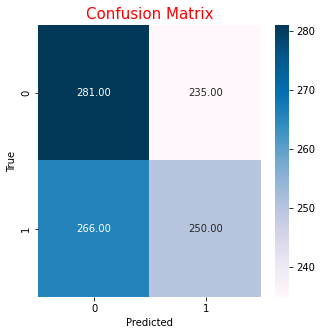

AUC: 0.5209046932275705


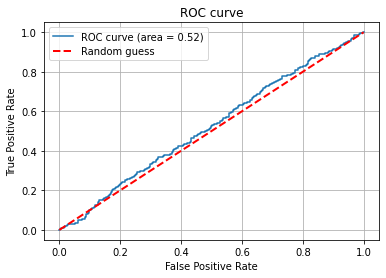

Step:  11
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          1   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          1   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          0   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0         28.378907  
1          5.991489  

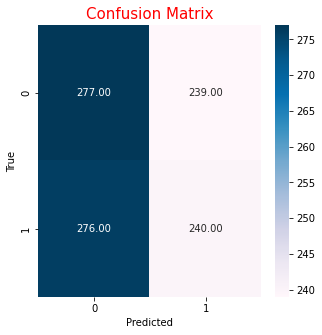

AUC: 0.5154681960218737


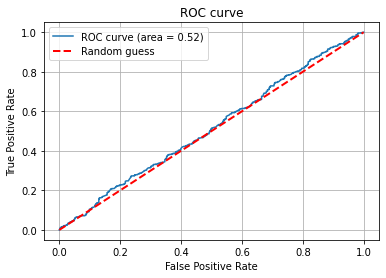

Step:  12
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          0   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          1   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0         23.075603  
1        -13.845362  

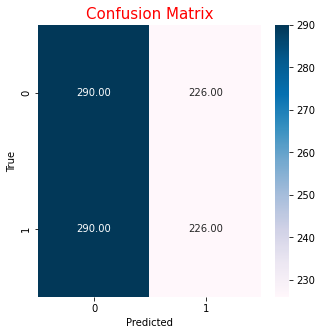

AUC: 0.5045557658794544


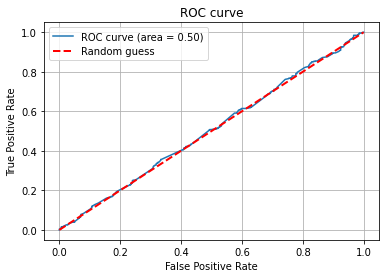

Step:  13
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          0   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          1   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          1   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0         13.845362  
1         -4.615121  

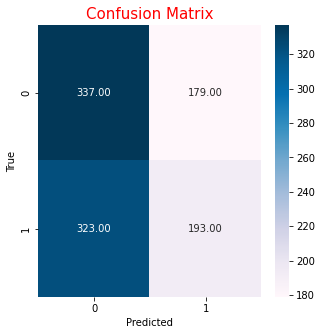

AUC: 0.5055416591550989


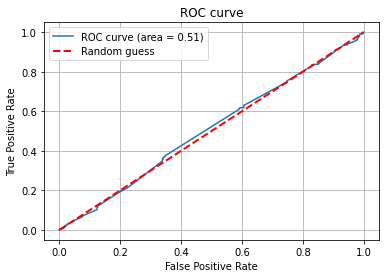

Step:  14
                                                    seq  Bound  predicted  \
0     ATGTGGACAGGGATATCCCGGGAAAGAGAAAACCGAAGATTACTCA...      0          1   
1     TTTTTTGTTGCCAACTTTGGTCTAAACCAGCGACTCTGAATCGCTG...      1          0   
2     CGCGACGAACGGTATCACCGTAGTGGTCAAAAAAATCAAGTTTCCT...      0          0   
3     CCGCATCAGTCAGTTTCGTAAGGTCTGCGTAGTTTACTATAGAATT...      1          0   
4     TGGCCAAATTAGTTAATGAGGACCTTTGGAAAAGGAAAAAACAAAG...      0          0   
...                                                 ...    ...        ...   
1027  CCAATCTTCCTTTATAAAAAAGGGATATTAAAGTAAAAACAGGCAA...      1          0   
1028  ACTTTCTTCAATGGCCGGAAAGAATTGCAAGCCAAGTTTGTTTTAT...      1          1   
1029  GAGTTCCTCCACCACACGCTTCATCACCGCACGAACGGATCGTGGT...      1          0   
1030  AACAAAAAACAAAAACAATAAATAAATAAGCAACGTCGTATTACTC...      0          0   
1031  CGGCCGCAGACTCTGACAAATCATTAGTATTGGGTTCGGCGGCATT...      0          0   

      log odd score  
0          4.615121  
1          0.000000  

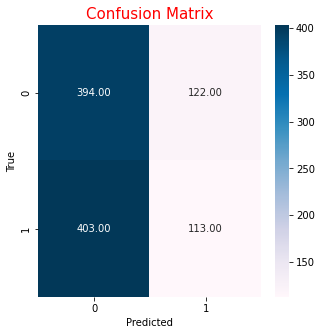

AUC: 0.49939344089898446


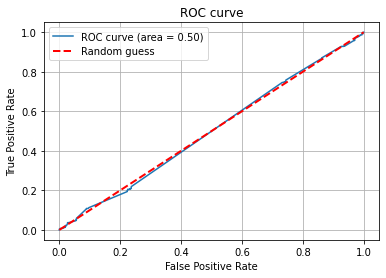

Step:  2
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0         -0.797721  
1          7.089978  


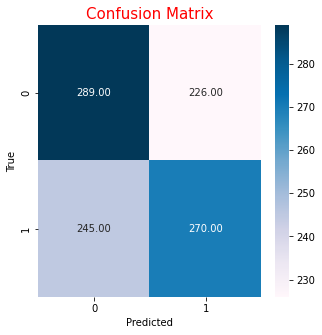

AUC: 0.5589329814308607


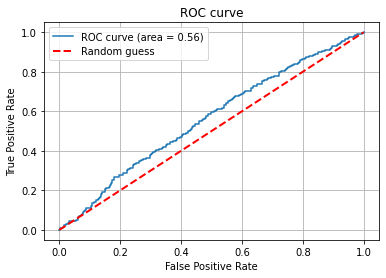

Step:  3
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0         -1.274108  
1          8.711890  


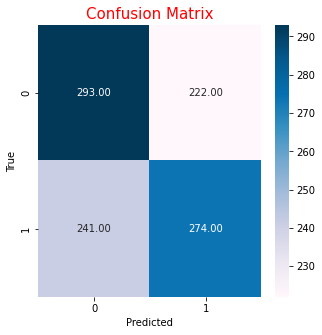

AUC: 0.5714845885568857


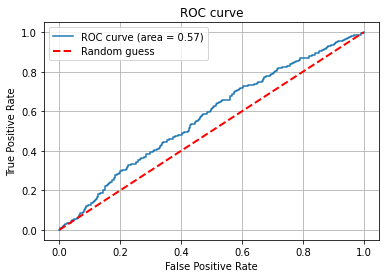

Step:  4
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0         -2.917501  
1         10.374824  


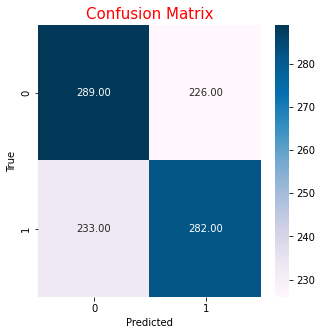

AUC: 0.584982561975681


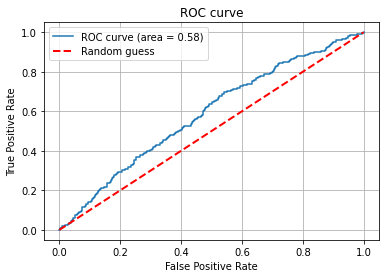

Step:  5
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          1   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0         -3.764955  
1         10.613237  


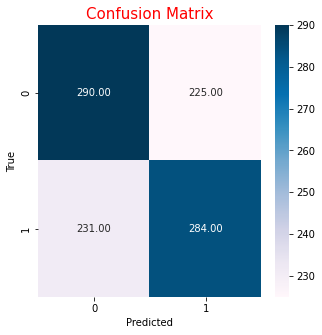

AUC: 0.5910114054105005


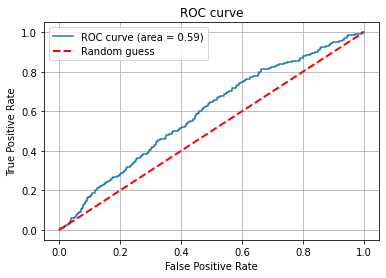

Step:  6
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0         -7.754656  
1          8.284561  


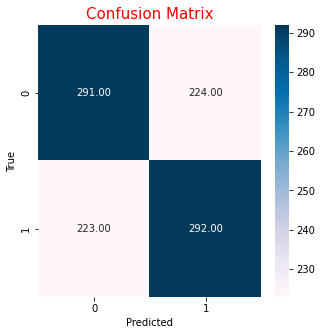

AUC: 0.5969686115562259


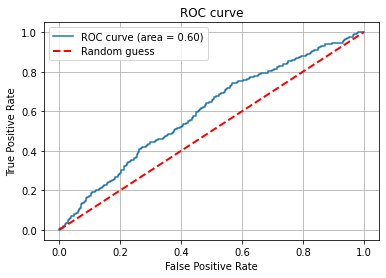

Step:  7
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          1   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          1   

      log odd score  
0        -17.821164  
1          7.054395  


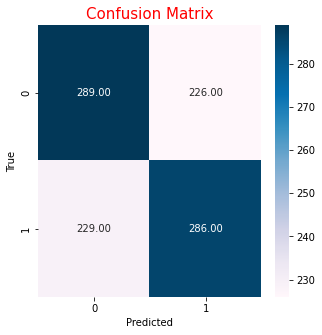

AUC: 0.5857177867848053


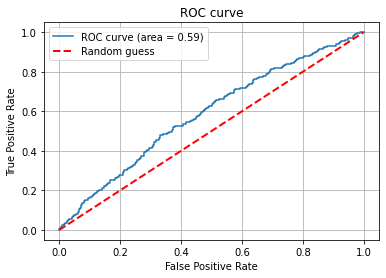

Step:  8
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          0   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          1   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          1   

      log odd score  
0        -34.227731  
1        -10.127580  


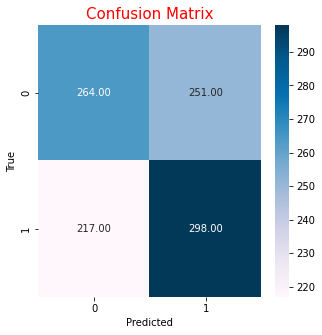

AUC: 0.5671222546894147


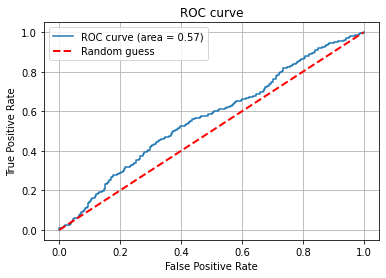

Step:  9
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          0   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          1   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          1   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          1   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          1   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          1   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0        -51.234708  
1        -73.293899  


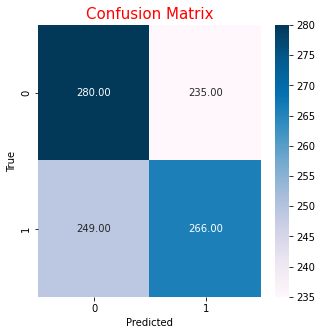

AUC: 0.5563201055707419


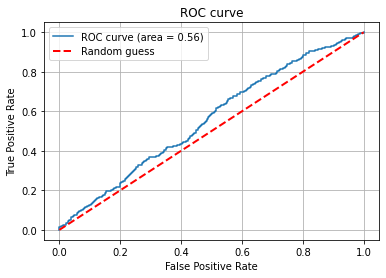

Step:  10
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          0   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          0   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          0   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          1   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          1   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0        -52.180452  
1        -28.456172  

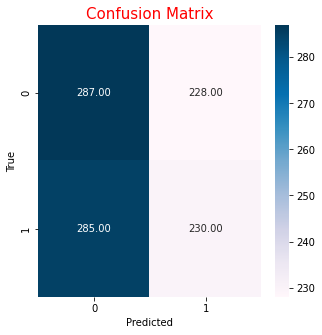

AUC: 0.5299462720331793


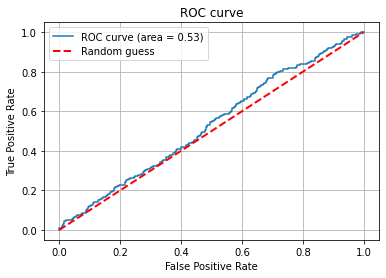

Step:  11
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          0   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          1   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          1   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          1   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0        -52.668398  
1          7.083479  

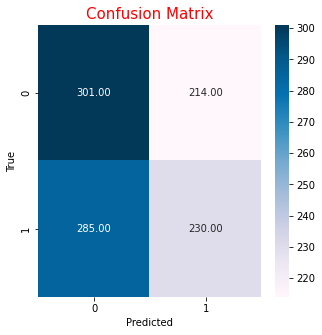

AUC: 0.5231067961165048


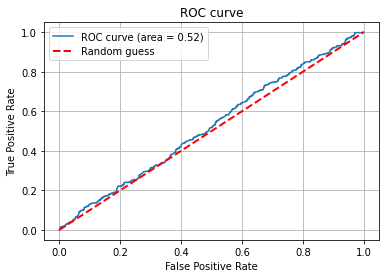

Step:  12
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          0   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          1   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          1   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0        -51.170131  
1          9.918425  

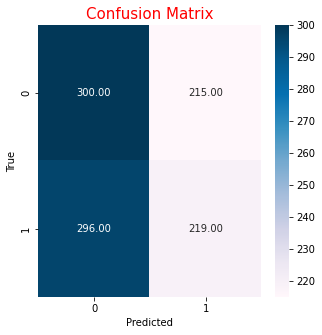

AUC: 0.5159920821943632


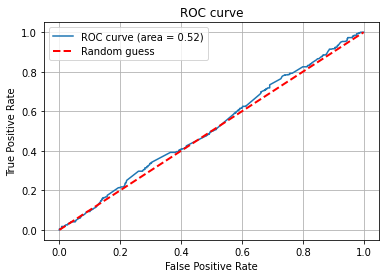

Step:  13
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          0   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          1   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          1   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          0   

      log odd score  
0        -32.305844  
1          9.230241  

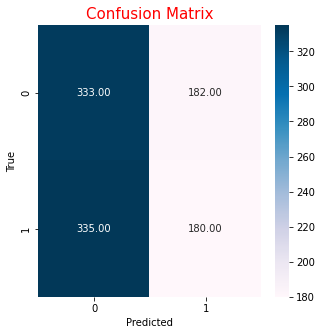

AUC: 0.4959279856725422


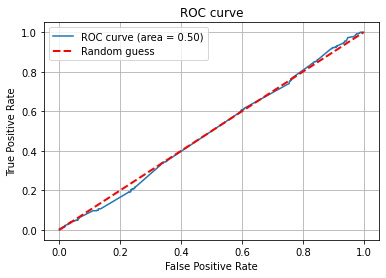

Step:  14
                                                    seq  Bound  predicted  \
0     ATTGCTGTTTTTGTTGCTGTGTCGTCGTTTTTGTTATTGCTATAGT...      0          0   
1     GTCCACCAACAGACGCCCAGTCAGCAGGAGCCGGCAAGGAGTTCGC...      1          1   
2     GGGATTGGGAATGGGGGATTGGCACCAAAGAGCGGCCAGCTTCAAT...      1          0   
3     CAGGAGACTCATCGAGTAATTTTCTTCAAAGAGCCTAGATACGAAT...      1          0   
4     GATATATAAACTATAACAAAAATGACTTAATTATTAAACAATTATA...      0          1   
...                                                 ...    ...        ...   
1025  ATCTTTCGAACCTCTGCTTAAGACGTACTAGTTTAATTATTTATTA...      0          0   
1026  ATCGGTTGTTGTTGCACAGAAATTGCGTTTTTCGACAAGAAACTTG...      0          0   
1027  TATTTCCAGGTTCTCCATCAGGCCTACAAATCCATCAACTTCTGTT...      1          0   
1028  CATACACTTAAACTGAAGTCTCTAAATACCTTGTAGTGCATTGCTA...      0          0   
1029  GCACTCATTATGTCGCACTTGTCCGTCAAAGTTGCAGCTAATTTTC...      1          1   

      log odd score  
0        -13.845362  
1          4.615121  

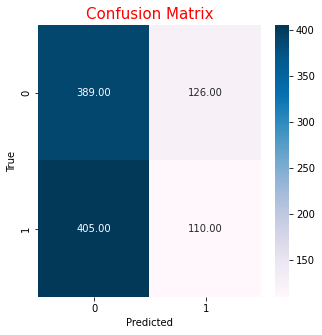

AUC: 0.48777641625035356


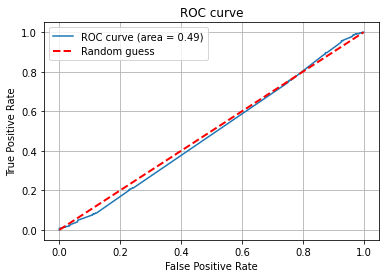

Step:  2
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          0   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          1   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         -0.623637  
1          0.414443  


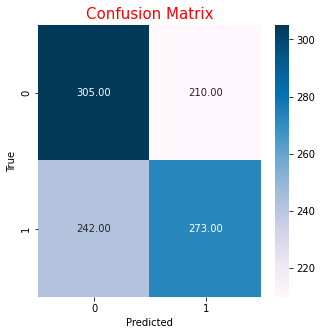

AUC: 0.5837006315392591


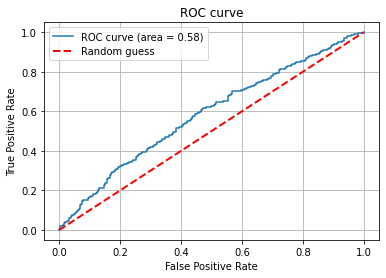

Step:  3
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          0   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          1   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         -0.841519  
1          0.153147  


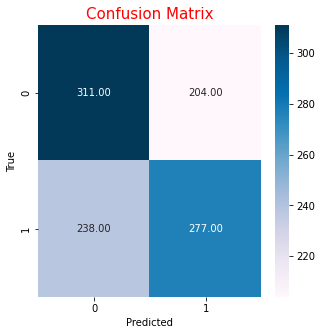

AUC: 0.5965387878216608


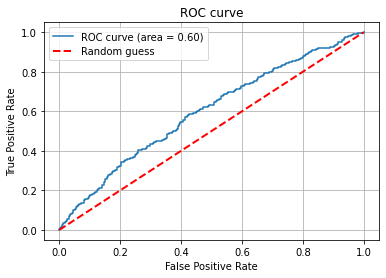

Step:  4
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          1   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          1   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         -0.481016  
1          0.130559  


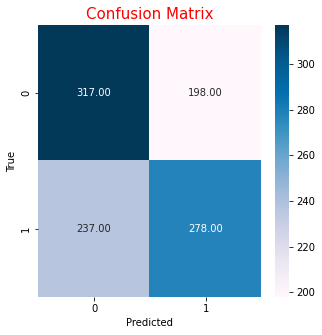

AUC: 0.6114468847205203


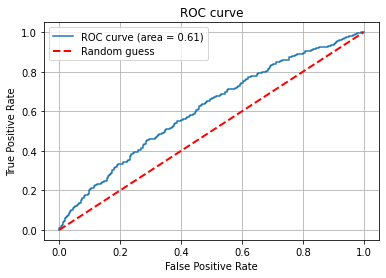

Step:  5
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          0   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          1   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          1   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         -0.729329  
1         -1.434917  


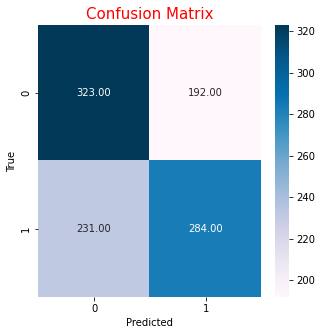

AUC: 0.6204618719954755


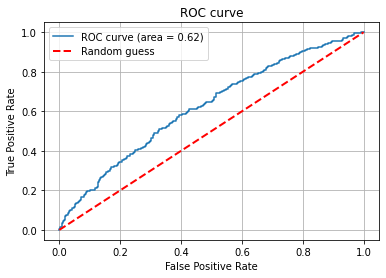

Step:  6
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          1   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         -1.589326  
1          0.737657  


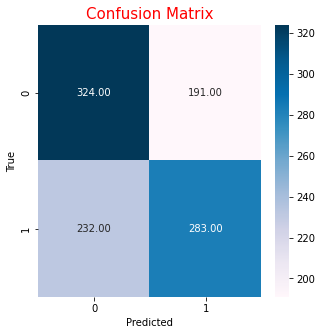

AUC: 0.6267810349703082


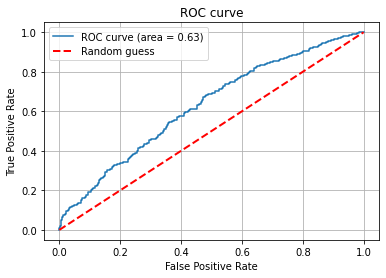

Step:  7
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          1   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          1   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          1   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         10.709195  
1         11.910600  


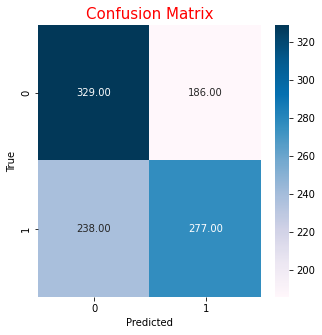

AUC: 0.6210387406918654


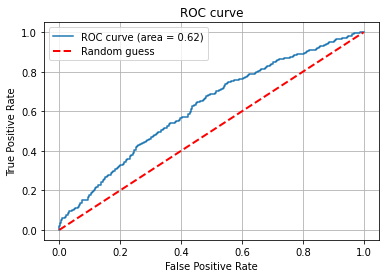

Step:  8
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          1   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          1   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0        -10.339302  
1         44.865403  


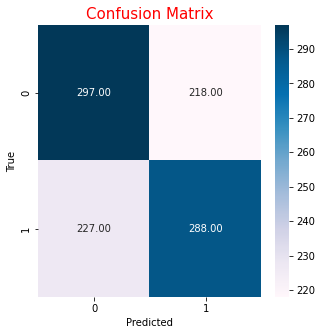

AUC: 0.592791026486945


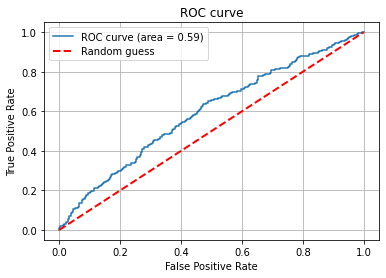

Step:  9
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          1   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          1   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          0   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         24.561858  
1         25.992758  


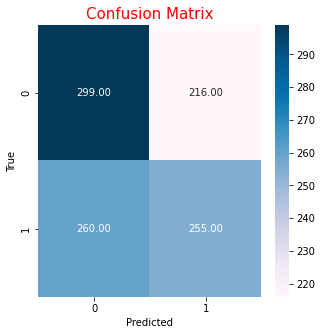

AUC: 0.5647054387783956


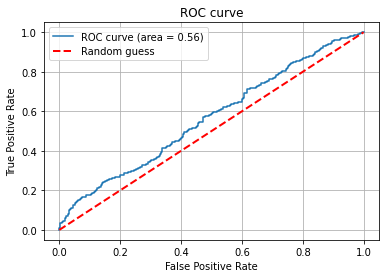

Step:  10
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          0   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          0   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0         -0.321597  
1         19.065923  

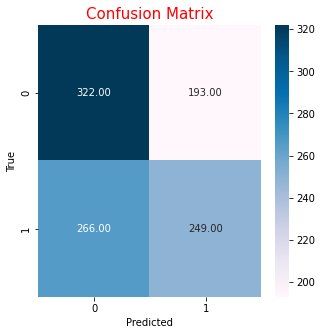

AUC: 0.5661985106984635


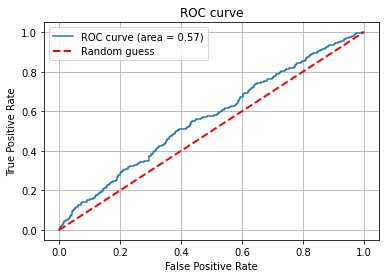

Step:  11
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          1   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          0   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          1   

      log odd score  
0        -30.443461  
1          9.918425  

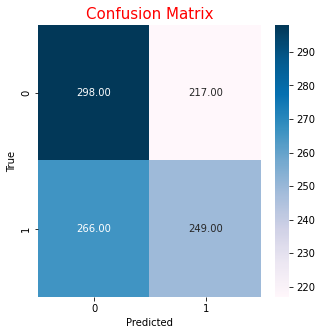

AUC: 0.5509605052314073


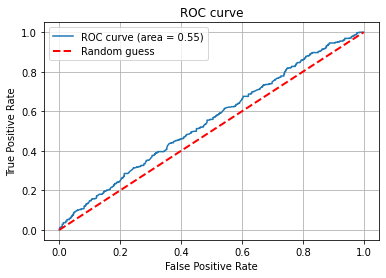

Step:  12
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          1   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          0   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          0   

      log odd score  
0        -19.148666  
1         18.460482  

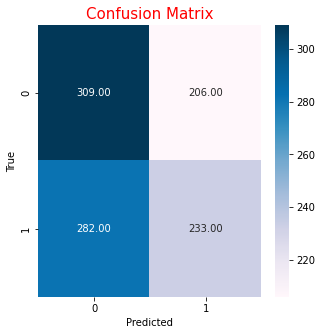

AUC: 0.5411669337355076


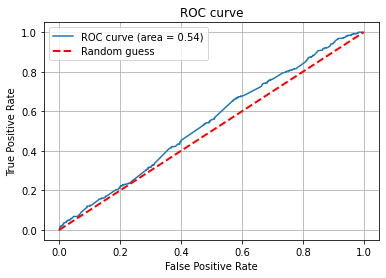

Step:  13
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          1   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          1   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          0   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          0   

      log odd score  
0         -4.615121  
1          4.615121  

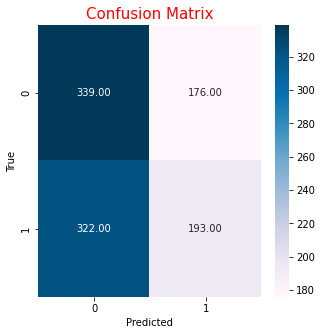

AUC: 0.5378489961353566


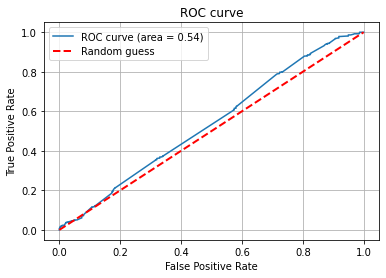

Step:  14
                                                    seq  Bound  predicted  \
0     CTTCCTTTGCCGCAAATTTAAACGAAGTTTCTGAATTCCCCAGCCT...      1          0   
1     CATTCTATTAGTGGAAAACATTGAGGAAACCAATTACCAAACCGCA...      1          1   
2     ATACATAACAAACCTCAAGGGCACGATTTAGAGTGGTCGGGGAGAT...      0          0   
3     CGGAACAAATTTTGCATAATTCGGGTCATAAAAATGAGTCCAAAGG...      1          0   
4     GATGTTTGGGTGCCAATGCCGGCGGCGTTGCAACTTTGCGCCGGAC...      1          0   
...                                                 ...    ...        ...   
1025  TGAGAAGAGCAAATAGTGTCTGCCAAAAACAGGAGAAGAAAAGTTG...      1          0   
1026  TGATCTGCGCGAGGGCCTGCAACAAACACGTCTCGCTATCTCAGCT...      1          0   
1027  TTTCAAGGACTTCACACATTCGTCTGGGAAGTGAATCATATTTTTT...      1          0   
1028  TGACTACATCATCCGTACACAGCCTACTGAAGGATGCCTTAGCACA...      0          0   
1029  ACGGCTGAGGACTCCTGGGCCCTCTTCACGTTCTTCGTGGACAGTT...      0          0   

      log odd score  
0          0.000000  
1          4.615121  

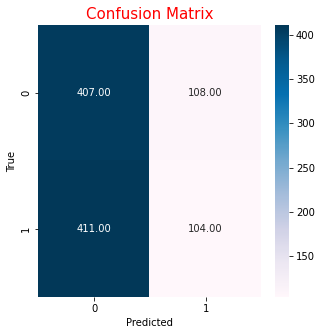

AUC: 0.5338844377415402


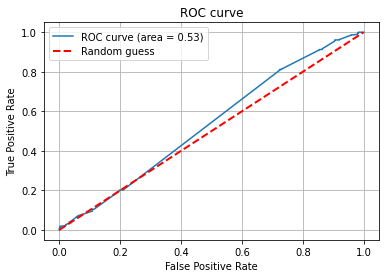

Step:  2
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0         -6.524041  
1         -1.631749  


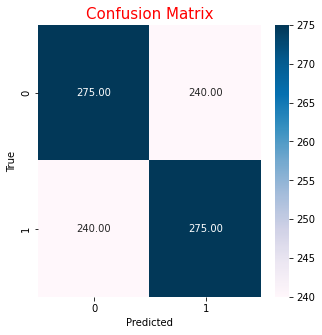

AUC: 0.5723140729569234


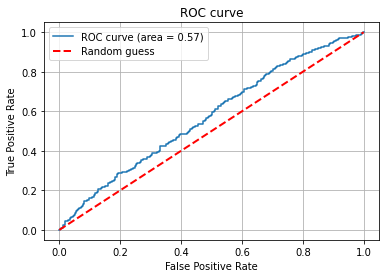

Step:  3
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0         -9.571465  
1         -1.780923  


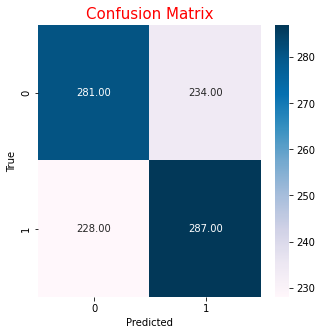

AUC: 0.5801187670845508


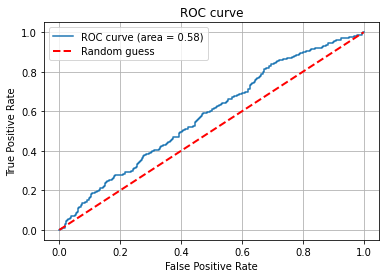

Step:  4
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -13.032907  
1         -1.483483  


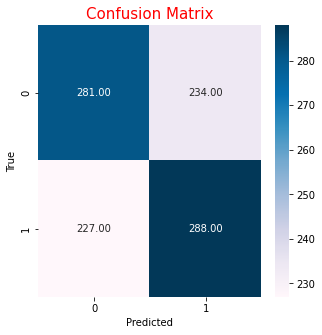

AUC: 0.5842096333301914


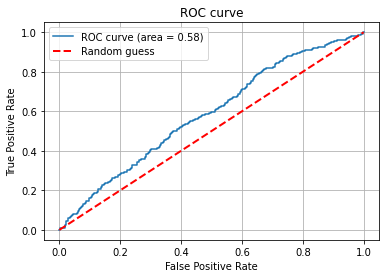

Step:  5
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -14.634962  
1         -1.328027  


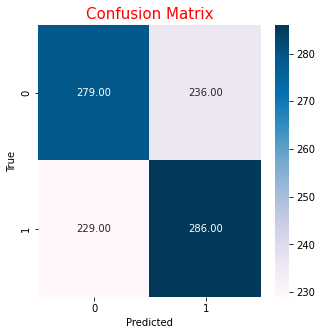

AUC: 0.5874220001885192


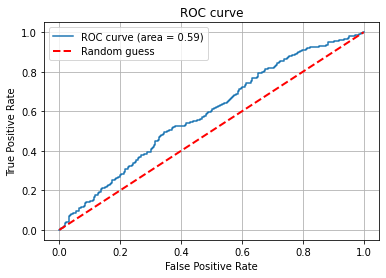

Step:  6
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          1   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -14.943063  
1         -3.155532  


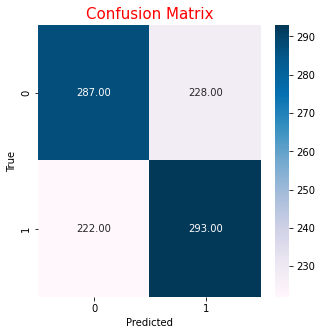

AUC: 0.5919012159487227


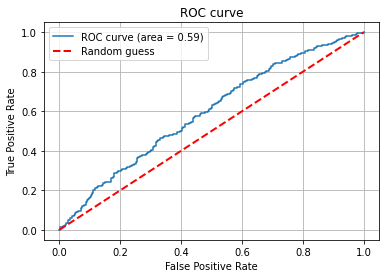

Step:  7
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          1   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          1   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -20.778075  
1         -1.775179  


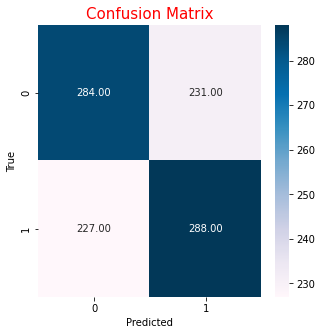

AUC: 0.5796097652936186


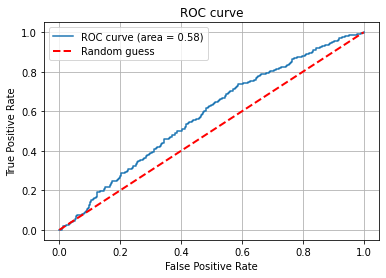

Step:  8
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          1   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          1   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -29.480679  
1         -8.639931  


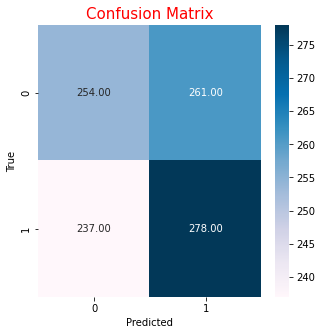

AUC: 0.5276538787821661


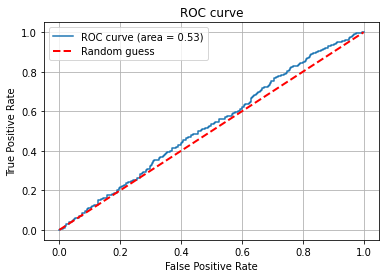

Step:  9
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          1   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          1   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          1   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -58.276614  
1        -39.010952  


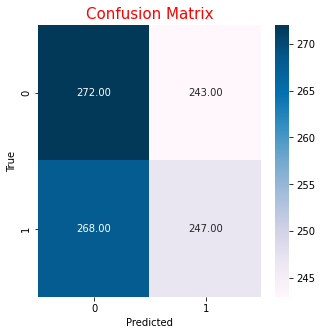

AUC: 0.5198190215854464


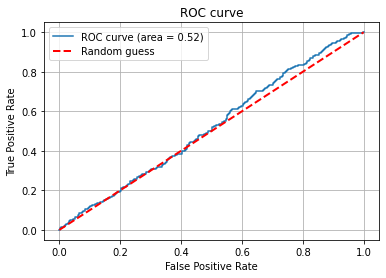

Step:  10
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          1   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          1   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          0   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          1   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          1   

      log odd score  
0        -91.185314  
1         33.454623  

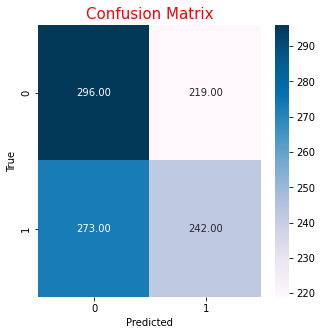

AUC: 0.52763879724762


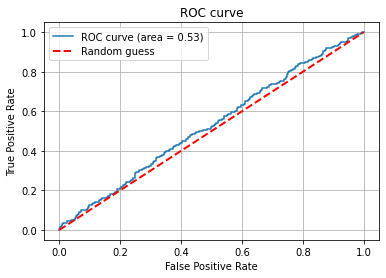

Step:  11
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          1   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          1   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          0   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          0   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          1   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          0   

      log odd score  
0        -32.451224  
1          9.918425  

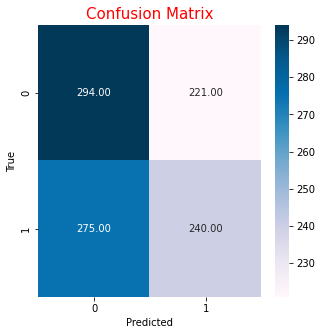

AUC: 0.5191497784899614


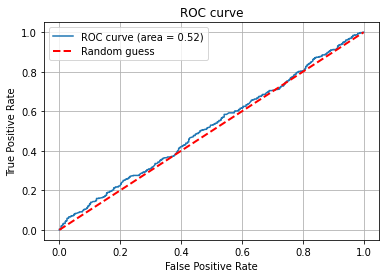

Step:  12
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          1   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          0   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          0   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          1   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          0   

      log odd score  
0     -2.052504e+01  
1     -1.136868e-13  

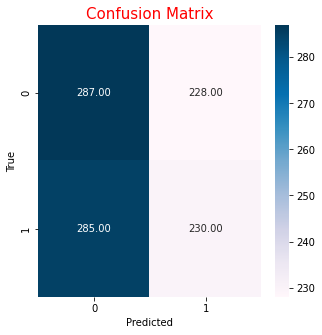

AUC: 0.5198435290790838


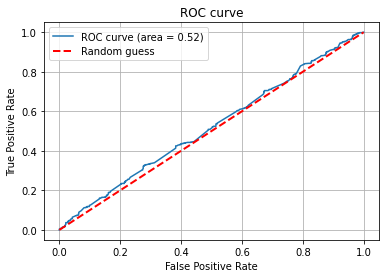

Step:  13
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          0   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          0   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          0   

      log odd score  
0        -18.460482  
1         -4.615121  

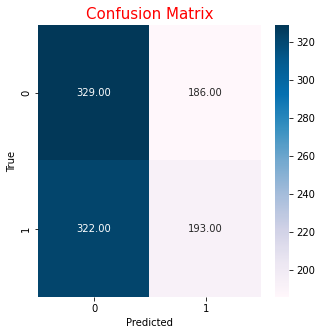

AUC: 0.5061890847393722


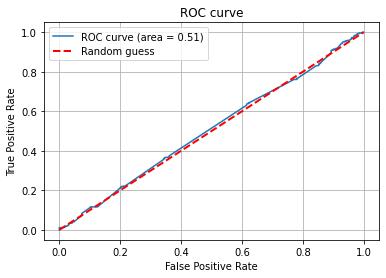

Step:  14
                                                    seq  Bound  predicted  \
0     AATGTTGTTTAATTCATTTTTTTTATTGAAATTCATGTTTTGTATC...      1          0   
1     ATTATGTTCAACTTATCACAAAAAGTTATCGTCTCCGGAGATAATT...      1          0   
2     AAGATTTGGAGTGCCGTAAACGTAGATGTAAACTTTAGCAAGAGAA...      0          0   
3     TAGATGGATGGCTTGGAAGCCTCGGCCTTGGCATCTTCCACATTCT...      1          0   
4     AGACGGCAGCTGGTGGAACAGGATGAGCGGCGTGGAGGAGCAGGCG...      0          0   
...                                                 ...    ...        ...   
1025  CCGGCTTATTTGGTTTTGGCCAGGGCCCACCGTGCGTATACGTAAT...      1          0   
1026  TTTAATTCTATTTATGTATATTGGTCACCCTTCAGCCAAGAAACTA...      1          0   
1027  ATTCAGGCAGATCCCACCCAGTTTCTGCAACTGCATGGCCGGCGAA...      0          1   
1028  GGTTCCTTAATATCATTATATATATCGAATAACTTTTCTGAAACAC...      1          0   
1029  GATCGAGAACGAGAGCCTAAAGCGCCAACTTGGGCGACTGAGTGAT...      0          0   

      log odd score  
0        -13.845362  
1          0.000000  

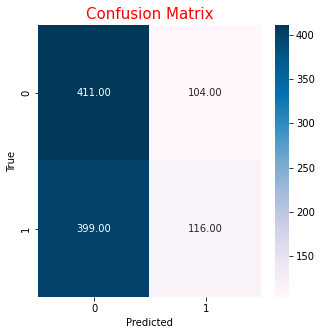

AUC: 0.49979074370817234


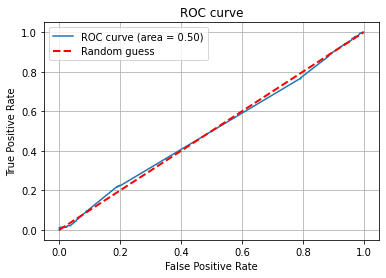

Step:  2
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          1   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          1   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0          3.455668  
1          4.723835  


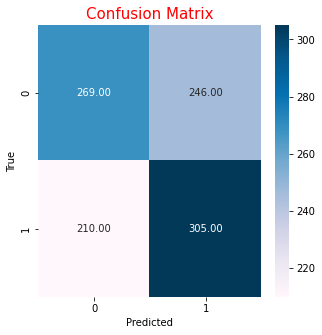

AUC: 0.5839306249410878


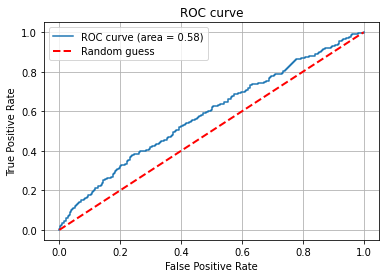

Step:  3
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          1   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          1   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0          3.774646  
1          6.704890  


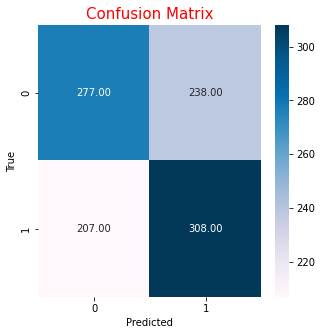

AUC: 0.5966217362616646


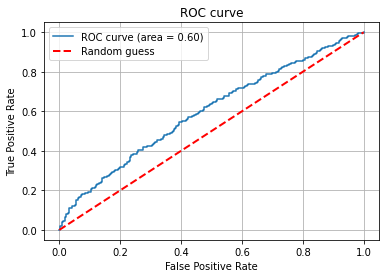

Step:  4
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          1   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          1   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0          5.465583  
1          8.477104  


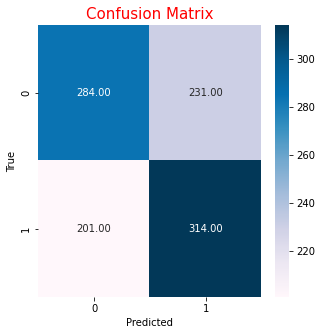

AUC: 0.6044188896220191


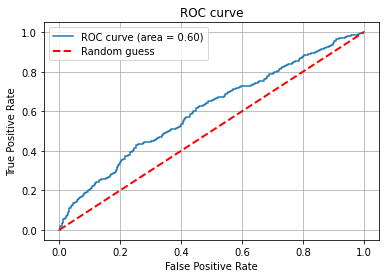

Step:  5
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          1   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          1   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0          6.125473  
1         10.165766  


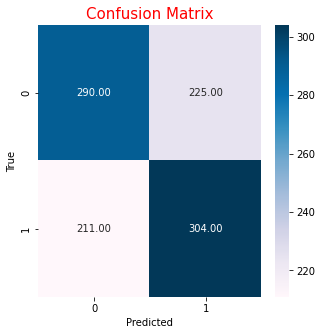

AUC: 0.6122537468187388


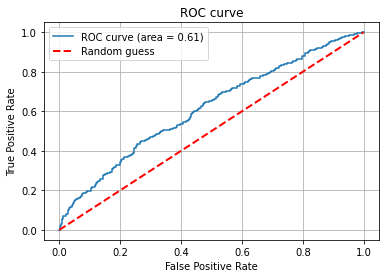

Step:  6
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          1   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          1   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0          7.311664  
1         13.163528  


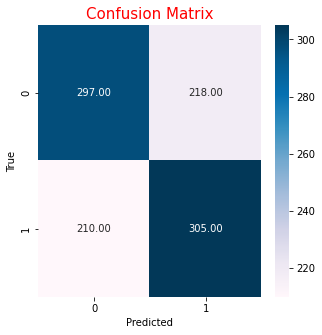

AUC: 0.6238137430483552


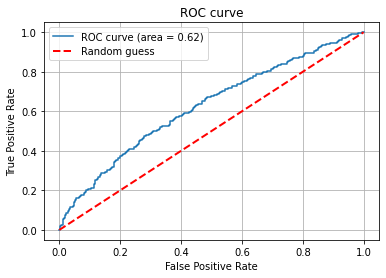

Step:  7
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          1   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          1   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          1   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0          7.178449  
1         14.742002  


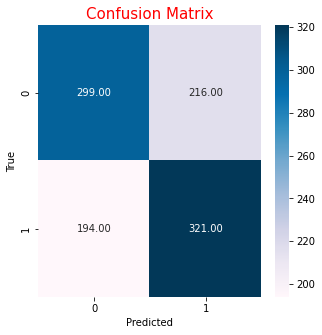

AUC: 0.6301178244886416


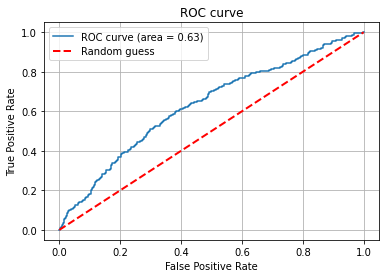

Step:  8
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          1   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          1   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          1   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0        -34.880152  
1         12.470753  


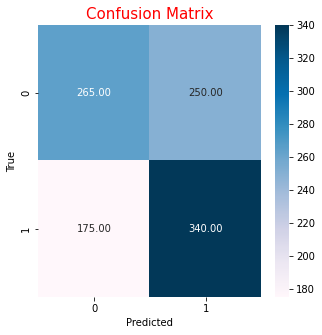

AUC: 0.6084532001131115


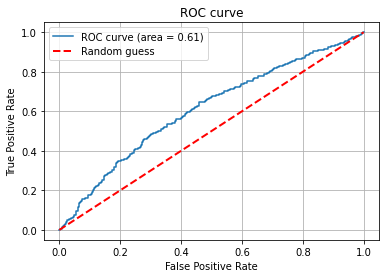

Step:  9
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          0   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          1   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0         -8.902533  
1         27.082810  


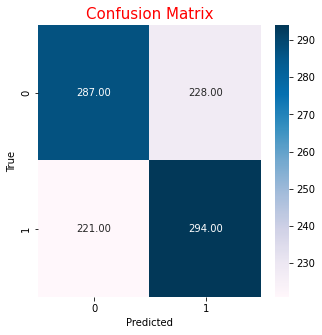

AUC: 0.5811970968046


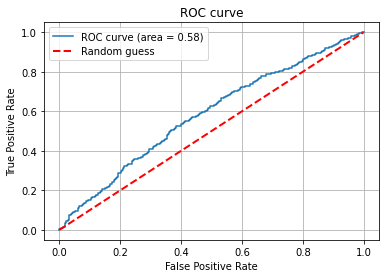

Step:  10
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          1   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          0   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          0   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          1   

      log odd score  
0        -34.086018  
1          8.422630  

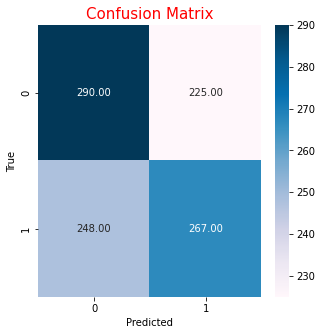

AUC: 0.5600980299745499


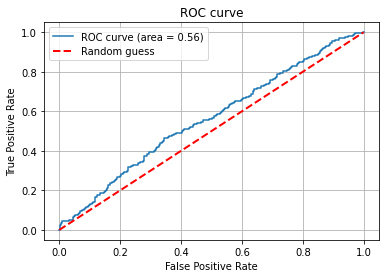

Step:  11
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          0   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          0   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          0   

      log odd score  
0        -37.609149  
1         -5.303305  

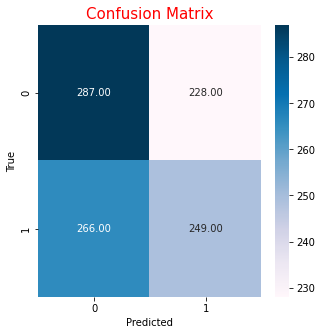

AUC: 0.5441813554529173


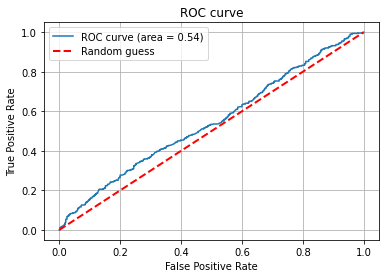

Step:  12
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          0   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          0   

      log odd score  
0        -13.845362  
1          0.000000  

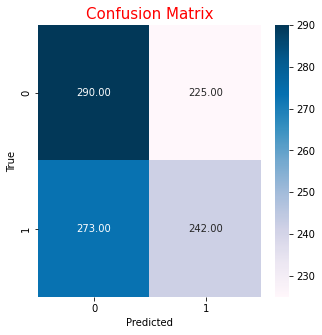

AUC: 0.5385408615326609


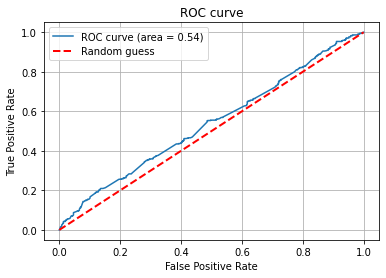

Step:  13
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          0   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          1   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          0   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          1   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          1   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          0   

      log odd score  
0         -4.615121  
1         -4.615121  

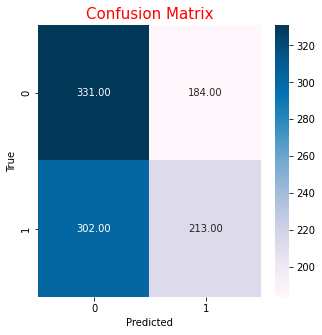

AUC: 0.5327533226505797


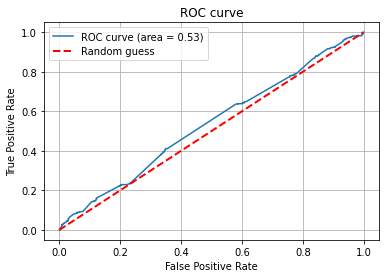

Step:  14
                                                    seq  Bound  predicted  \
0     GCGATTGCCAATGAGTATTCGCGCCTGCGCTCCCAGGAGGCGGTCG...      1          0   
1     CTCGGCCAGAAAGTTGGAGAGCTTTTTGTAGCGCGTCTTCTTCAGG...      1          0   
2     ACTCACAATAGCGTTTGAAGCACGTTTTATAACCATAATCAACGGA...      0          0   
3     AGCTGAAGAAGCGCGTCGATGAGATGCTGGACAAGCGTCGGAACAT...      1          1   
4     TTAATATTATTATTATTATATAGCAACACAATGCTACATATTCATG...      1          1   
...                                                 ...    ...        ...   
1025  CGACATAATGCTCGAGGTATACCGAGCGATGAAGGCACTCAGCTAC...      1          1   
1026  TACTCGAGTGTTTTACCGACGTTGTGTTTTTGTTACGAGTAAAAAA...      0          0   
1027  GTTCAATTGATATACTTTTCGTACGCATGTGACTTACGATCTTTGT...      1          0   
1028  AGATTTGGAGTGAAATGCAGTCTGCACTGAATTTCCGTTAATCGCC...      0          0   
1029  AGGACCTCTTCTGGCACCTGGTGGGCATAGCCACCGGCCTAAAGAT...      0          0   

      log odd score  
0          0.000000  
1          0.000000  

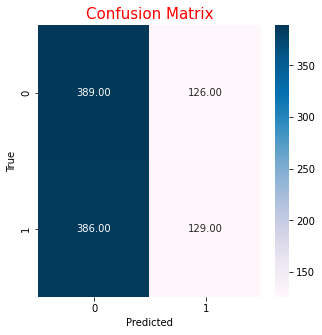

AUC: 0.515961919125271


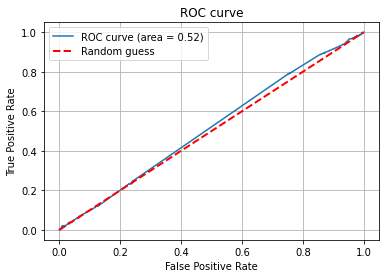

Step:  2
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          1   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          0   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          1   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0         -0.263224  
1          0.030650  


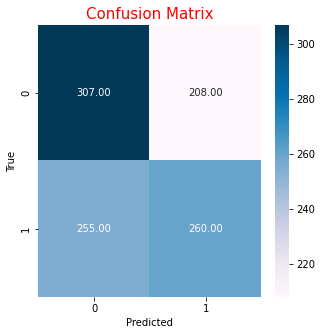

AUC: 0.5705796964841173


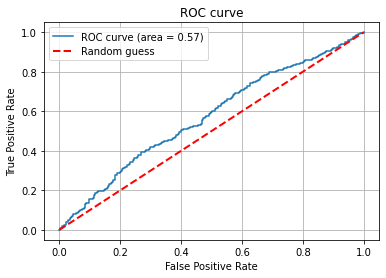

Step:  3
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          0   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          1   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0         -0.832895  
1          0.813165  


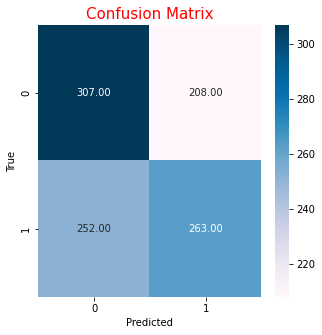

AUC: 0.5809972664718636


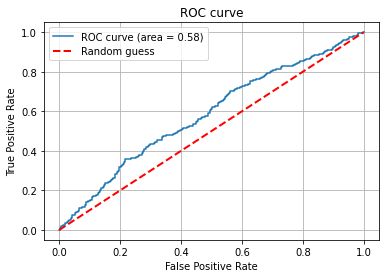

Step:  4
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          0   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0         -1.418556  
1          0.720612  


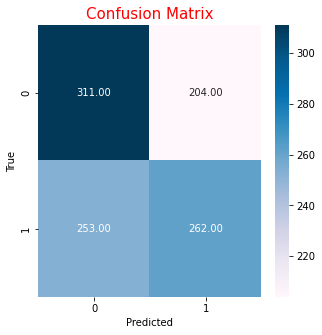

AUC: 0.5905514186068432


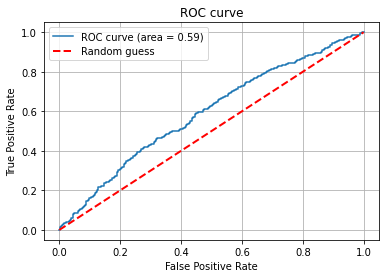

Step:  5
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          0   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0         -2.323944  
1          0.346823  


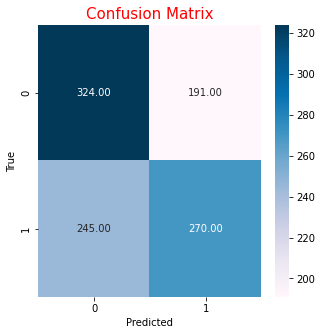

AUC: 0.600697520972759


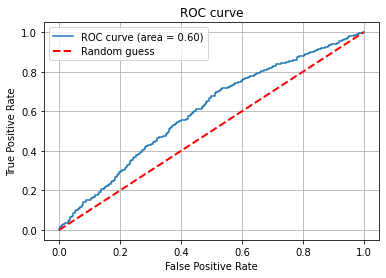

Step:  6
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          0   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0         -2.742415  
1          0.802789  


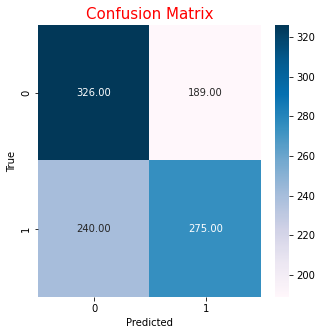

AUC: 0.60744273729852


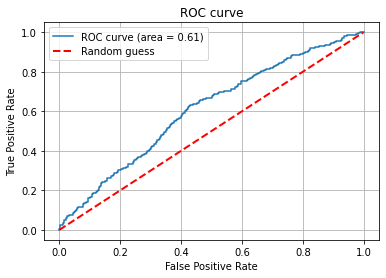

Step:  7
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          1   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0          1.003728  
1          2.071850  


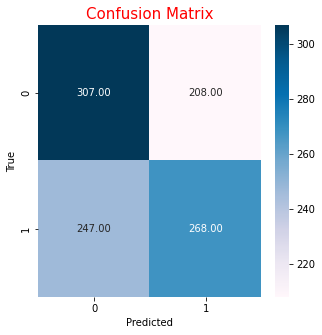

AUC: 0.5885380337449336


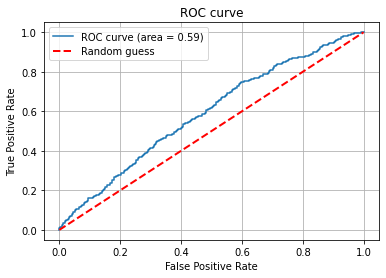

Step:  8
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          1   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          0   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          0   

      log odd score  
0          6.870968  
1         52.056013  


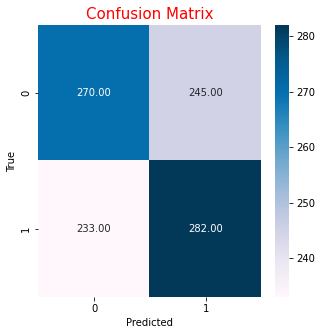

AUC: 0.5577679328871712


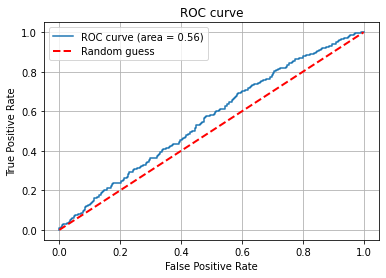

Step:  9
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          1   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          0   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          0   

      log odd score  
0         16.586420  
1         22.634596  


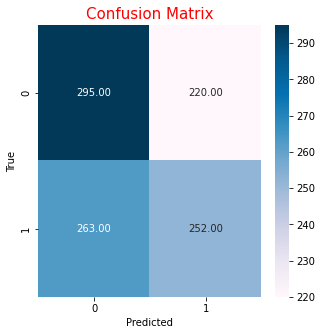

AUC: 0.5539862380997267


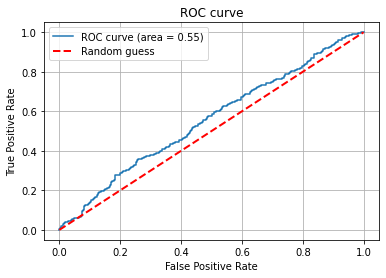

Step:  10
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          0   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0        -20.475519  
1         58.442221  

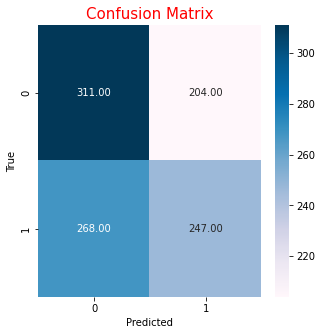

AUC: 0.5566292770289377


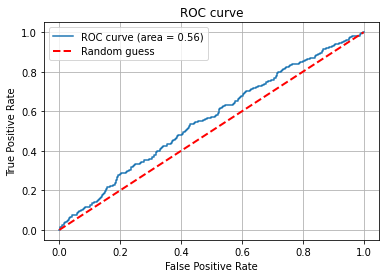

Step:  11
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          0   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          1   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          0   

      log odd score  
0         -5.303305  
1         46.435584  

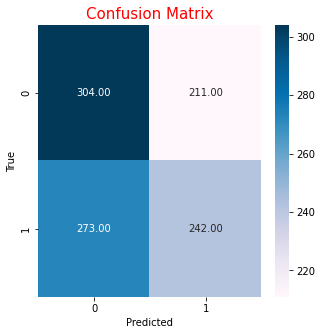

AUC: 0.5470977471957772


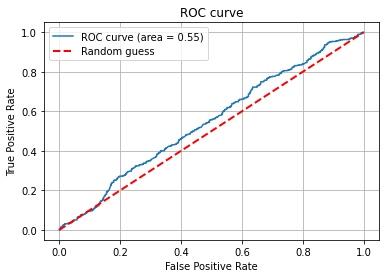

Step:  12
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          1   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          1   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          1   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          1   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0          9.230241  
1         40.444095  

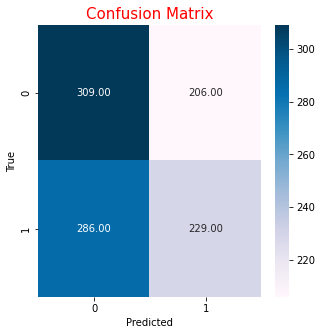

AUC: 0.5357960222452635


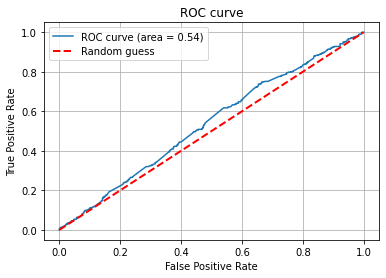

Step:  13
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          1   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          1   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          0   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          0   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0          4.615121  
1          9.230241  

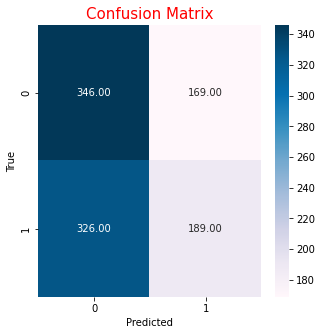

AUC: 0.5300480723913659


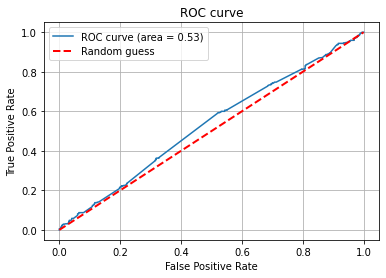

Step:  14
                                                    seq  Bound  predicted  \
0     TTCTTTCAAATACGAAACGTGTATTTGACAGTGGATAGGGTTGGAT...      0          1   
1     TCTGATCGTTATCCTGATTCTAATCCTGTTTCTGTCCCTGGTCCAC...      1          0   
2     CACGATCATCAGTTCCCAACAACTTGTTTCGACTCTTCGAAGACAA...      1          0   
3     CTCTTCACGCCACACACACACATGCGCAAATTAGGAGTGCTCGTGT...      0          1   
4     ATAAAAATTGAATTAAATTAACAAACGAATGACCAGGTGAATGCAG...      1          0   
...                                                 ...    ...        ...   
1025  CAGTGGGCAGCCAGTGCGTGGCCCACACCACCCCCCACCCCCCACC...      0          0   
1026  AGATAACCTTGCGCCTGCAAGCCTTCATTTCTCCAATAAGTGAATC...      0          1   
1027  TGCAGCGGGACAGCATTGGACCCGCACTGCAGGGCAAGGATGTGCT...      0          0   
1028  TAATTAAACAAACTGGTGCAGTCGAATCAGTTGCTAAATCCAAAAG...      0          0   
1029  GGAACCCGAACCCGAACCGGAGCCGGTGAAATTCATCTTGGCCACC...      1          1   

      log odd score  
0          4.615121  
1          0.000000  

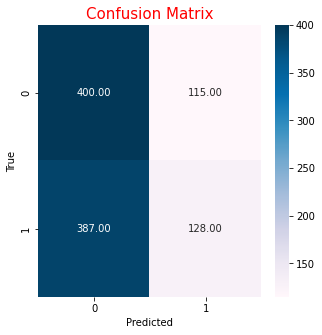

AUC: 0.5243774154020172


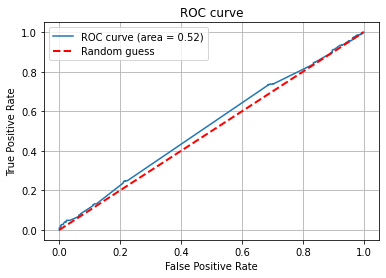

In [10]:
colnames2 = ["FoldID", "EventID", "start_index", "seq", "Bound"]
colnames = ["FoldID", "EventID", "seq", "Bound"]

#df =  motif 
#df2 = non motif
#df4 = mixed test file
df = pd.read_csv('/content/tad.txt', delimiter="\t")

df2 = pd.read_csv('/content/rightboundry.txt', delimiter="\t")
df1 = list(df["seq"])
df3 = list(df2["seq"])
#df1.reset_index(drop=True, inplace=True)
#df3.reset_index(drop=True, inplace=True)
#df4 = pd.read_csv('/content/test1/mixed.txt', delimiter="\t")

#df4=df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#df4 = df4.sample(frac=1).reset_index(drop=True)
print('##### df head #####')
#print(df4.head())

motif_seq = df['seq'].to_list()
nonmotif_seq = df2['seq'].to_list()
print("Len of motif list: ", len(motif_seq))
print("Len of non motif list: ", len(nonmotif_seq))
X_motifs = motif_seq
y_motifs = [1 for i in range(len(motif_seq))]

X_nonmotifs = nonmotif_seq
y_nonmotifs = [0 for i in range(len(nonmotif_seq))]

kf = KFold(n_splits=8)
print(kf.get_n_splits(X_motifs))

all_train_index_motif, all_test_index_motif  = [], []
all_train_index_nonmotif, all_test_index_nonmotif  = [], []

#motif
for train_index, test_index in kf.split(X_motifs): 
  #print("TRAIN: ", train_index, "TEST: ", test_index)
  all_train_index_motif.append(train_index)
  all_test_index_motif.append(test_index)

#nonmotif
for train_index, test_index in kf.split(X_nonmotifs): 
  #print("TRAIN: ", train_index, "TEST: ", test_index)
  all_train_index_nonmotif.append(train_index)
  all_test_index_nonmotif.append(test_index)

print('##### len(all_train_index_motif[0]) #####')
print(len(all_train_index_motif[0]))
print('##### len(all_train_index_motif) #####')
print(len(all_train_index_motif))
print('##### len(all_train_index_nonmotif) #####')
print(len(all_train_index_nonmotif))
print('##### all_train_index_nonmotif[0] #####')
print(len(all_train_index_nonmotif[0]))
print('##### all_test_index_nonmotif #####')
print(len(all_test_index_nonmotif))
print('##### all_test_index_motif[0]) #####')
print(len(all_test_index_motif[0]))

#K FOLD loop - for the number of folds 
for i in range(kf.n_splits):
  l_motif=[]
  l_nonmotif=[]

  motif_seq=[]
  for a in all_train_index_motif[i]:
    motif_seq.append(X_motifs[a])

  nonmotif_seq=[]
  for a1 in all_train_index_nonmotif[i]:
    nonmotif_seq.append(X_nonmotifs[a1])
  

  for j in range(len(all_test_index_motif[i])):
    test_set_motif=X_motifs
    l_motif.append(X_motifs[all_test_index_motif[i][j]])

    test_set_nonmotif=X_nonmotifs
    l_nonmotif.append(X_nonmotifs[all_test_index_nonmotif[i][j]])

  l_1 =[1 for i in range(len(l_motif))]
  l_0 =[0 for i in range(len(l_nonmotif))]

  df_test= pd.DataFrame(list(zip(l_motif,l_1)),columns=['seq','Bound'])
  extra={'seq':l_nonmotif,'Bound':l_0}
  df_test= df_test.append(pd.DataFrame(extra))
  df_test=df_test.sample(frac=1).reset_index(drop=True)
  #print(df_test)

#training loop: 
  for i1 in range(2,15,1): #order of the markov models
    print("Step: ", i1)
    var = i1
    dict6 = train(motif_seq,nonmotif_seq,df_test)
    #print("dict6",dict6)
    acc = accuracy(df_test)
    print(acc)  
    y_true,y_pred = acc_score(df_test)
    confusion_mat(y_true,y_pred)
    #auc_calculate(df_test)
    roc_calculate(df_test)